In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
# Import other libraries required for processing and modelling
import warnings
warnings.filterwarnings("ignore")

# Import other libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

from pylab import rcParams
rcParams["figure.figsize"]=16,8
RANDOM_SEED=42
LABELS=["normal","fraud"]


from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN







import itertools
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# load Dataset
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# DATA UNDERSTANDING

In [4]:
#no of columns and rows present in dataset
df.shape

(284807, 31)

In [5]:
#observe rows and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Observe the different feature type present in the data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
#check for null values
df.isnull().values.any()

False

No null values present in dataset

### CHECKING FOR  DATA IMBALANCE

In [8]:
classes=df['Class'].value_counts()
normal=classes[0]/df['Class'].count()*100
fraud=classes[1]/df['Class'].count()*100

print("Percentatge of non-fradulent transaction:",normal)
print("Percentatge of fradulent transaction:",fraud)

Percentatge of non-fradulent transaction: 99.82725143693798
Percentatge of fradulent transaction: 0.1727485630620034


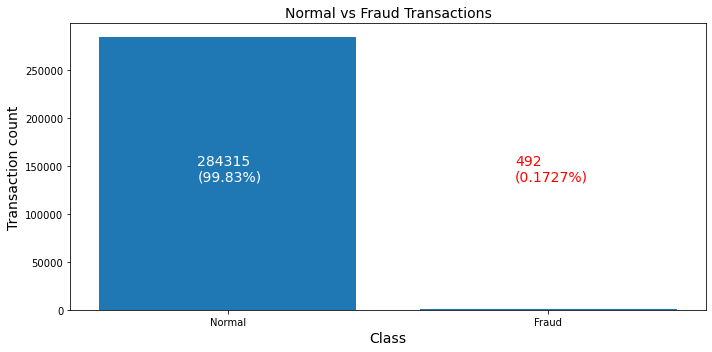

In [9]:
plt.figure(figsize=(10,5))
plt.bar(['Normal','Fraud'], df['Class'].value_counts())
plt.title("Normal vs Fraud Transactions", fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Transaction count', fontsize=14)
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction', fontsize=14, color='white')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction', fontsize=14, color='red')
plt.tight_layout()
plt.show()

### As class is unequally distributed in fraudulent(492 or 0.17%) and  legal transactions(284315 transactions or 99.83%),it is the imabalanced dataset.it can create problem.


# EDA

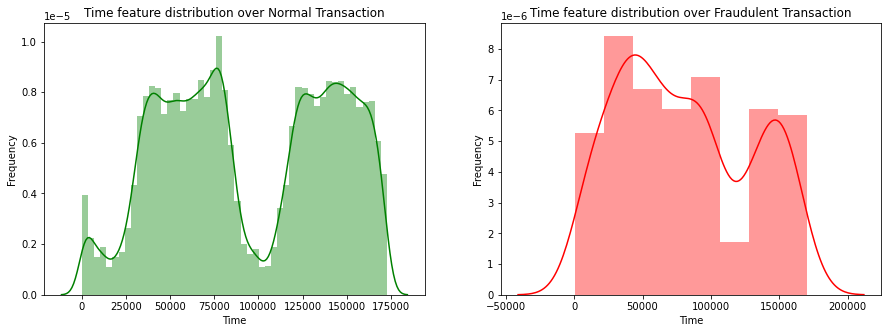

In [10]:
# Distribution of class vs time
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)

sns.distplot(normal["Time"], color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")


ax = plt.subplot(1,2,2)
sns.distplot(fraud["Time"], color='r')
plt.title("Time feature distribution over Fraudulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

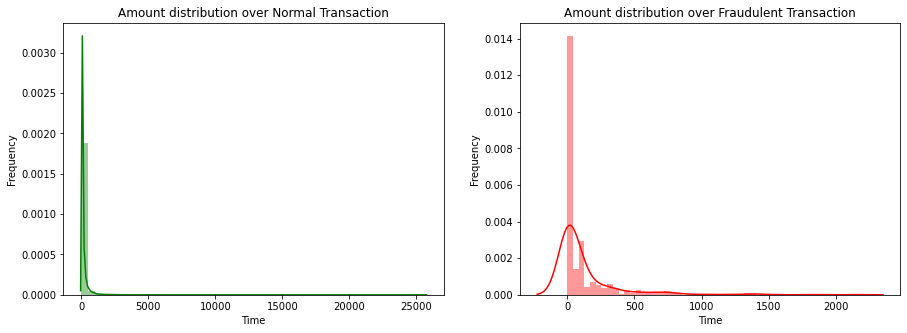

In [11]:
# Distribution of Amount vs time

plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.distplot(normal["Amount"], color='g')
plt.title("Amount distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

ax = plt.subplot(1,2,2)
sns.distplot(fraud["Amount"], color='r')
plt.title("Amount distribution over Fraudulent Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

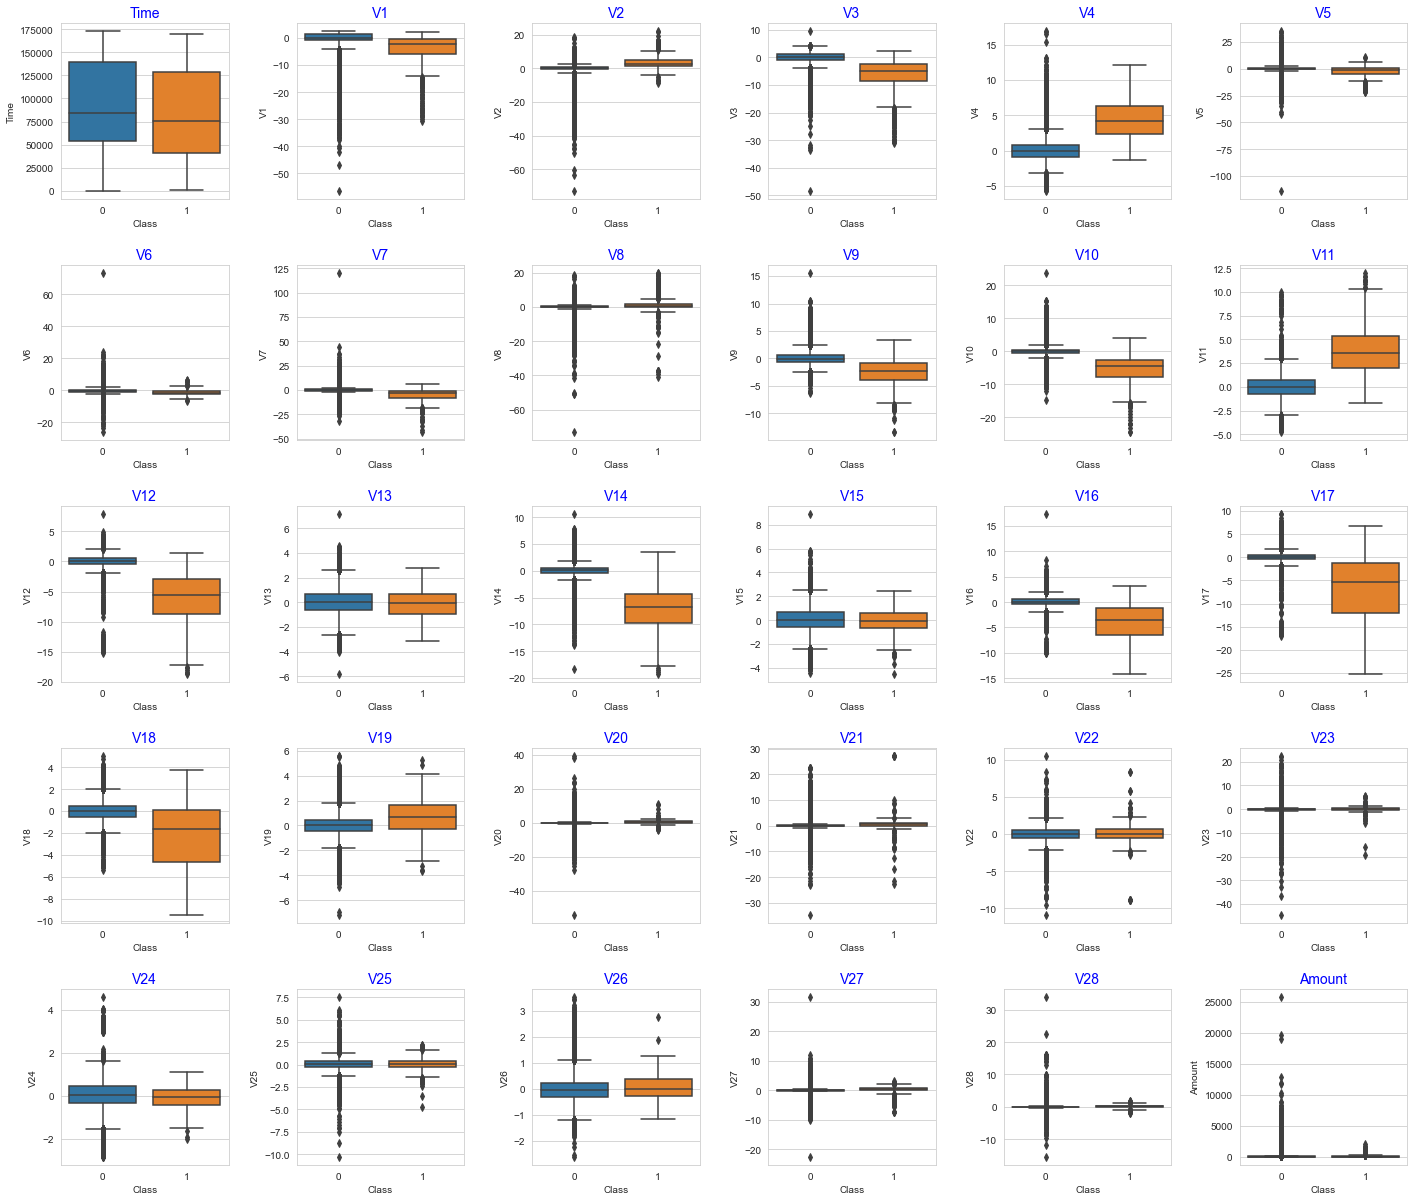

In [12]:
# Create box plot to understand spread of data
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20,20))
cnt = 1
sns.set_style("whitegrid")
cols = list(df.columns)
cols.remove('Class')
for col in cols:
    ax = plt.subplot(6,6,cnt)
    sns.boxplot(y=df[col], x=df['Class'])
    
    ax.set_title(col, fontsize=14, color='b')
    cnt+= 1
plt.tight_layout(pad = 2.0)
plt.show()

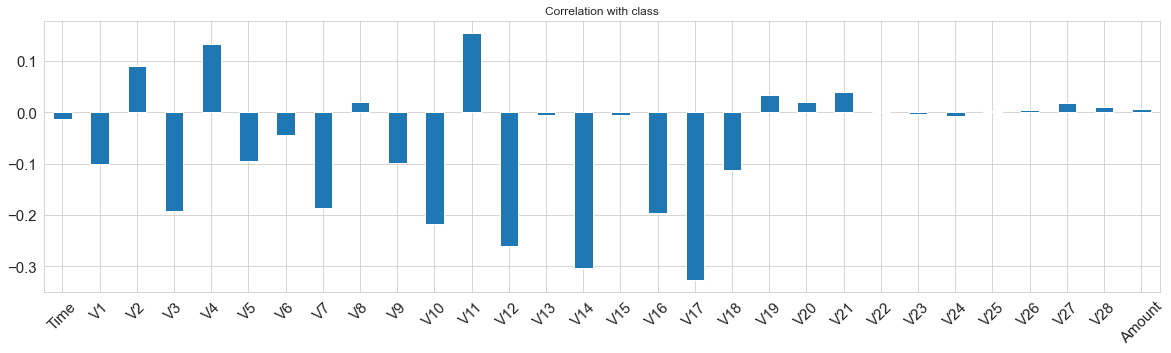

In [13]:
# correalation of different variables with Class

cols = list(df.columns)
cols.remove('Class')
df[cols].corrwith(df.Class, method='pearson').plot.bar(
        figsize = (20, 5), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [14]:
# correlation between different variables
corr = df.corr()
corr.head()

Time            V1            V2            V3            V4  \
Time  1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1    0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2   -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3   -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4   -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   

                V5            V6            V7            V8            V9  \
Time  1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1    1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2    5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3   -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4   -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   

      ...           V21           V22           V23           V24  \
Time  ...  4.473573e-02  1.440591e-01  5.114236e-02 -1.618187e-02   
V1    ... -2.457409e-16 -4.290944e-16  6.168652e-16 -4.425156e-17   
V2    ... -8.480447e-17  1.526333e-16  1.634231e-16  1.247925e-17   
V3    ...  5.706192e-17 -1.133902e-15 -4.983035e-16  2.686834e-19   
V4    ... -1.949553e-16 -6.276051e-17  9.164206e-17  1.584638e-16   

               V25           V26           V27           V28    Amount  \
Time -2.330828e-01 -4.140710e-02 -5.134591e-03 -9.412688e-03 -0.010596   
V1   -9.605737e-16 -1.581290e-17  1.198124e-16  2.083082e-15 -0.227709   
V2   -4.478846e-16  2.057310e-16 -4.966953e-16 -5.093836e-16 -0.531409   
V3   -1.104734e-15 -1.238062e-16  1.045747e-15  9.775546e-16 -0.210880   
V4    6.070716e-16 -4.247268e-16  3.977061e-17 -2.761403e-18  0.098732   

         Class  
Time -0.012323  
V1   -0.101347  
V2    0.091289  
V3   -0.192961  
V4    0.133447  

[5 rows x 31 columns]

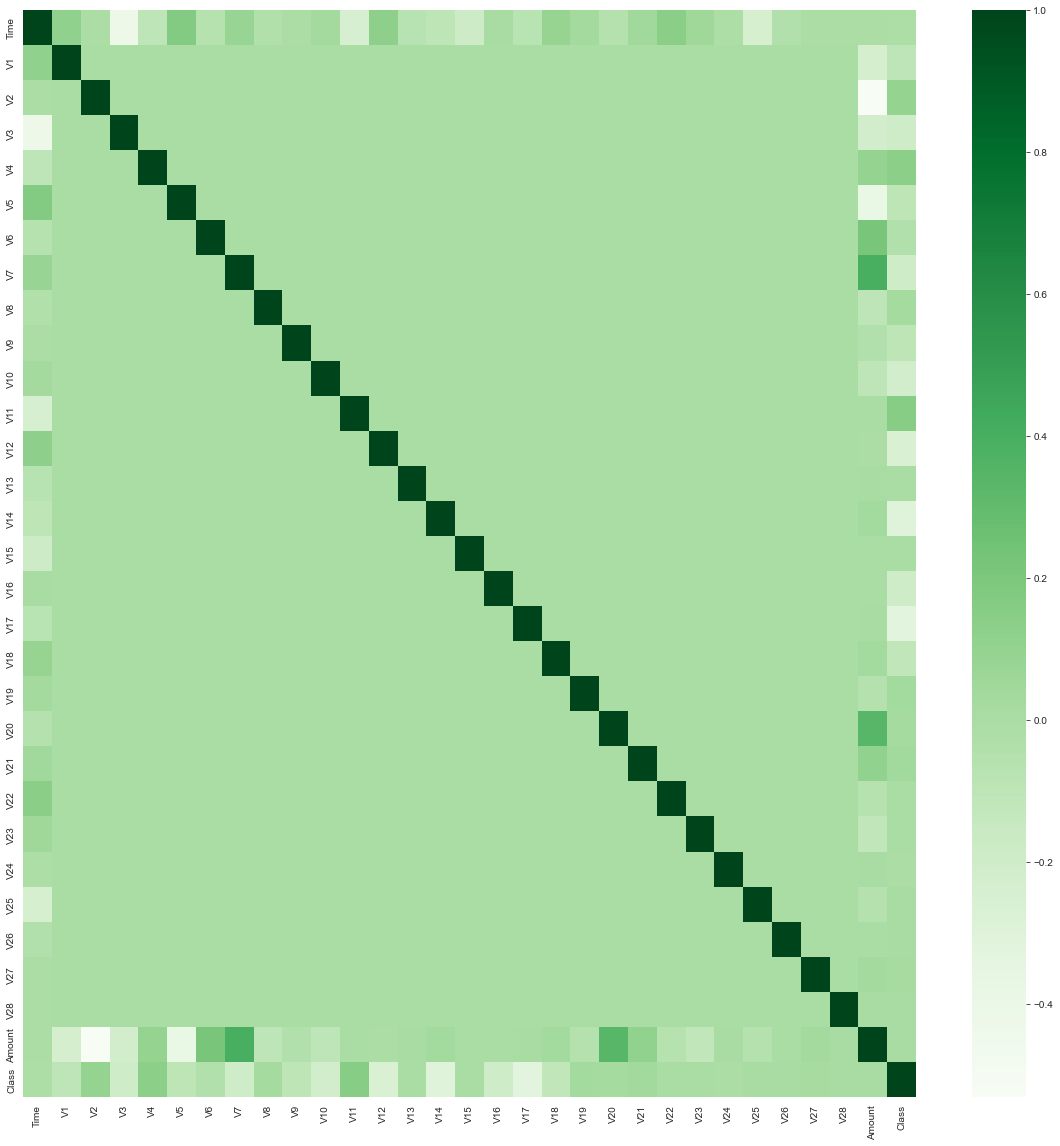

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Greens")
plt.show()

In [16]:
#separatring class in fraudulent and non-fraudulent class
fraud=df[df['Class']==1]
legal=df[df['Class']==0]

In [17]:
print(fraud.shape)
print(legal.shape)

(492, 31)
(284315, 31)


In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

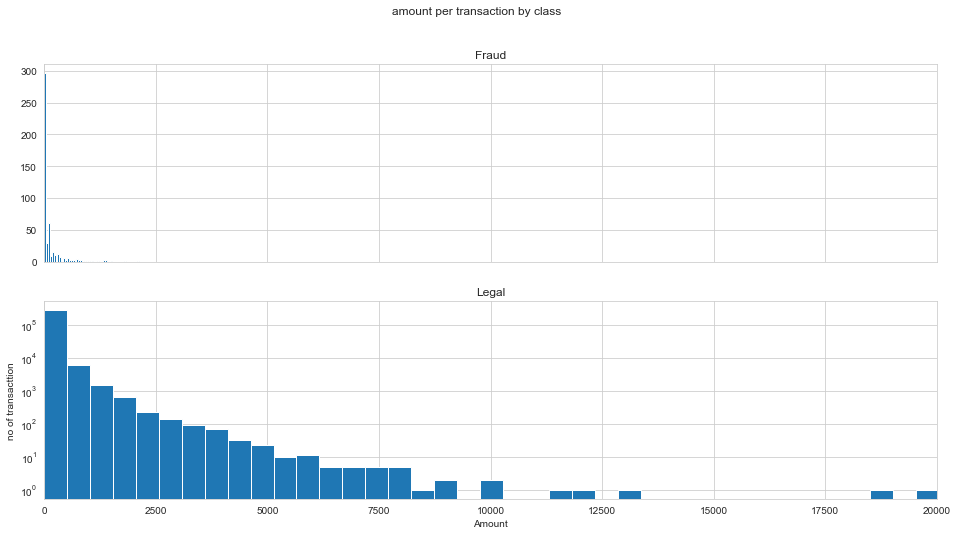

In [20]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("amount per transaction by class")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')



ax2.hist(legal.Amount,bins=bins)
ax2.set_title('Legal')
plt.xlabel('Amount')
plt.ylabel('no of transacttion')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

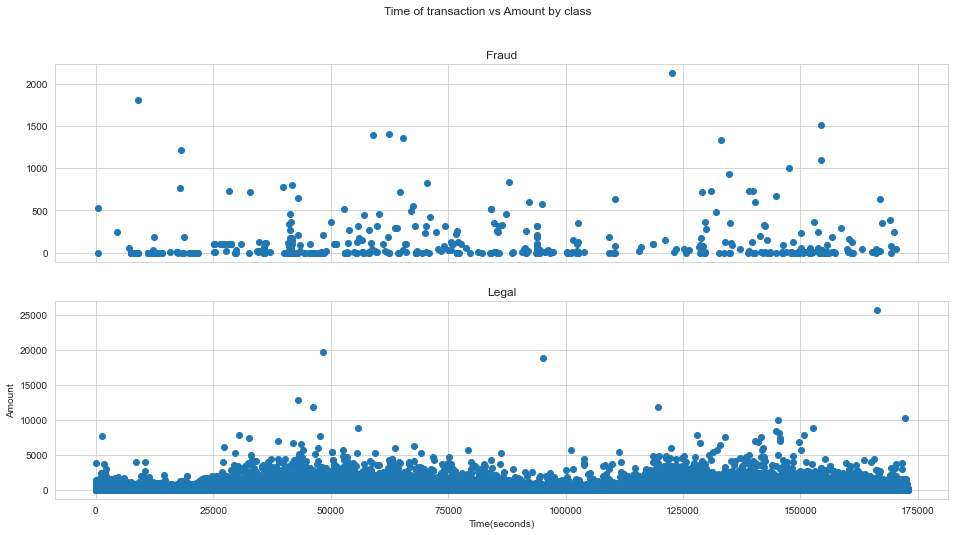

In [21]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Time of transaction vs Amount by class")

ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legal.Time,legal.Amount)
ax2.set_title('Legal')
plt.xlabel('Time(seconds)')
plt.ylabel('Amount')
plt.show()

# DATA PREPARATION

In [22]:
# Drop Time columns as it does not add value and cannot give any meaningful information
df1=df.drop('Time',axis=1)

In [24]:
df1.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

### Splitting dataset in to train and test 

In [26]:
# x=features,y=target
y= df1['Class']
X = df1.drop(columns = 'Class')

In [27]:
#split in train and test dataset
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


Preserve X_test & y_test to evaluate on the test data once you build the model

In [29]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


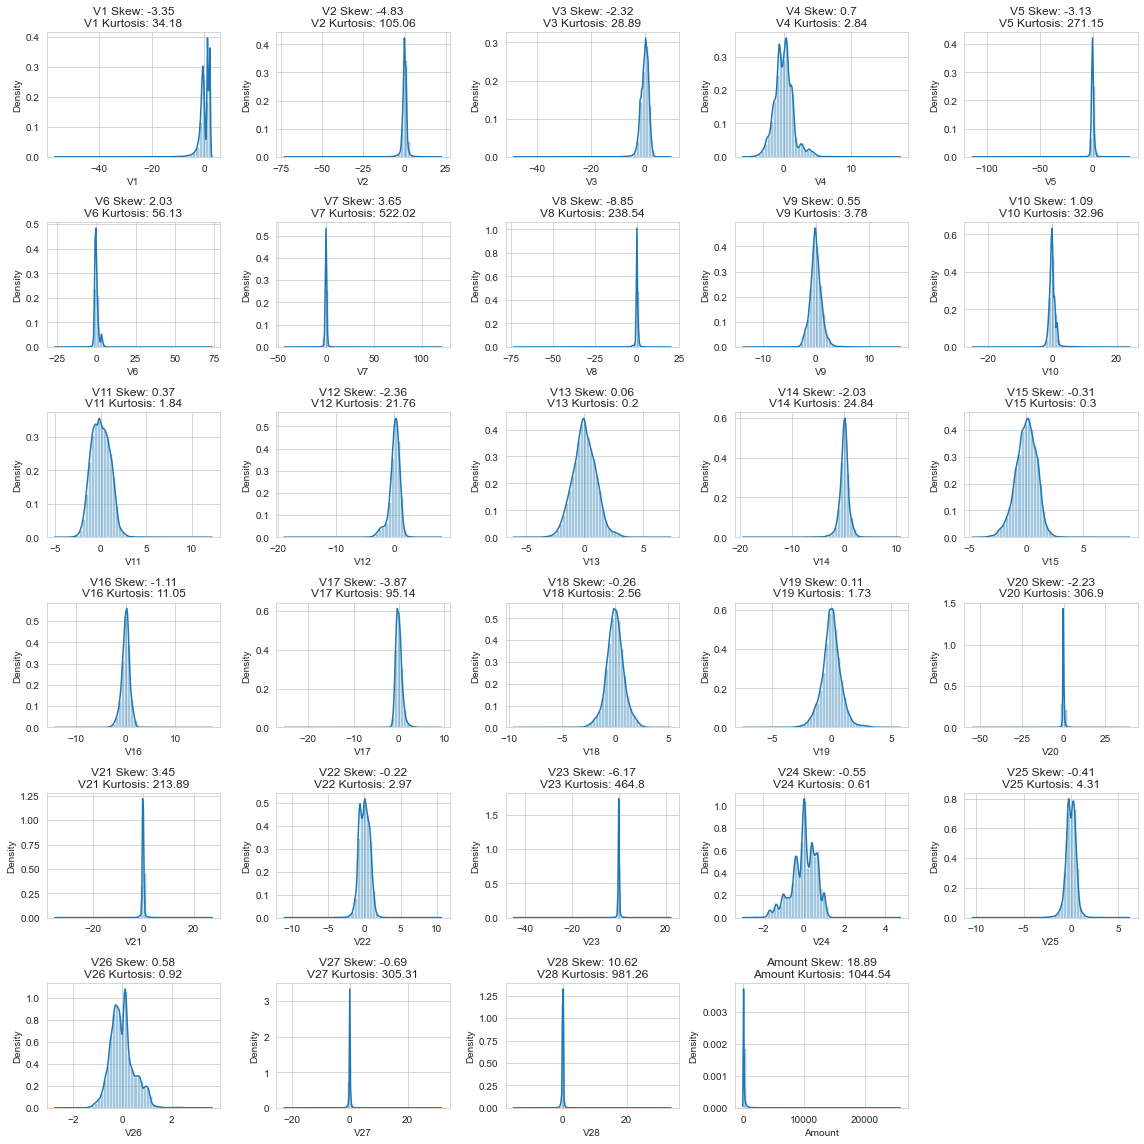

In [31]:
import math
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis

cols = X_train.columns
rows = math.ceil(len(cols) / 5)
plt.figure(figsize=(16,16))
for i in range(0,len(cols)):
    plt.subplot(rows, 5, i+1)
    ax = sns.distplot(X_train[cols[i]], kde=True)
    plt.title(cols[i] + " Skew: " + str(np.round(skew(X_train[cols[i]]),2)) + "\n" + cols[i] + " Kurtosis: " + str(np.round(kurtosis(X_train[cols[i]]),2)))
plt.tight_layout()
plt.show()

### Apply a power transform featurewise to make data more Gaussian-like.

PowerTransformer supports the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.Transform train and test dataset using PowerTransformer.



In [33]:
from sklearn.preprocessing import PowerTransformer
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
X_train.iloc[:,:] = pt.fit_transform(X_train)
X_test.iloc[:,:] = pt.transform(X_test)

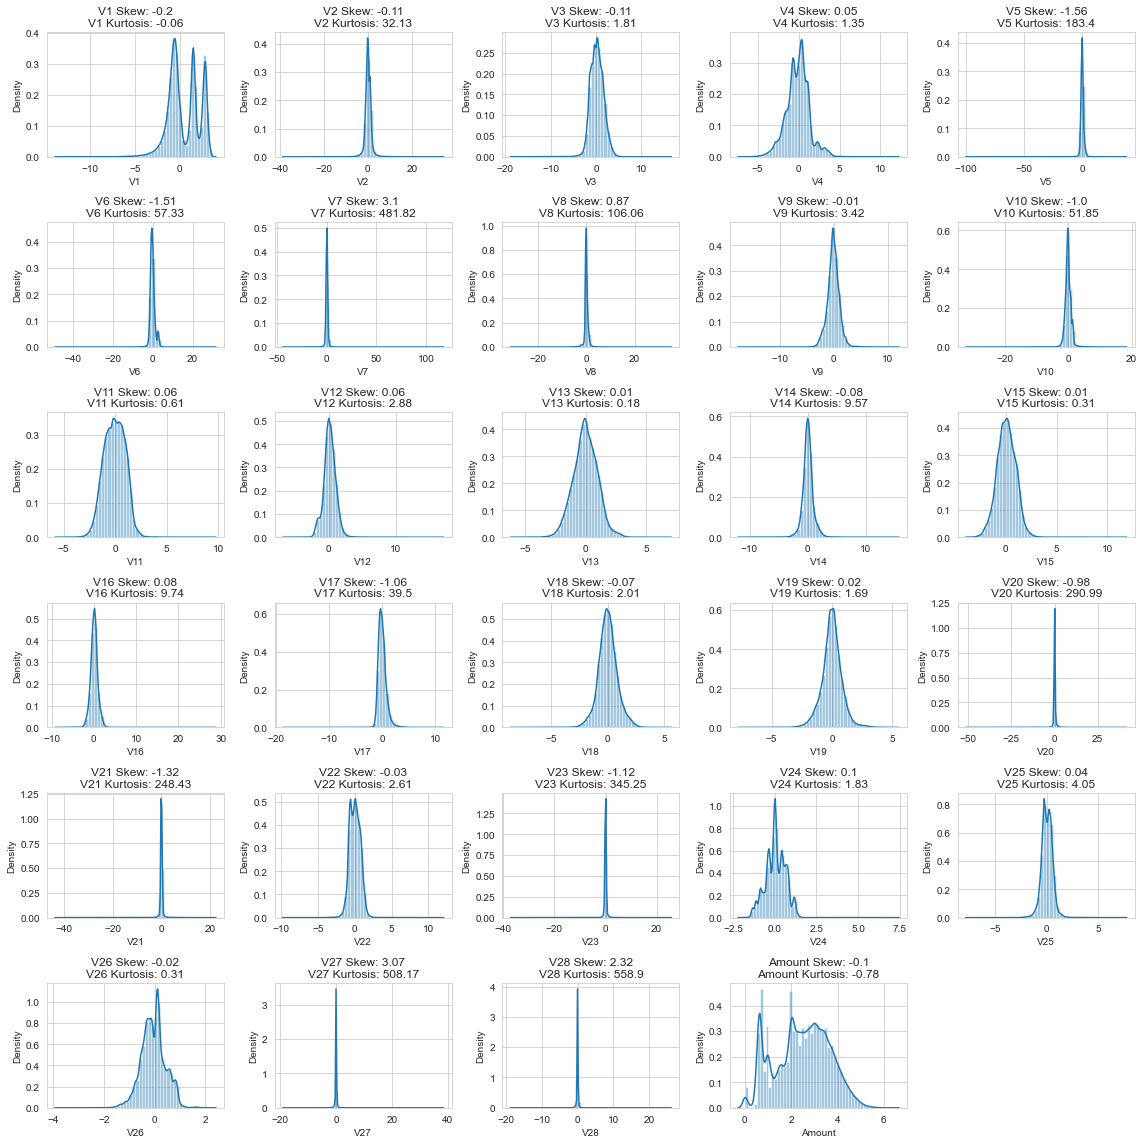

In [35]:
# plot the histograms of variables from the dataset again to see the result 
plt.figure(figsize=(16,16))
for i in range(0,len(cols)):
    plt.subplot(rows, 5, i+1)
    ax = sns.distplot(X_train[cols[i]], kde=True)
    plt.title(cols[i] + " Skew: " + str(np.round(skew(X_train[cols[i]]),2)) + "\n" + cols[i] + " Kurtosis: " + str(np.round(kurtosis(X_train[cols[i]]),2)))
plt.tight_layout()
plt.show()

# Model Building on Imbalanced data

Build different models on the imbalanced dataset and observe the result.


## Logistics Regression Model with GridSearchCV (Imbalanced dataset) 

Imbalanced Data For Logistics Regression we are going to optimise 'penalty' and 'C' using gridsearch CV and stratified K fold, 
we will optimise one parameter at a time since executing multiple parameters needs,more combinations to execute and takes more time.

In [36]:

#Build the model and check accuracy and recall of the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.999133925541004
Recall/Sensitivity: 0.6216216216216216
Precision: 0.8363636363636363


In [39]:
#Tune hyper parameter using gridsearchcv
from sklearn.pipeline import Pipeline

pipe = Pipeline([('logreg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'],
         'logreg__solver' : ['liblinear']}
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator = pipe , cv = folds, param_grid = params, scoring  = 'recall')

In [40]:
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 1, 2],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='recall')

In [41]:
#Get model score based on the hyper paramters best suited for the model
model.best_score_

0.6511508951406649

In [42]:
#best hyperparameters
model.best_params_

{'logreg__C': 0.6, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [43]:
# predict fraud on test data based on best estimators and values
y_pred = model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9991456292499094
Recall/Sensitivity: 0.6216216216216216


In [44]:
# model tune to best parameters 
logreg = LogisticRegression(random_state=42, C=0.6 , penalty='l1', solver = 'liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.6, penalty='l1', random_state=42, solver='liblinear')

In [45]:
# define a Method to print the confusion matrix 
def confmatrx(y_true, y_pred):
    
    from sklearn.metrics import confusion_matrix
    # import confusion matrix from sklearn
    confusion = confusion_matrix(y_test, y_pred)
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print('Misclassification Rate: {0}'.format((FP+FN)/ (FP+FN+TP+TN)))
    print("Negative Predictive Power:", TN/(TN+FP))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("Roc Auc Score:",metrics.roc_auc_score(y_test, y_pred))

In [46]:
#define a method to plot ROC AUC curve 
from sklearn import metrics 
def draw_roc( actual, probs ):
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [47]:
#define a method to find the optimal threshold and use it to predict fraud for the model
from sklearn.metrics import confusion_matrix 
import seaborn as sns
sns.set()
def optimal_cutoff(model_ref, cut_off_index = None):
    # Getting the predicted probability
    x_test= X_test
    y_pred_prob = model_ref.predict_proba(x_test)[:,1:].reshape(-1)
   
    # Forming up dataframe that would hold the probablity/different thereshhold data
    modeldf_final = pd.DataFrame({'Actual':y_test})
    modeldf_final['Probability'] = y_pred_prob
    modeldf_final['Predicted'] = modeldf_final['Probability'].map(lambda x : 1 if x > 0.5 else 0)
    print("Using the default Threshold Cutoff as 0.5")
    print(modeldf_final.head())
    print('\n'*3)
    # Forming up of Probablibity for different cutoffs
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        modeldf_final[i]=  modeldf_final.Probability.map(lambda x: 1 if x > i else 0)
    print("Probability at Different Thereshold")
    print(modeldf_final.head())
    print('\n'*3)
    
     # let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = confusion_matrix(modeldf_final.Actual, modeldf_final[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print("Checking the Accuracy, Sensitivity and Specificity for different Threshold")
    print(cutoff_df)
    print('\n'*3)

    #Checking the Optimal Cut-off for the above model
    #plt.figure(figsize=(10,8))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Checking the Accuracy, Sensitivity Specificity Curve')
    plt.show()

    print('\n'*3)
    if cut_off_index == None:
          cut_off_index = float(input('Enter the Ideal Cutoff Index: '))
            
    
    #Plot accuracy sensitivity and specificity for various probabilities.
    #plt.figure(figsize=(10,8))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.vlines(cut_off_index, ymax=1, ymin=0, colors='r', linestyles='--')
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Optimal Cut-off as :' + str(cut_off_index))
    plt.show()
    
    # Applying the optimal cutoff threshold
    modeldf_final['Opt Cutoff'] = modeldf_final['Probability'].map(lambda x : 1 if x > cut_off_index else 0)
    print('\n'*3)
    draw_roc(y_test, modeldf_final['Opt Cutoff'])
    #print confusion matrix score for the model
    print('\n'*3)
    confmatrx(y_test, modeldf_final['Opt Cutoff'])

    #Print the final predicted dataset 
    print('\n'*3)    
    print('Final predicted dataset using the optimal cutoff threshold')
    print(modeldf_final.head(10))

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.000195          0
165754       0     0.000217          0
235285       0     0.000311          0
101271       0     0.000090          0
5832         0     0.000152          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000195          0    1    0    0    0    0    0    0   
165754       0     0.000217          0    1    0    0    0    0    0    0   
235285       0     0.000311          0    1    0    0    0    0    0    0   
101271       0     0.000090          0    1    0    0    0    0    0    0   
5832         0     0.000152          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

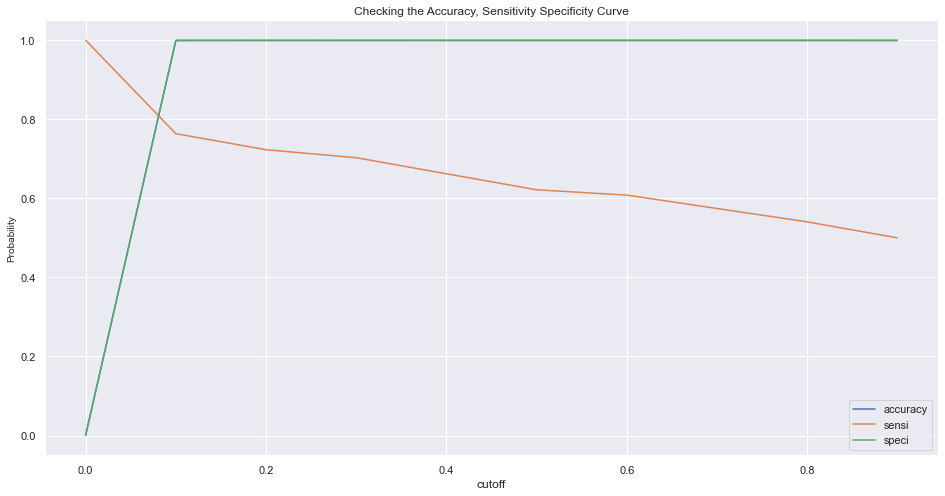

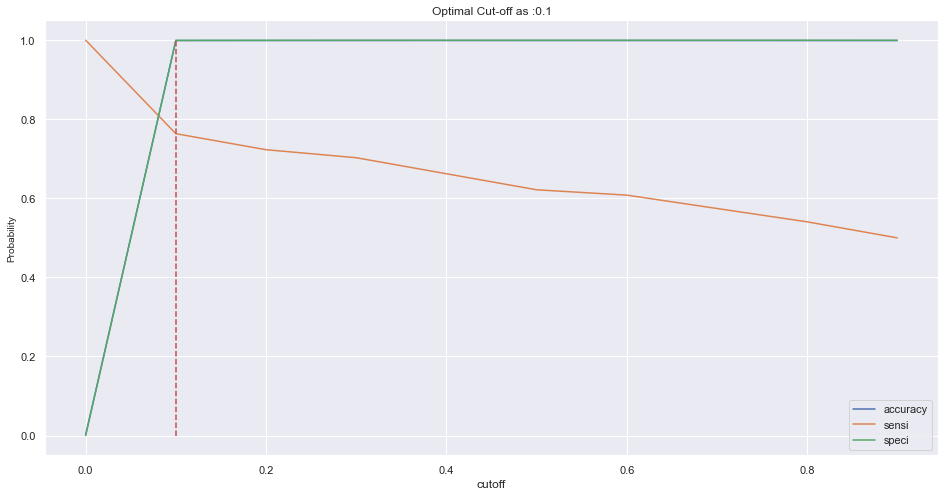

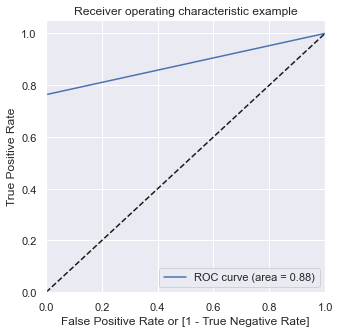





Misclassification Rate: 0.00088948187680676
Negative Predictive Power: 0.9995193153174278
Accuracy: 0.9991105181231933
Precision: 0.7337662337662337
Recall: 0.7635135135135135
Roc Auc Score: 0.8815164144154707




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000195          0    1    0    0    0    0    0    0   
165754       0     0.000217          0    1    0    0    0    0    0    0   
235285       0     0.000311          0    1    0    0    0    0    0    0   
101271       0     0.000090          0    1    0    0    0    0    0    0   
5832         0     0.000152          0    1    0    0    0    0    0    0   
253774       0     0.000098          0    1    0    0    0    0    0    0   
113630       0     0.000457          0    1    0    0    0    0    0    0   
230121       0     0.000102          0    1    0    0    0    0    0    0   
282997       0     0.000073   

In [48]:
#Call the function to print and plot confusion matrix and ROC AUC on the model
optimal_cutoff(logreg, cut_off_index = 0.1)

## Similarly explore other algorithms on balanced dataset by building models like:

KNN

SVM

Decision Tree

Random Forest

XGBoost

# KNN MODEL on imbalance datatet

In [49]:
#Define and build KNN Classifier model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_jobs=-1)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.999403110845827
Recall/Sensitivity: 0.7364864864864865
Precision: 0.9008264462809917
Roc_Auc_score: 0.8681728991433546


In [50]:
# Tune Hyperpaprameter using gridsearch cv
model_knn = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
from sklearn.model_selection import GridSearchCV
model_knn_1 = GridSearchCV(estimator = model_knn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
model_knn_1.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='recall',
             verbose=1)

In [51]:
#best parameters 
model_knn_1.best_params_

{'n_neighbors': 3}

In [52]:
#best score
model_knn_1.best_score_

0.7906649616368286

In [53]:
#Run model using best parameter for KNN Model and predict on test dataset and evaluate
model_knn = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9994733330992591
Recall/Sensitivity: 0.7702702702702703
Precision: 0.912
Roc_Auc_score: 0.8850706530435706


# Random Forest on imbalance dataset

In [54]:
#Define and build random forest model
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train, y_train)
y_pred = rf_model1.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9995318516437859
Recall/Sensitivity: 0.7635135135135135
Precision: 0.9576271186440678
Roc_Auc_score: 0.8817274467151365


In [55]:
# Tune Hyperpaprameter using gridsearch cv
rf_class = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
from sklearn.model_selection import GridSearchCV
rfmodel_2 = GridSearchCV(estimator = rf_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [56]:
rfmodel_2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [57]:
#Get model score based on the hyper paramters best suited for the model
rfmodel_2.best_score_

0.7702472293265132

In [58]:
# best hyper parameters and their value to improve the model
rfmodel_2.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6}

In [59]:
# predict fraud on test data and check accuracy and recall score of gridsearchcv result
y_pred = rfmodel_2.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9994148145547324
Recall/Sensitivity: 0.722972972972973
Precision: 0.9224137931034483
Roc_Auc_score: 0.8614337284115701


In [60]:
# Apply random forest model using the best hyper parameter found using gridsearchcv

rf_tunemodel = RandomForestClassifier( criterion = 'entropy', max_depth= 6,
                                  min_samples_leaf=1, min_samples_split=6)
rf_tunemodel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=6)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.000496          0
165754       0     0.000096          0
235285       0     0.000438          0
101271       0     0.000122          0
5832         0     0.000135          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000496          0    1    0    0    0    0    0    0   
165754       0     0.000096          0    1    0    0    0    0    0    0   
235285       0     0.000438          0    1    0    0    0    0    0    0   
101271       0     0.000122          0    1    0    0    0    0    0    0   
5832         0     0.000135          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

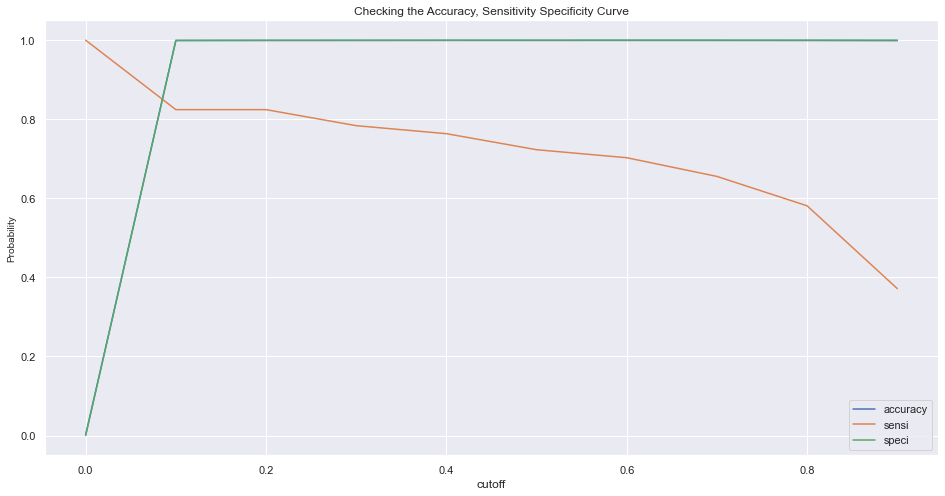

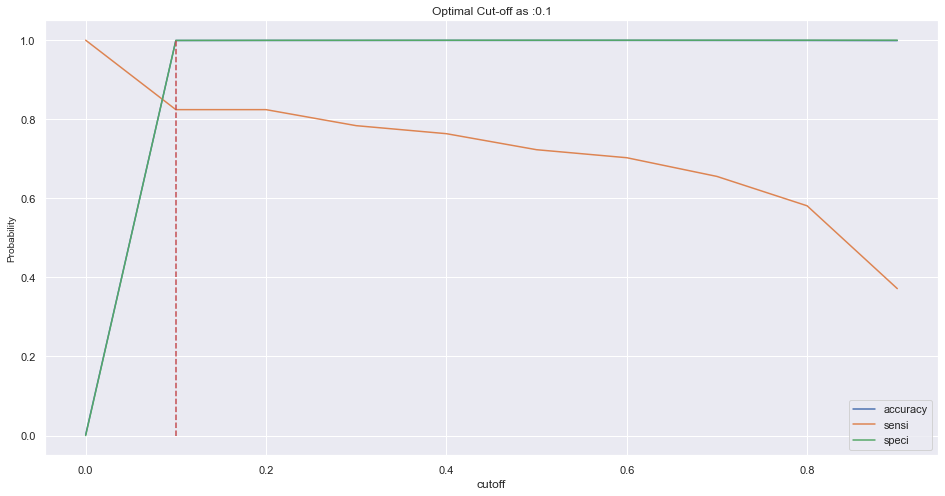

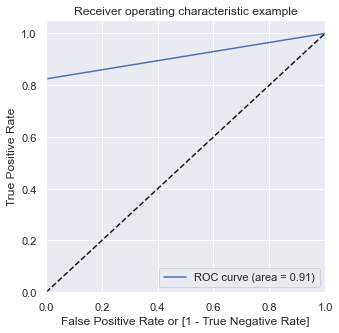





Misclassification Rate: 0.0008426670411853516
Negative Predictive Power: 0.9994606952341872
Accuracy: 0.9991573329588147
Precision: 0.7261904761904762
Recall: 0.8243243243243243
Roc Auc Score: 0.9118925097792558




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000496          0    1    0    0    0    0    0    0   
165754       0     0.000096          0    1    0    0    0    0    0    0   
235285       0     0.000438          0    1    0    0    0    0    0    0   
101271       0     0.000122          0    1    0    0    0    0    0    0   
5832         0     0.000135          0    1    0    0    0    0    0    0   
253774       0     0.000059          0    1    0    0    0    0    0    0   
113630       0     0.000184          0    1    0    0    0    0    0    0   
230121       0     0.000054          0    1    0    0    0    0    0    0   
282997       0     0.000212 

In [61]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(rf_tunemodel, cut_off_index = 0.1)

# Decision Tree classifier on imbalance dataset

In [62]:
from sklearn.tree import DecisionTreeClassifier 
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_train, y_train)
y_pred = dt_model1.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9992392589211521
Recall/Sensitivity: 0.7364864864864865
Precision: 0.8074074074074075
Roc_Auc_score: 0.8680908310268177


In [63]:
# Tune Hyperpaprameter using gridsearch cv and  cross validation 
dt_class = DecisionTreeClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
from sklearn.model_selection import GridSearchCV
dtmodel_2 = GridSearchCV(estimator = dt_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [64]:
dtmodel_2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [65]:
#Get model score based on the hyper paramters best suited for the model
dtmodel_2.best_score_

0.7789855072463767

In [67]:
# predict fraud on test data and check accuracy and recall score of gridsearchcv result
y_pred = dtmodel_2.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9993562960102056
Recall/Sensitivity: 0.7837837837837838
Precision: 0.8345323741007195
Roc_Auc_score: 0.8917570657004387


In [68]:
# Apply decision tree model using the best hyper parameter found using gridsearchcv

dt_tunemodel = DecisionTreeClassifier( criterion = 'entropy', max_depth= 6,
                                  min_samples_leaf=1, min_samples_split=6)
dt_tunemodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=6)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.000008          0
165754       0     0.000008          0
235285       0     0.000141          0
101271       0     0.000008          0
5832         0     0.000141          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000008          0    1    0    0    0    0    0    0   
165754       0     0.000008          0    1    0    0    0    0    0    0   
235285       0     0.000141          0    1    0    0    0    0    0    0   
101271       0     0.000008          0    1    0    0    0    0    0    0   
5832         0     0.000141          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

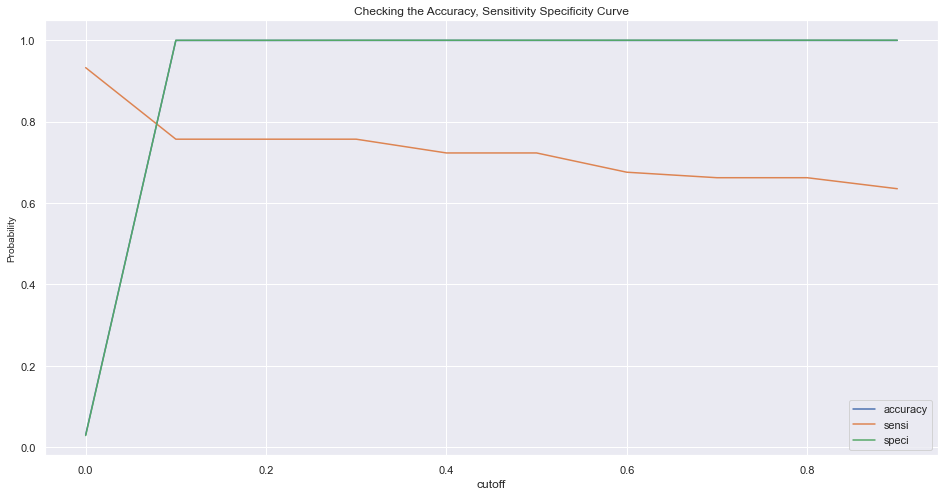

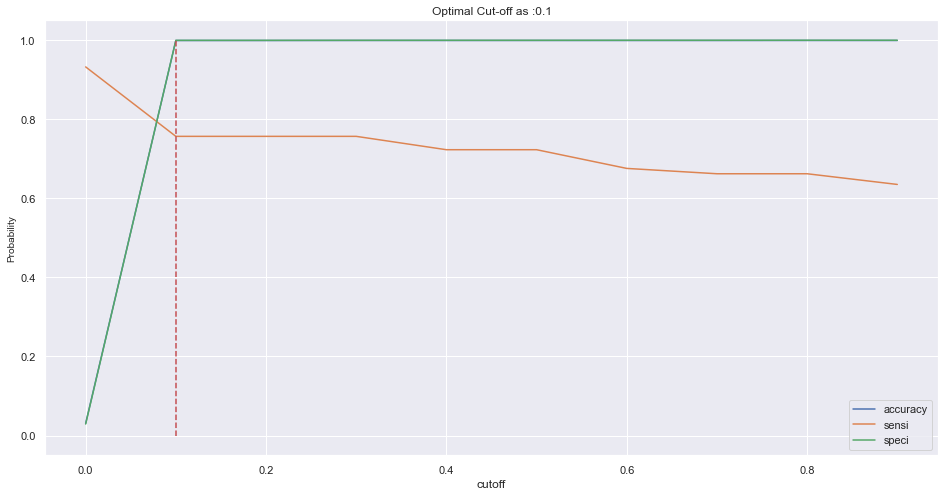

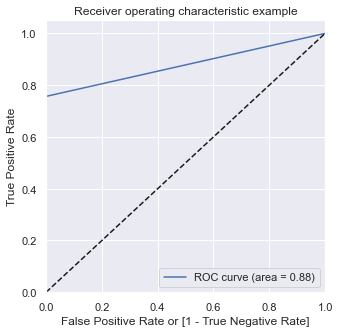





Misclassification Rate: 0.0008075559144692953
Negative Predictive Power: 0.9996131074506126
Accuracy: 0.9991924440855307
Precision: 0.7724137931034483
Recall: 0.7567567567567568
Roc Auc Score: 0.8781849321036846




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000008          0    1    0    0    0    0    0    0   
165754       0     0.000008          0    1    0    0    0    0    0    0   
235285       0     0.000141          0    1    0    0    0    0    0    0   
101271       0     0.000008          0    1    0    0    0    0    0    0   
5832         0     0.000141          0    1    0    0    0    0    0    0   
253774       0     0.000008          0    1    0    0    0    0    0    0   
113630       0     0.000141          0    1    0    0    0    0    0    0   
230121       0     0.000008          0    1    0    0    0    0    0    0   
282997       0     0.000000 

In [69]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(dt_tunemodel, cut_off_index = 0.1)

# SVM model on imbalance dataset

In [70]:
#Create a svm Classifier model
from sklearn import svm
clf = svm.SVC(kernel='rbf',random_state=42) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9993562960102056
Recall/Sensitivity: 0.6554054054054054
Precision: 0.9603960396039604
Roc_Auc_score: 0.8276792546694065


In [71]:
# Apply cross validation and Tune Hyperpaprameter using gridsearch cv

svm_model = svm.SVC(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'kernel' :['rbf','polynomial','sigmoid'],'C':[0.001,0.01,0.1]
          }
from sklearn.model_selection import GridSearchCV
svm_model = GridSearchCV(estimator = svm_model , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1],
                         'kernel': ['rbf', 'polynomial', 'sigmoid']},
             scoring='recall', verbose=1)

In [72]:
#best parameters
svm_model.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [73]:
#best score
svm_model.best_score_

0.36351236146632565

In [74]:
# Apply SVM model using the best hyper parameter found using gridsearchcv
svm_model = svm.SVC( kernel='rbf' ,C = 0.1,random_state=42 )
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9988647402361809
Recall/Sensitivity: 0.38513513513513514
Precision: 0.9047619047619048
Roc_Auc_score: 0.6925323955176232


# XGBoost model on imbalance dataset

In [75]:
#Create a XGB Classifier model 
import xgboost as xgb

xgboost_md = xgb.XGBClassifier(random_state=42) 
xgboost_md.fit(X_train, y_train)
y_pred = xgboost_md.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

[14:18:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9995201479348805
Recall/Sensitivity: 0.7702702702702703
Precision: 0.9421487603305785
Roc_Auc_score: 0.8850941010768666


In [76]:
# Apply cross validation and Tune Hyperpaprameter using gridsearchcv
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {"n_estimators": [50, 250, 450, 650]}

xgboost_md1 = GridSearchCV(estimator = xgboost_md , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_md1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[14:32:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=-1, param_grid={'n_estimators': [50, 250, 450, 650]},
             scoring='recall', verbose=1)

In [77]:
#best parameters
xgboost_md1.best_params_

{'n_estimators': 250}

In [78]:
#best score
xgboost_md1.best_score_

0.8051150895140665

In [79]:
#predict on test dataset and evaluate
y_pred = xgboost_md1.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9995318516437859
Recall/Sensitivity: 0.7702702702702703
Precision: 0.95
Roc_Auc_score: 0.8850999630851908


In [80]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction for xgboot model.
def optimal_cutoff_xgboost(model_ref, cut_off_index = None):
    # Getting the predicted probability
    x_test= X_test.values
    y_pred_prob = model_ref.predict_proba(x_test)[:,1:].reshape(-1)
   
    # Forming up of datafram that would hold the probablity/different thereshhold data
    modeldf_final = pd.DataFrame({'Actual':y_test})
    modeldf_final['Probability'] = y_pred_prob
    modeldf_final['Predicted'] = modeldf_final['Probability'].map(lambda x : 1 if x > 0.5 else 0)
    print("Using the default Threshold Cutoff as 0.5")
    print(modeldf_final.head())
    print('\n'*3)
    # Forming up of Probablibity for different cutoffs
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        modeldf_final[i]=  modeldf_final.Probability.map(lambda x: 1 if x > i else 0)
    print("Probability at Different Thereshold")
    print(modeldf_final.head())
    print('\n'*3)

  # let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = confusion_matrix(modeldf_final.Actual, modeldf_final[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print("Checking the Accuracy, Sensitivity and Specificity for different Threshold")
    print(cutoff_df)
    print('\n'*3)

  #Checking the Optimal Cut-off for the above model
    plt.figure(figsize=(10,8))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Checking the Accuracy, Sensitivity Specificity Curve')
    plt.show()

    print('\n'*3)
    if cut_off_index == None:
          cut_off_index = float(input('Enter the Ideal Cutoff Index: '))

    plt.figure(figsize=(10,8))
    cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
    plt.vlines(cut_off_index, ymax=1, ymin=0, colors='r', linestyles='--')
    plt.ylabel('Probability', fontsize = 10)
    plt.title('Optimal Cut-off as :' + str(cut_off_index))
    plt.show()
    
    
    # Applying the optimal cutoff threshold
    modeldf_final['Opt Cutoff'] = modeldf_final['Probability'].map(lambda x : 1 if x > cut_off_index else 0)
    print('\n'*3)
    draw_roc(y_test, modeldf_final['Opt Cutoff'])

    print('\n'*3)
    confmatrx(y_test, modeldf_final['Opt Cutoff'])

    print('\n'*3)    
    print('Final predicted dataset using the optimal cutoff threshold')
    print(modeldf_final.head(10))


Using the default Threshold Cutoff as 0.5
        Actual   Probability  Predicted
186882       0  6.248454e-07          0
165754       0  3.383924e-07          0
235285       0  2.750020e-06          0
101271       0  7.112484e-07          0
5832         0  6.483632e-06          0




Probability at Different Thereshold
        Actual   Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0  6.248454e-07          0    1    0    0    0    0    0    0   
165754       0  3.383924e-07          0    1    0    0    0    0    0    0   
235285       0  2.750020e-06          0    1    0    0    0    0    0    0   
101271       0  7.112484e-07          0    1    0    0    0    0    0    0   
5832         0  6.483632e-06          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for differ

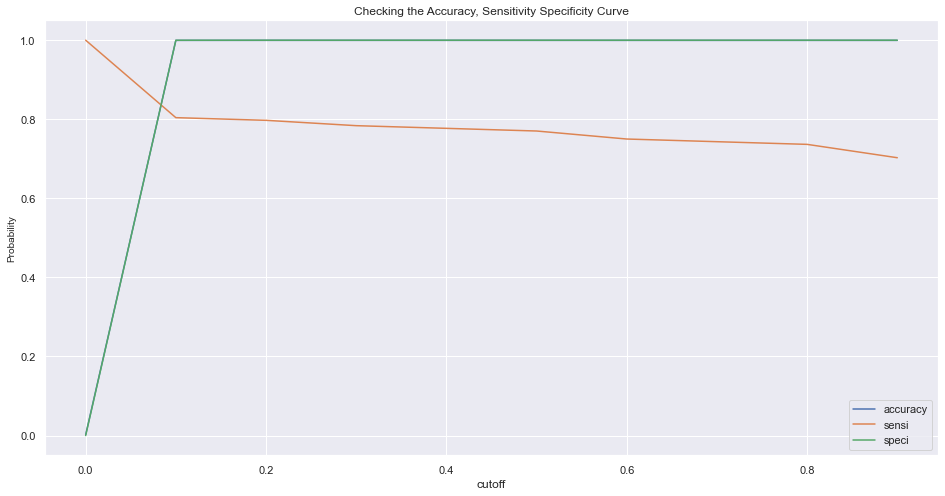

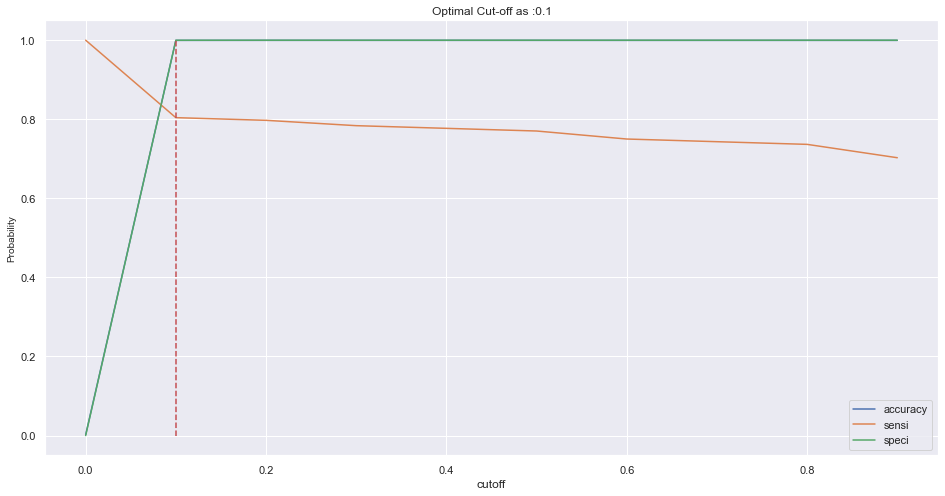

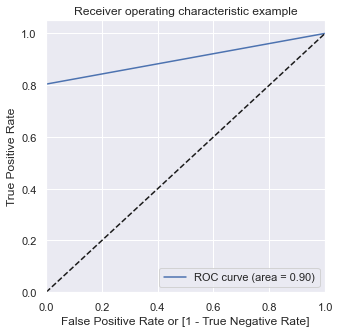





Misclassification Rate: 0.0005149631918354927
Negative Predictive Power: 0.9998241397502784
Accuracy: 0.9994850368081645
Precision: 0.8880597014925373
Recall: 0.8040540540540541
Roc Auc Score: 0.9019390969021661




Final predicted dataset using the optimal cutoff threshold
        Actual   Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0  6.248454e-07          0    1    0    0    0    0    0    0   
165754       0  3.383924e-07          0    1    0    0    0    0    0    0   
235285       0  2.750020e-06          0    1    0    0    0    0    0    0   
101271       0  7.112484e-07          0    1    0    0    0    0    0    0   
5832         0  6.483632e-06          0    1    0    0    0    0    0    0   
253774       0  7.045064e-07          0    1    0    0    0    0    0    0   
113630       0  8.987226e-08          0    1    0    0    0    0    0    0   
230121       0  1.708308e-07          0    1    0    0    0    0    0    0   
282997       0  2.7

In [82]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(xgboost_md1, cut_off_index = 0.1)

Proceed with the model which shows the best result.

Apply the best hyperparameter on the model.

Predict on the test dataset.

Print the important features of the best model to understand the dataset

### xgboost model is choosen for imabance dataset on the basis of performance

In [244]:
var_imp = []
for i in xgboost_md.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgboost_md.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgboost_md.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgboost_md.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgboost_md.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgboost_md.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

NotFittedError: need to call fit or load_model beforehand

# Model building with balanced datadset


### Perform class balancing with :

1.UnderSampling

2.Oversampling
    
    a.Random Oversampling
    
    b.SMOTE

    c.ADASYN


## perform Model Building on balanced dataset


Build different models on the balanced dataset and observe the result.

# UNDERSAMPLING 

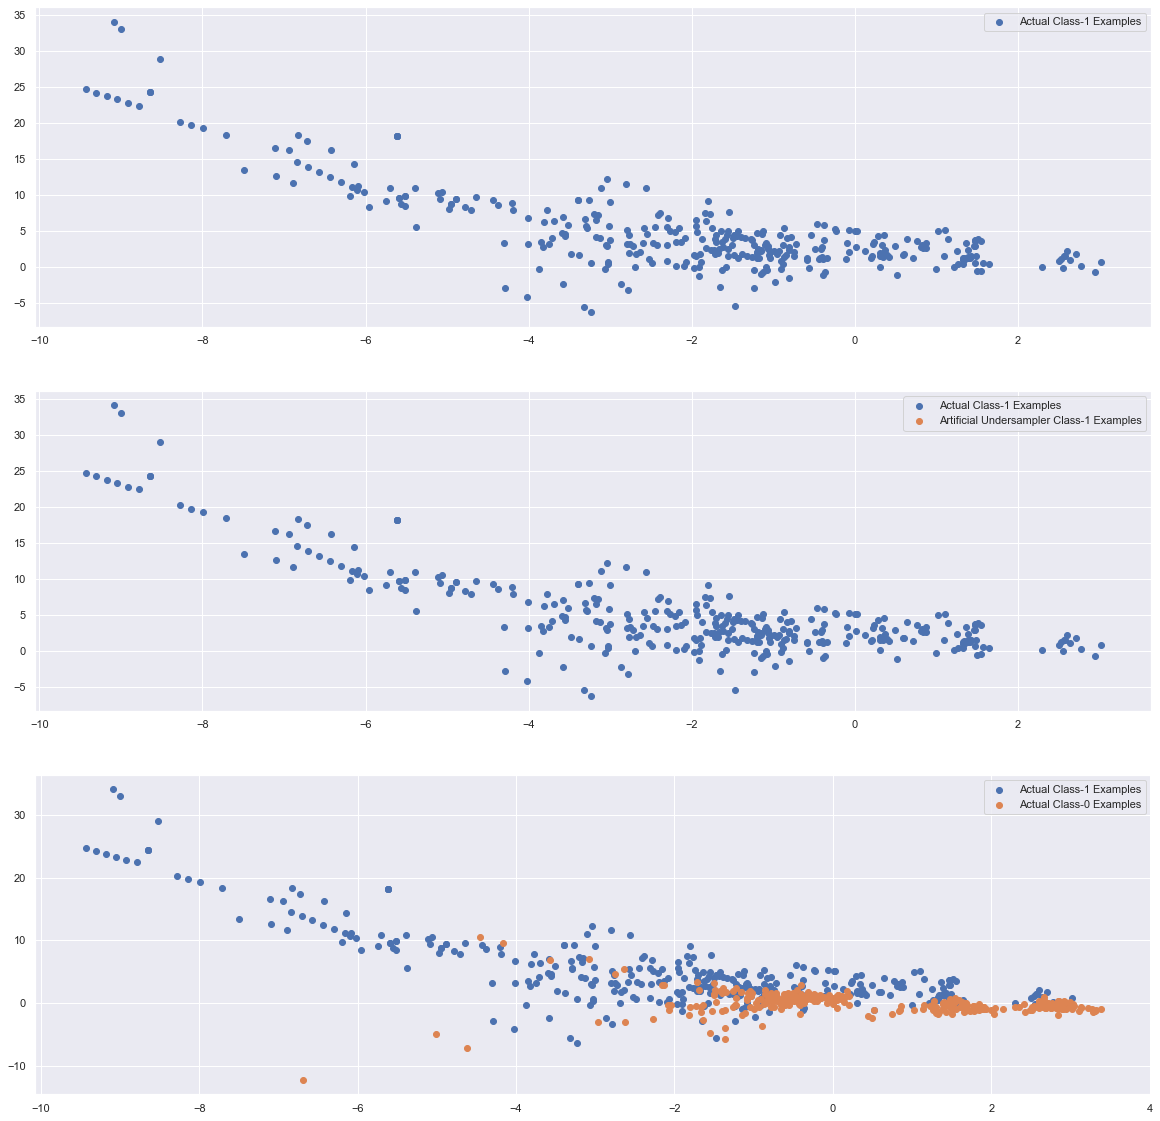

In [87]:
#Plot actual and synthesized data for undersampling
import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)
X_train_under, y_train_under = X_under, y_under
# Artificial minority samples and corresponding minority labels from undersampling are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from undersampling, we do
X_train_under_1 = X_train_under[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_under_1.iloc[:X_train_1.shape[0], 0], X_train_under_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial Undersampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [88]:
#print class distribution for undersampling
print('After Undersampling, Class 0: {0}'.format(sum(y_under == 0)))
print('After Undersampling, Class 1: {0}'.format(sum(y_under == 1)))

After Undersampling, Class 0: 344
After Undersampling, Class 1: 344


# Logistic Regression with undersampling

In [89]:
#define and build undersampling model
logreg=LogisticRegression(random_state=42)
pipe = Pipeline([('logreg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'],
         'logreg__solver' : ['liblinear']}

lgmodel = GridSearchCV(estimator = pipe , cv = folds, param_grid = params, scoring  = 'recall')

In [90]:
#train on undersampled  dataset
lgmodel.fit(X_under, y_under)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 1, 2],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='recall')

In [91]:
#best parameters
lgmodel.best_params_

{'logreg__C': 0.005, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [92]:
#best score
lgmodel.best_score_

0.9622335890878091

In [93]:
#predict on test dataset and evaluate
y_pred = lgmodel.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.8554240838921854
Recall/Sensitivity: 0.8986486486486487
Precision: 0.010664742201908427
Roc_Auc_score: 0.876998865622173


In [94]:
#Logistic regression with best hyperparamter on undersampled data
logreg = LogisticRegression(random_state=42, C=0.005 , penalty='l1', solver = 'liblinear')
logreg.fit(X_under, y_under)

LogisticRegression(C=0.005, penalty='l1', random_state=42, solver='liblinear')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.373214          0
165754       0     0.415661          0
235285       0     0.340495          0
101271       0     0.470568          0
5832         0     0.374598          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.373214          0    1    1    1    1    0    0    0   
165754       0     0.415661          0    1    1    1    1    1    0    0   
235285       0     0.340495          0    1    1    1    1    0    0    0   
101271       0     0.470568          0    1    1    1    1    1    0    0   
5832         0     0.374598          0    1    1    1    1    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

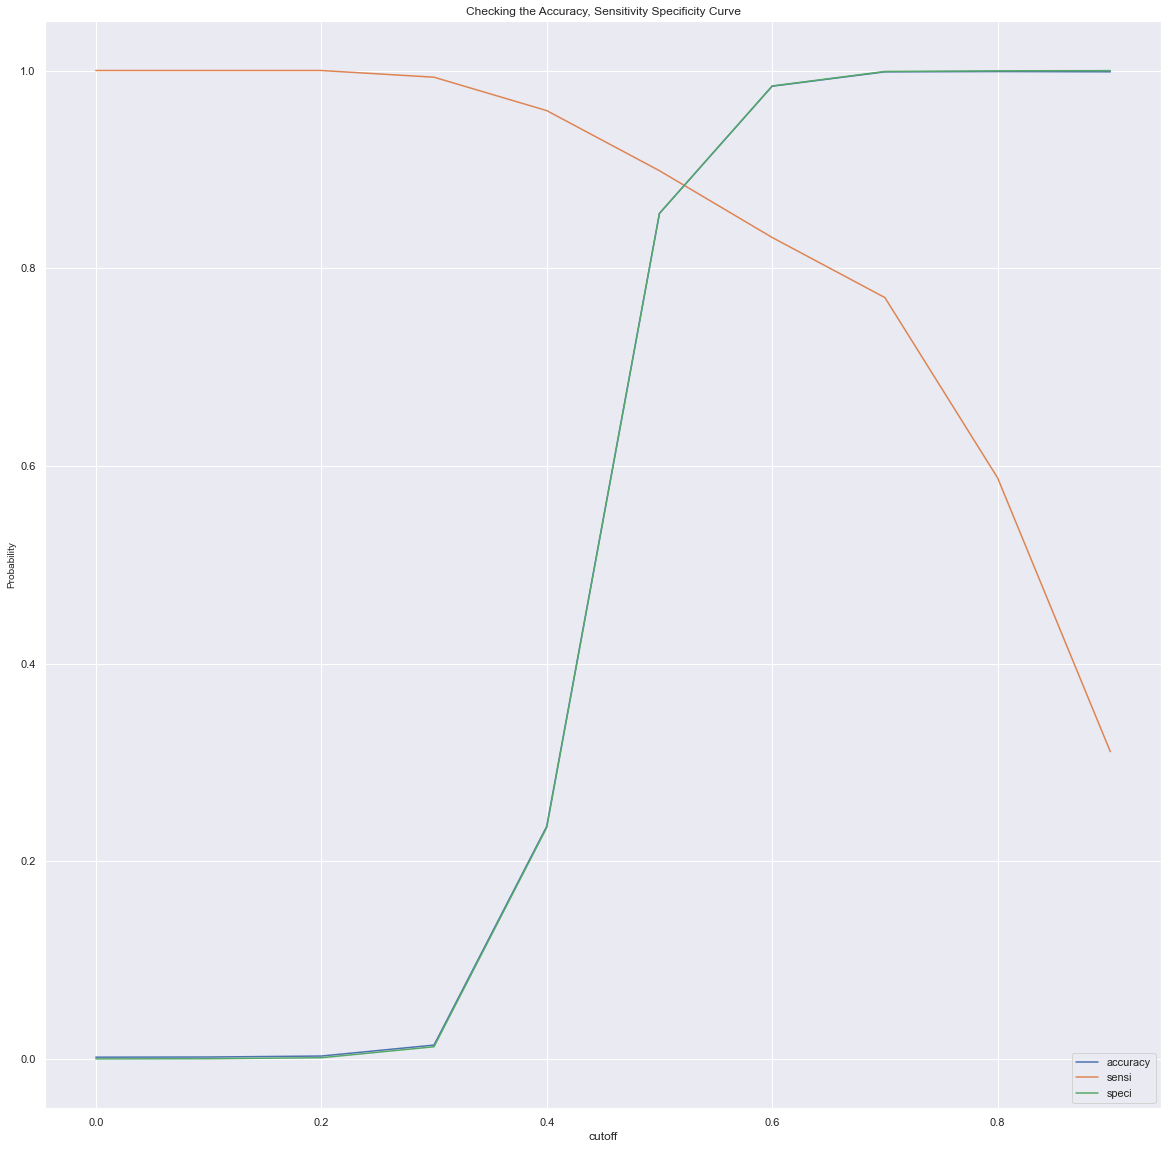

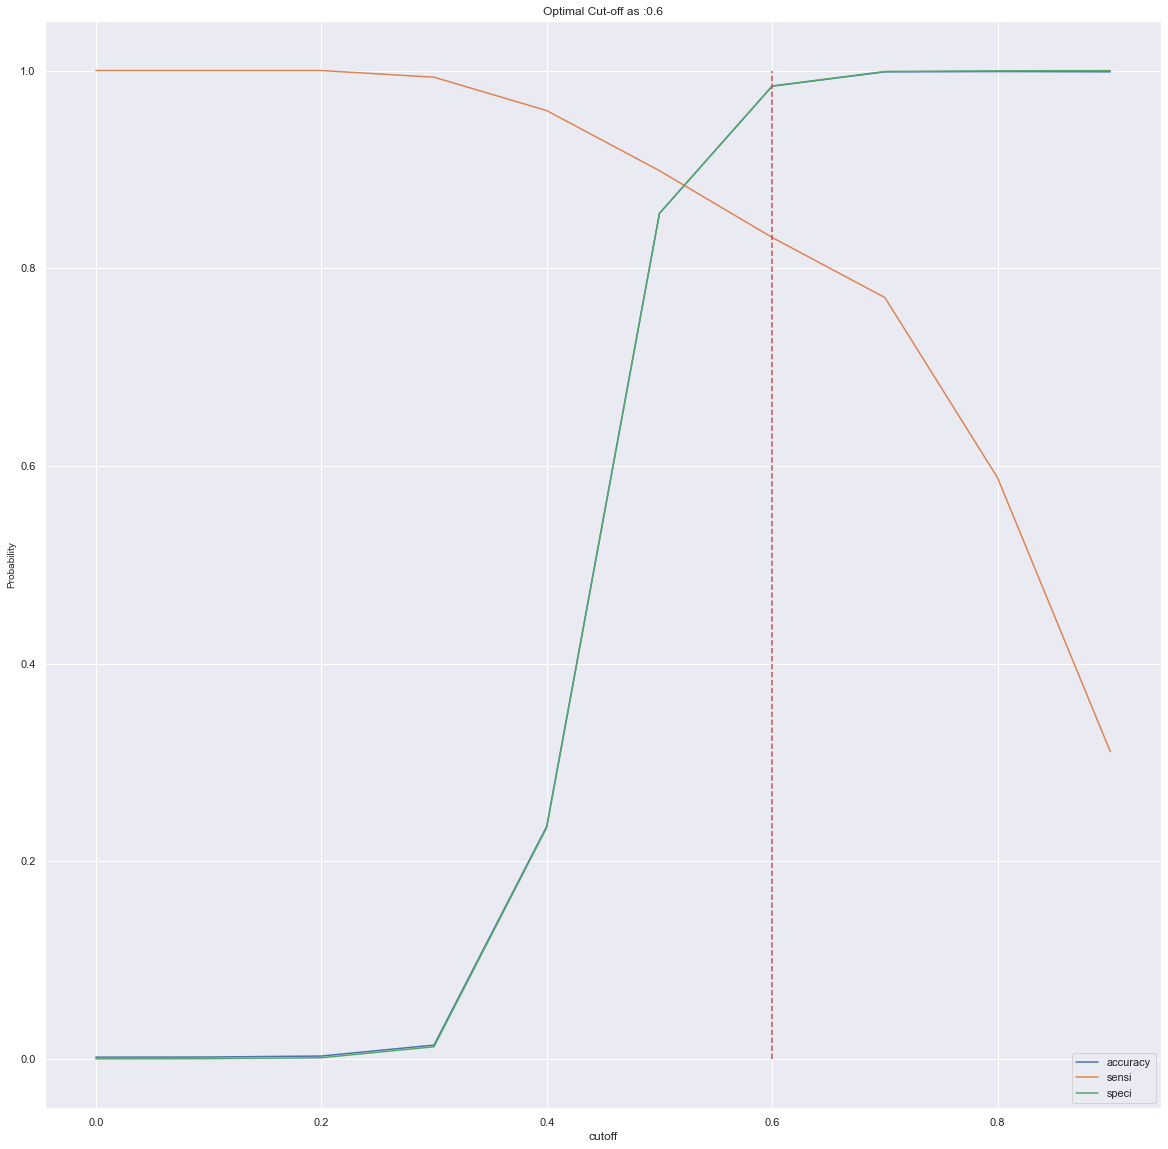

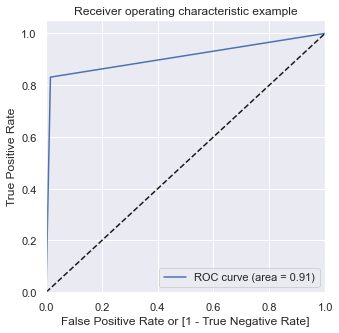





Misclassification Rate: 0.015881932984562808
Negative Predictive Power: 0.984383609824726
Accuracy: 0.9841180670154371
Precision: 0.08453608247422681
Recall: 0.831081081081081
Roc Auc Score: 0.9077323454529035




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.373214          0    1    1    1    1    0    0    0   
165754       0     0.415661          0    1    1    1    1    1    0    0   
235285       0     0.340495          0    1    1    1    1    0    0    0   
101271       0     0.470568          0    1    1    1    1    1    0    0   
5832         0     0.374598          0    1    1    1    1    0    0    0   
253774       0     0.447720          0    1    1    1    1    1    0    0   
113630       0     0.398302          0    1    1    1    1    0    0    0   
230121       0     0.457037          0    1    1    1    1    1    0    0   
282997       0     0.537515   

In [96]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(logreg, cut_off_index = 0.6)

# Decision tree with undersampling

In [98]:
#create decision tree model
dt_class = DecisionTreeClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
from sklearn.model_selection import GridSearchCV
dt_under = GridSearchCV(estimator = dt_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [99]:
#train on dataset
dt_under.fit(X_under, y_under)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [100]:
#best score
dt_under.best_score_

0.9127877237851661

In [101]:
#best score
dt_under.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [102]:
#predict on test dataset
y_pred = dt_under.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.894631508725115
Recall/Sensitivity: 0.8783783783783784
Precision: 0.01426220515633571
Roc_Auc_score: 0.8865190443975837


In [103]:
# Apply decision tree  model using the best hyper parameter found using gridsearchcv
dt_under_tune = DecisionTreeClassifier( criterion = 'gini', max_depth= 6,
                                  min_samples_leaf=2, min_samples_split=6)
dt_under_tune.fit(X_under, y_under)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.000000          0
165754       0     0.003968          0
235285       0     0.000000          0
101271       0     0.003968          0
5832         0     0.003968          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000000          0    0    0    0    0    0    0    0   
165754       0     0.003968          0    1    0    0    0    0    0    0   
235285       0     0.000000          0    0    0    0    0    0    0    0   
101271       0     0.003968          0    1    0    0    0    0    0    0   
5832         0     0.003968          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

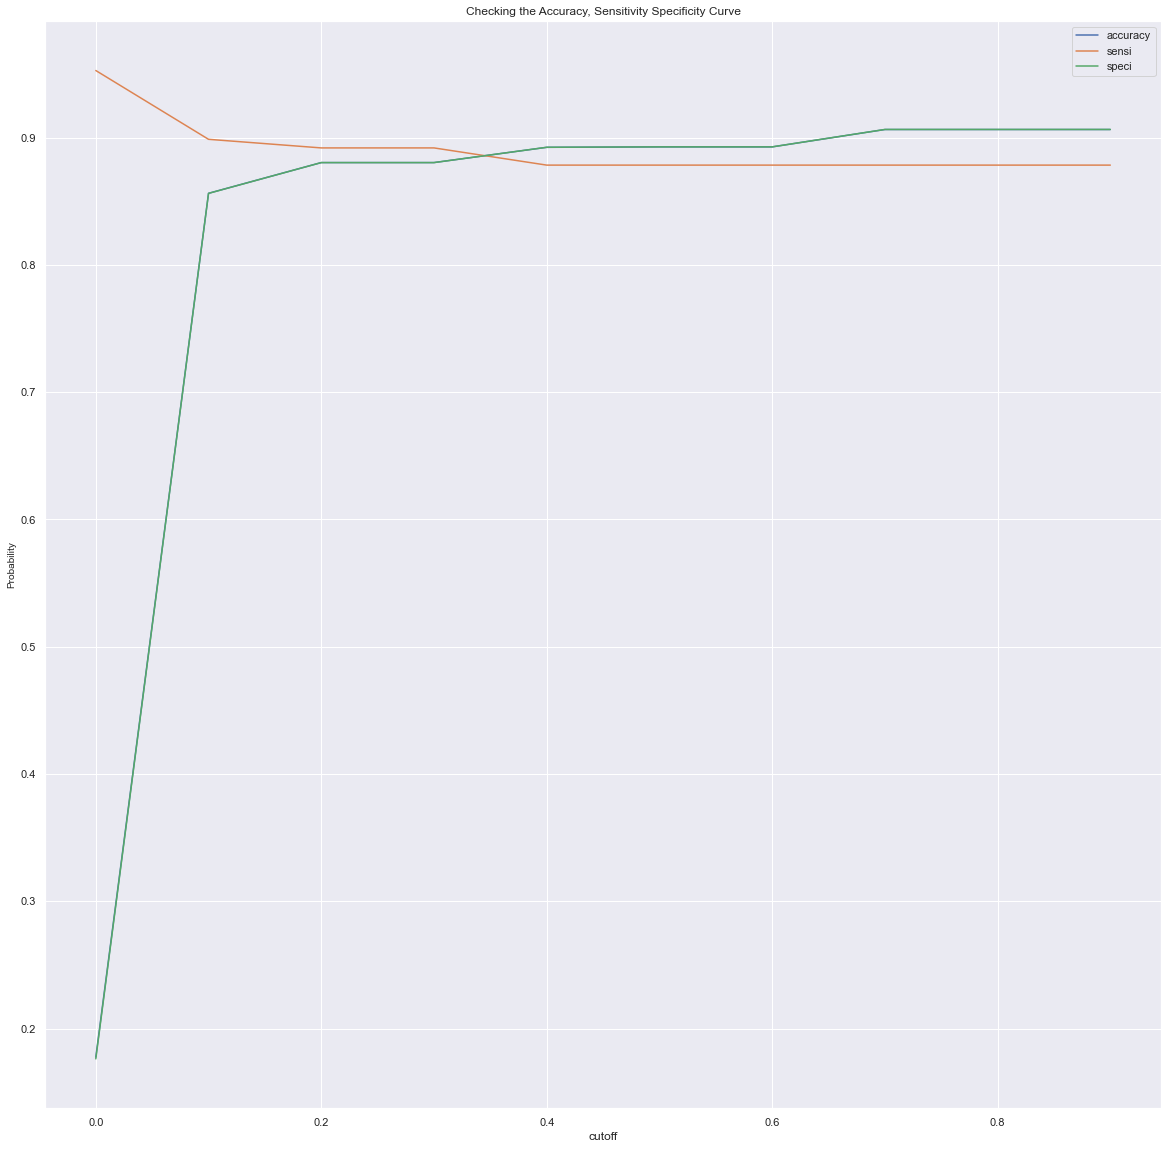

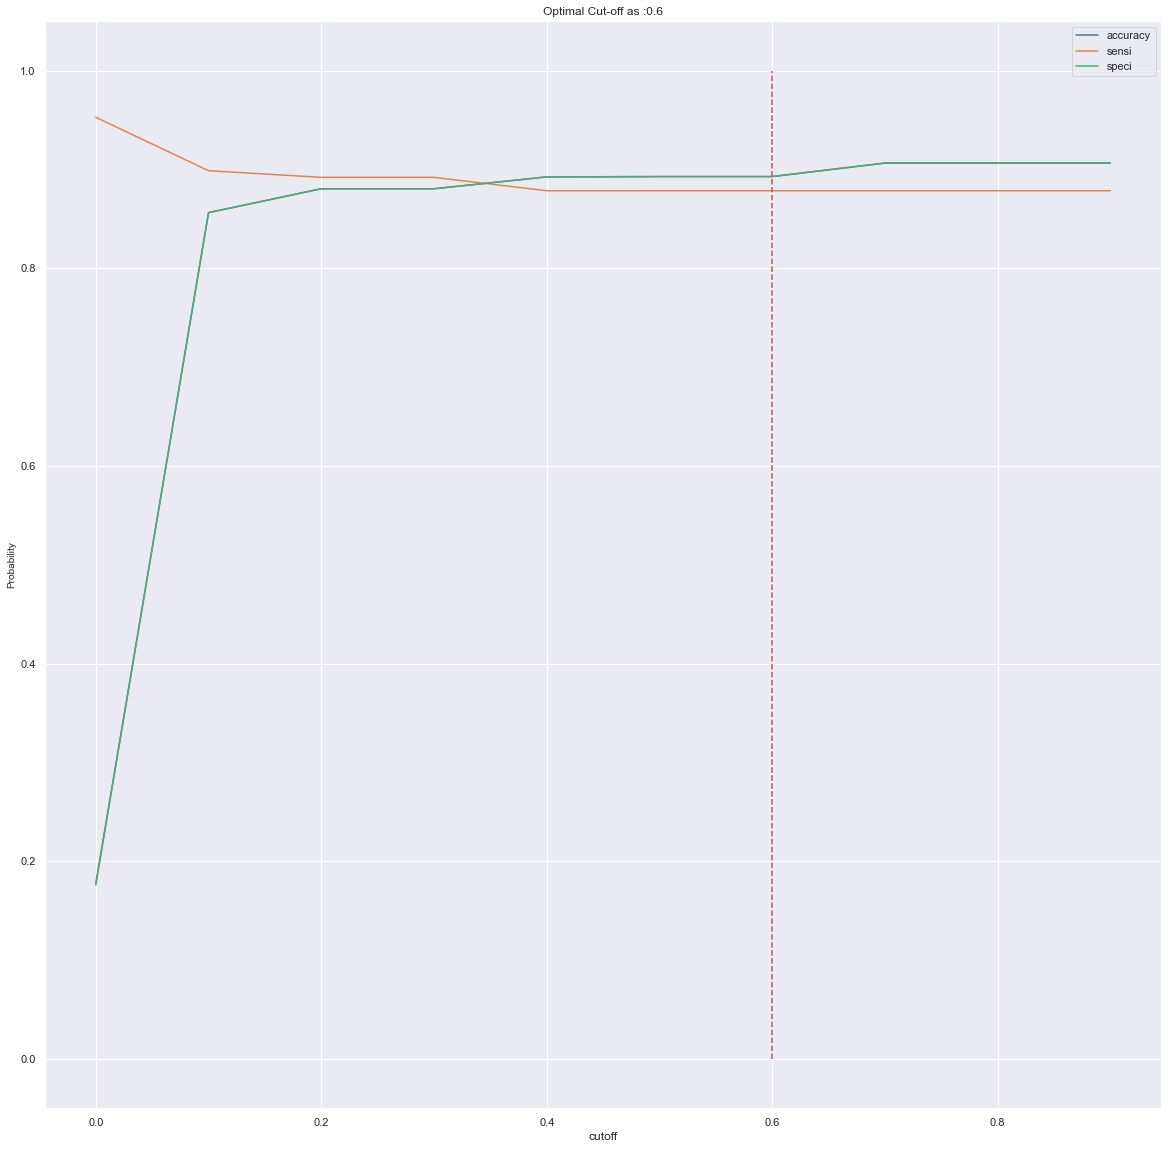

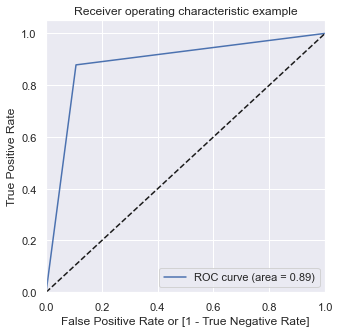





Misclassification Rate: 0.10731130695317347
Negative Predictive Power: 0.8927135236532036
Accuracy: 0.8926886930468265
Precision: 0.014007111302661352
Recall: 0.8783783783783784
Roc Auc Score: 0.885545951015791




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000000          0    0    0    0    0    0    0    0   
165754       0     0.003968          0    1    0    0    0    0    0    0   
235285       0     0.000000          0    0    0    0    0    0    0    0   
101271       0     0.003968          0    1    0    0    0    0    0    0   
5832         0     0.003968          0    1    0    0    0    0    0    0   
253774       0     0.003968          0    1    0    0    0    0    0    0   
113630       0     0.003968          0    1    0    0    0    0    0    0   
230121       0     0.003968          0    1    0    0    0    0    0    0   
282997       0     0.666667  

In [105]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(dt_under_tune, cut_off_index = 0.6)

# Random Forest with undersampling

In [106]:
#Define and build random forest model
#apply cross validation
#Tune Hyperpaprameter using gridsearch cv
rf_class = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6,8,10],
          'min_samples_split' : [4, 6, 10], 'min_samples_leaf' : [1,2,4]
          }
from sklearn.model_selection import GridSearchCV
rf_under = GridSearchCV(estimator = rf_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [107]:
#train on undersampled dataset
rf_under.fit(X_under, y_under)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 6, 10]},
             scoring='recall', verbose=1)

In [108]:
#best score
rf_under.best_score_

0.9127877237851661

In [109]:
#best parameters
rf_under.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [110]:
#predict on test dataset
y_pred = rf_under.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9834041407722107
Recall/Sensitivity: 0.8581081081081081
Precision: 0.08333333333333333
Roc_Auc_score: 0.9208648284253537


In [111]:
# Apply random forest model using the best hyper parameter found using gridsearchcv
rf_under_tune = RandomForestClassifier( criterion = 'gini', max_depth= 8,
                                  min_samples_leaf=1, min_samples_split=6)
rf_under_tune.fit(X_under, y_under)

RandomForestClassifier(max_depth=8, min_samples_split=6)

In [112]:
#predict on test dataset 
y_pred = rf_under_tune.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9808644359397493
Recall/Sensitivity: 0.8445945945945946
Precision: 0.07196315486470926
Roc_Auc_score: 0.9128477398789258


Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.212967          0
165754       0     0.015327          0
235285       0     0.175352          0
101271       0     0.031291          0
5832         0     0.078757          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.212967          0    1    1    1    0    0    0    0   
165754       0     0.015327          0    1    0    0    0    0    0    0   
235285       0     0.175352          0    1    1    0    0    0    0    0   
101271       0     0.031291          0    1    0    0    0    0    0    0   
5832         0     0.078757          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

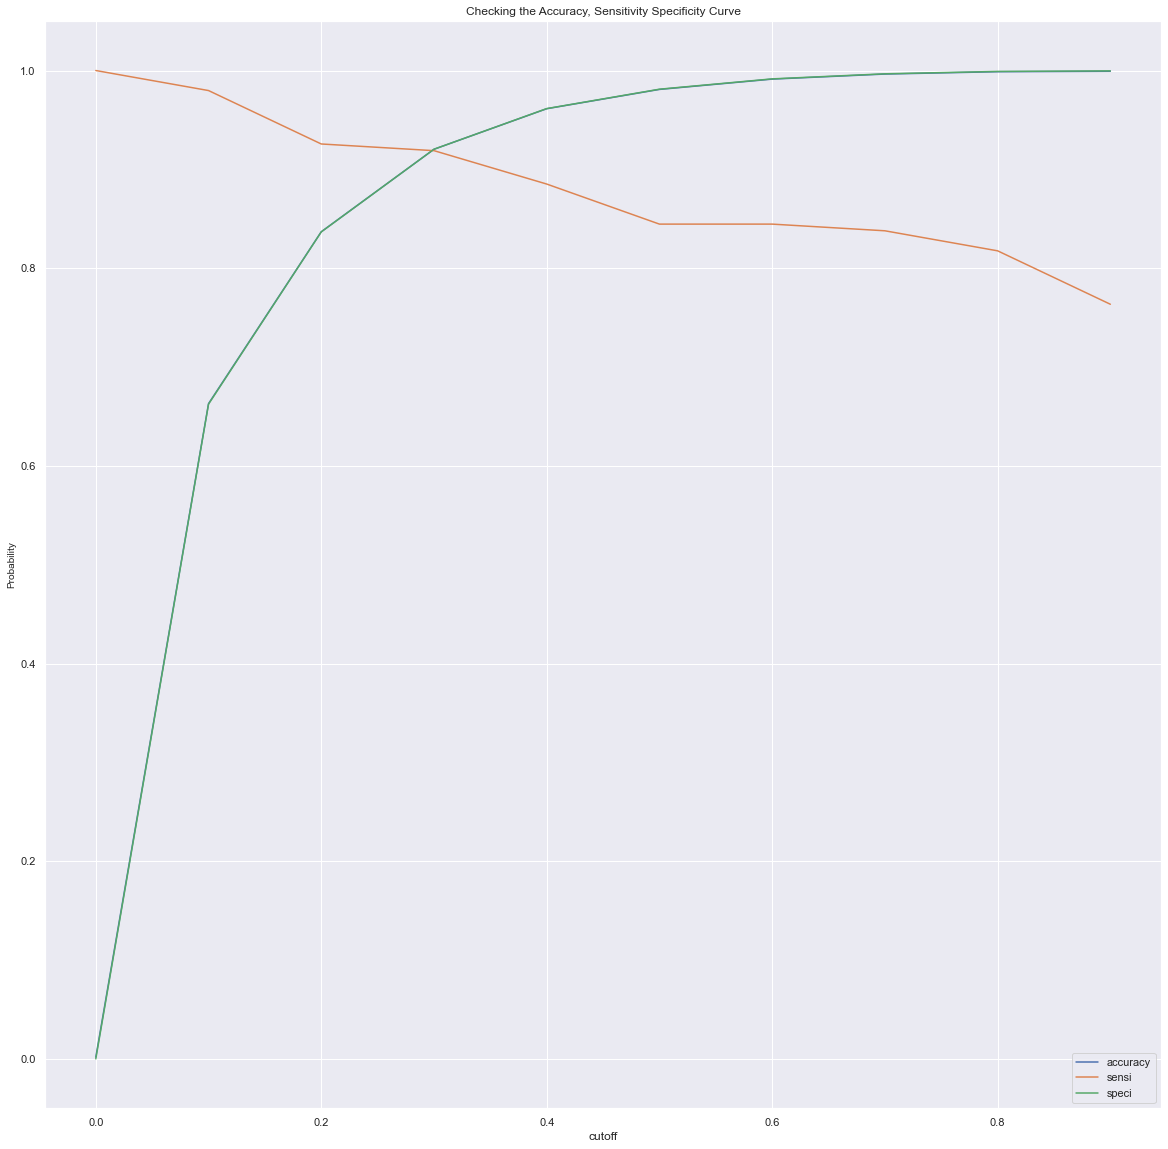

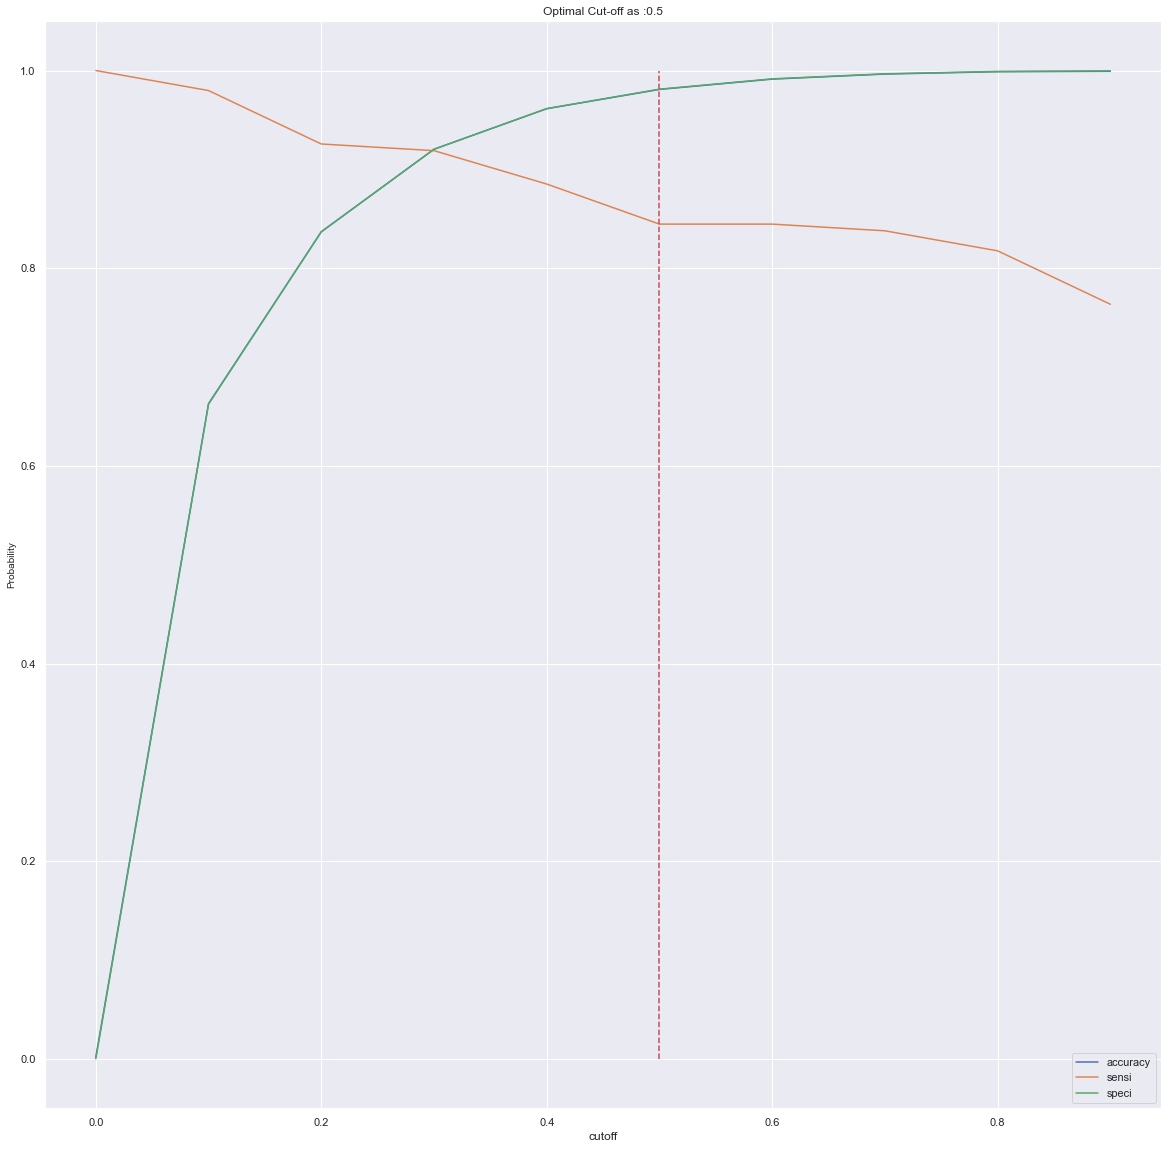

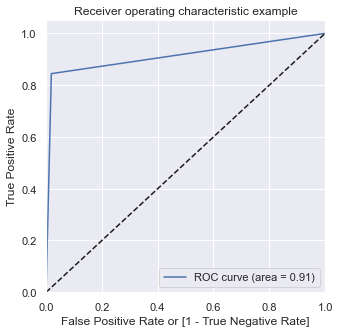





Misclassification Rate: 0.019135564060250694
Negative Predictive Power: 0.9811008851632569
Accuracy: 0.9808644359397493
Precision: 0.07196315486470926
Recall: 0.8445945945945946
Roc Auc Score: 0.9128477398789258




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.212967          0    1    1    1    0    0    0    0   
165754       0     0.015327          0    1    0    0    0    0    0    0   
235285       0     0.175352          0    1    1    0    0    0    0    0   
101271       0     0.031291          0    1    0    0    0    0    0    0   
5832         0     0.078757          0    1    0    0    0    0    0    0   
253774       0     0.027902          0    1    0    0    0    0    0    0   
113630       0     0.092318          0    1    0    0    0    0    0    0   
230121       0     0.013615          0    1    0    0    0    0    0    0   
282997       0     0.193092 

In [113]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(rf_under_tune, cut_off_index = 0.5)

# SVM with undersampling

In [114]:
#define SVC model
#apply cross validation
# Tune Hyperpaprameter using gridsearch cv
from sklearn import svm
svm_model = svm.SVC(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'kernel' :['rbf','sigmoid'],'C':[0.001,0.01,0.1,1,10]
          }
from sklearn.model_selection import GridSearchCV
svm_model = GridSearchCV(estimator = svm_model , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
svm_model.fit(X_under, y_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='recall', verbose=1)

In [115]:
svm_model.best_score_

0.9098891730605285

In [116]:
svm_model.best_params_

{'C': 10, 'kernel': 'rbf'}

In [117]:
#predict on test dataset
y_pred = svm_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9832051777208197
Recall/Sensitivity: 0.8716216216216216
Precision: 0.08349514563106795
Roc_Auc_score: 0.9275102070239534


In [118]:
#tune model with best hyperparameters found by using gridsearchcv
#train on undersampled dataset
#predict on test dataset and evaluate
svm_under = svm.SVC(kernel='rbf',C=10 , random_state=42) 
svm_under.fit(X_under, y_under)
y_pred = svm_under.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9832051777208197
Recall/Sensitivity: 0.8716216216216216
Precision: 0.08349514563106795
Roc_Auc_score: 0.9275102070239534


# KNN with undersampling

In [119]:
#Define and build KNN Classifer model and tune it 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
model_knn = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
from sklearn.model_selection import GridSearchCV
knn_under = GridSearchCV(estimator = model_knn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_under.fit(X_under, y_under)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='recall',
             verbose=1)

In [120]:
#best parameters
knn_under.best_params_

{'n_neighbors': 3}

In [121]:
#predict on test dataset
y_pred = knn_under.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9781140643469916
Recall/Sensitivity: 0.8851351351351351
Precision: 0.06602822580645161
Roc_Auc_score: 0.9317052661430995


In [122]:
#KNN with best parameter
knn_under_tune = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_under_tune.fit(X_under, y_under)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.333333          0
165754       0     0.000000          0
235285       0     0.000000          0
101271       0     0.000000          0
5832         0     0.000000          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.333333          0    1    1    1    1    0    0    0   
165754       0     0.000000          0    0    0    0    0    0    0    0   
235285       0     0.000000          0    0    0    0    0    0    0    0   
101271       0     0.000000          0    0    0    0    0    0    0    0   
5832         0     0.000000          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

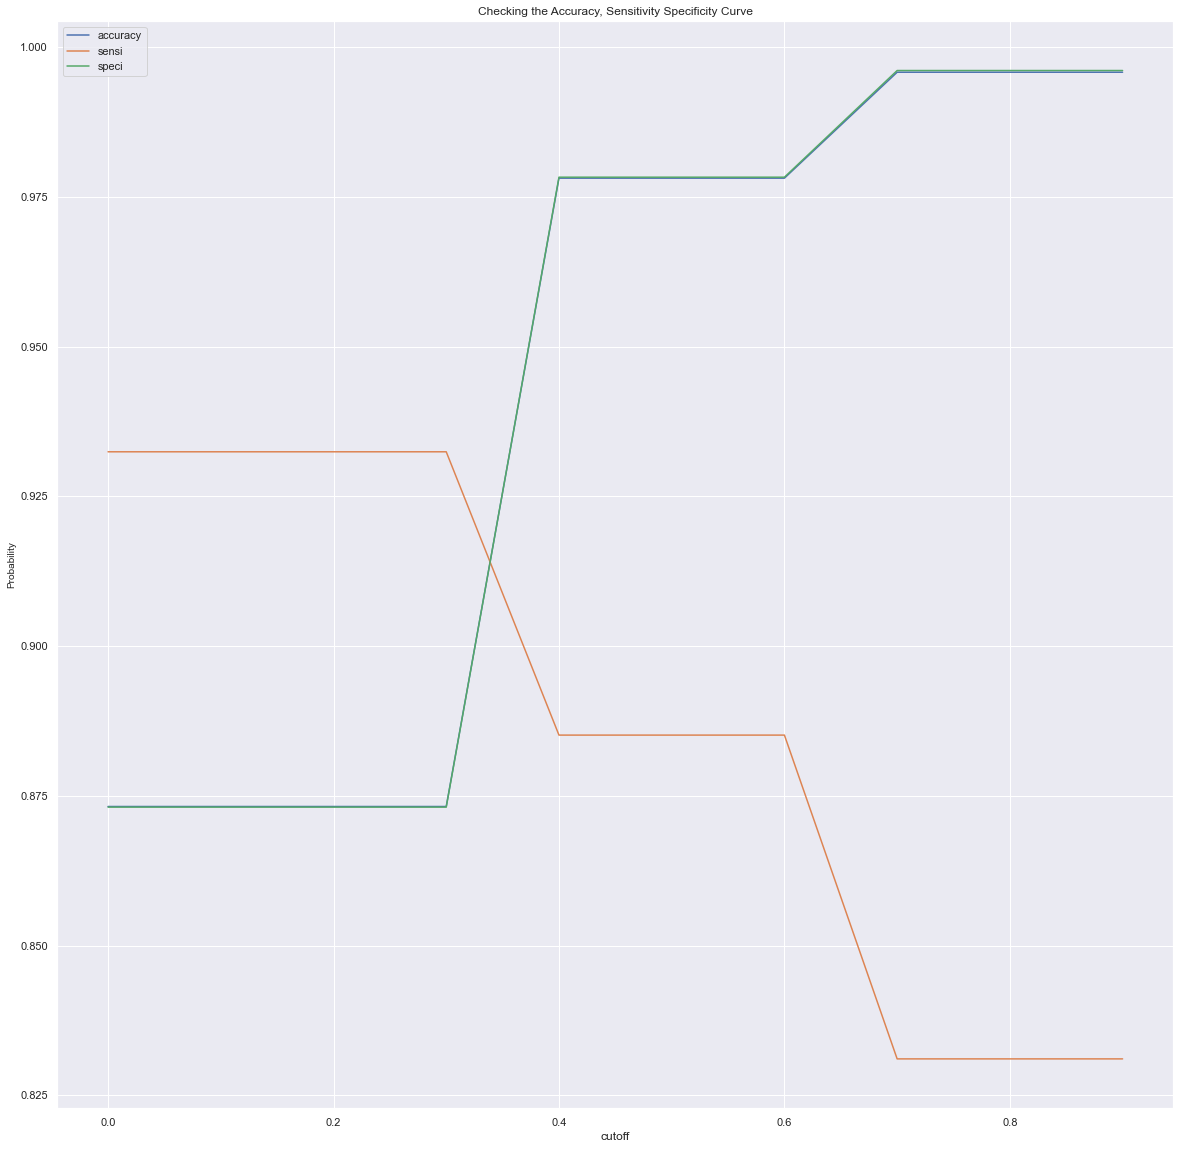

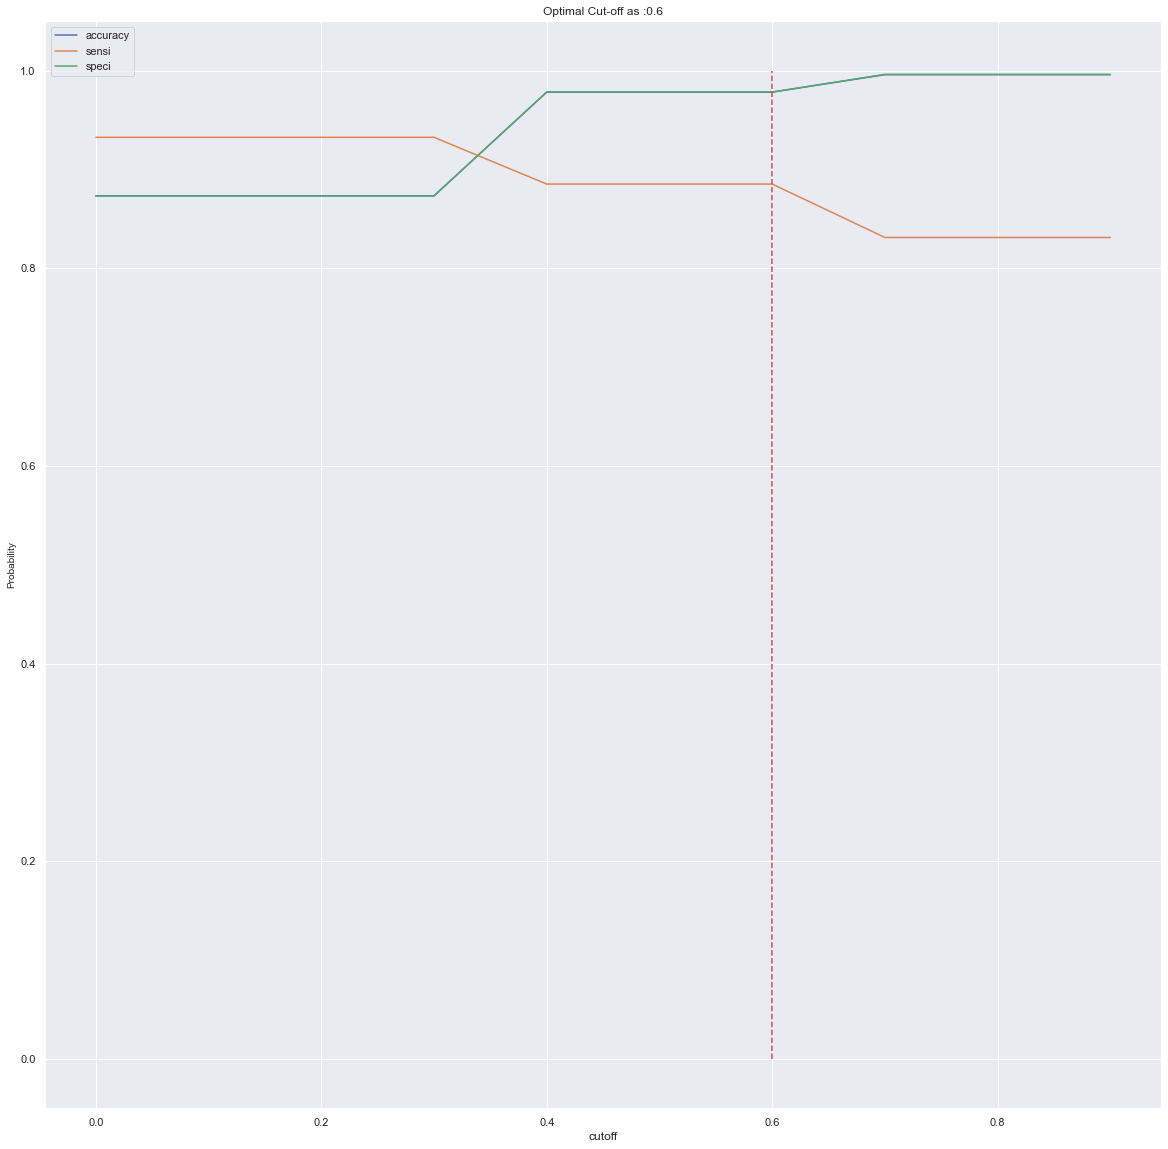

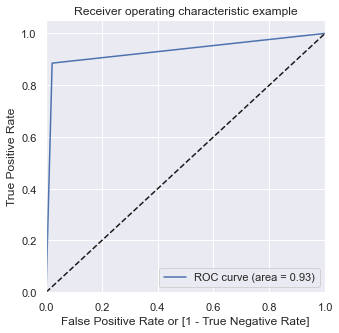





Misclassification Rate: 0.021885935653008438
Negative Predictive Power: 0.9782753971510639
Accuracy: 0.9781140643469916
Precision: 0.06602822580645161
Recall: 0.8851351351351351
Roc Auc Score: 0.9317052661430995




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.333333          0    1    1    1    1    0    0    0   
165754       0     0.000000          0    0    0    0    0    0    0    0   
235285       0     0.000000          0    0    0    0    0    0    0    0   
101271       0     0.000000          0    0    0    0    0    0    0    0   
5832         0     0.000000          0    0    0    0    0    0    0    0   
253774       0     0.000000          0    0    0    0    0    0    0    0   
113630       0     0.000000          0    0    0    0    0    0    0    0   
230121       0     0.000000          0    0    0    0    0    0    0    0   
282997       0     0.000000 

In [124]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(knn_under_tune, cut_off_index = 0.6)

# XGBoost with undersampling

In [125]:
# Find Hyperpaprameter using gridsearch cv
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from xgboost import XGBClassifier

xgboost_md = XGBClassifier(random_state=42)

weights=[1, 10, 99, 1000]
params = {'scale_pos_weight': weights,'n_estimators' :[140,120,170],'max_depth':[5,6,8],'learning_rate' : [0.01,0.1]}
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
from sklearn.model_selection import GridSearchCV
xgboost_under = GridSearchCV(estimator = xgboost_md , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_under.fit(X_under, y_under)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[15:18:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_c...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 6, 8],
                         'n_estimators': [140, 120, 170],
                         'scale_pos_weight': [1, 10, 99, 1000]},
             scoring='recall', verbose=1)

In [126]:
xgboost_under.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 140,
 'scale_pos_weight': 1000}

In [127]:
#predict on test dataset and evaluate
y_pred = xgboost_under.predict(X_test.values)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.3711714242243367
Recall/Sensitivity: 0.972972972972973
Precision: 0.0026731515342775995
Roc_Auc_score: 0.6715500892768025


In [128]:
#Tune with best params
xgunder_tune = XGBClassifier(randon_state=42, learning_rate=0.01,max_depth=5, n_estimators=140,scale_pos_weight=1000)
xgunder_tune.fit(X_under, y_under)

[15:20:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "randon_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:20:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1000,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.132990          0
165754       0     0.874100          1
235285       0     0.788104          1
101271       0     0.788104          1
5832         0     0.874100          1




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.132990          0    1    1    0    0    0    0    0   
165754       0     0.874100          1    1    1    1    1    1    1    1   
235285       0     0.788104          1    1    1    1    1    1    1    1   
101271       0     0.788104          1    1    1    1    1    1    1    1   
5832         0     0.874100          1    1    1    1    1    1    1    1   

        0.7  0.8  0.9  
186882    0    0    0  
165754    1    1    0  
235285    1    0    0  
101271    1    0    0  
5832      1    1    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

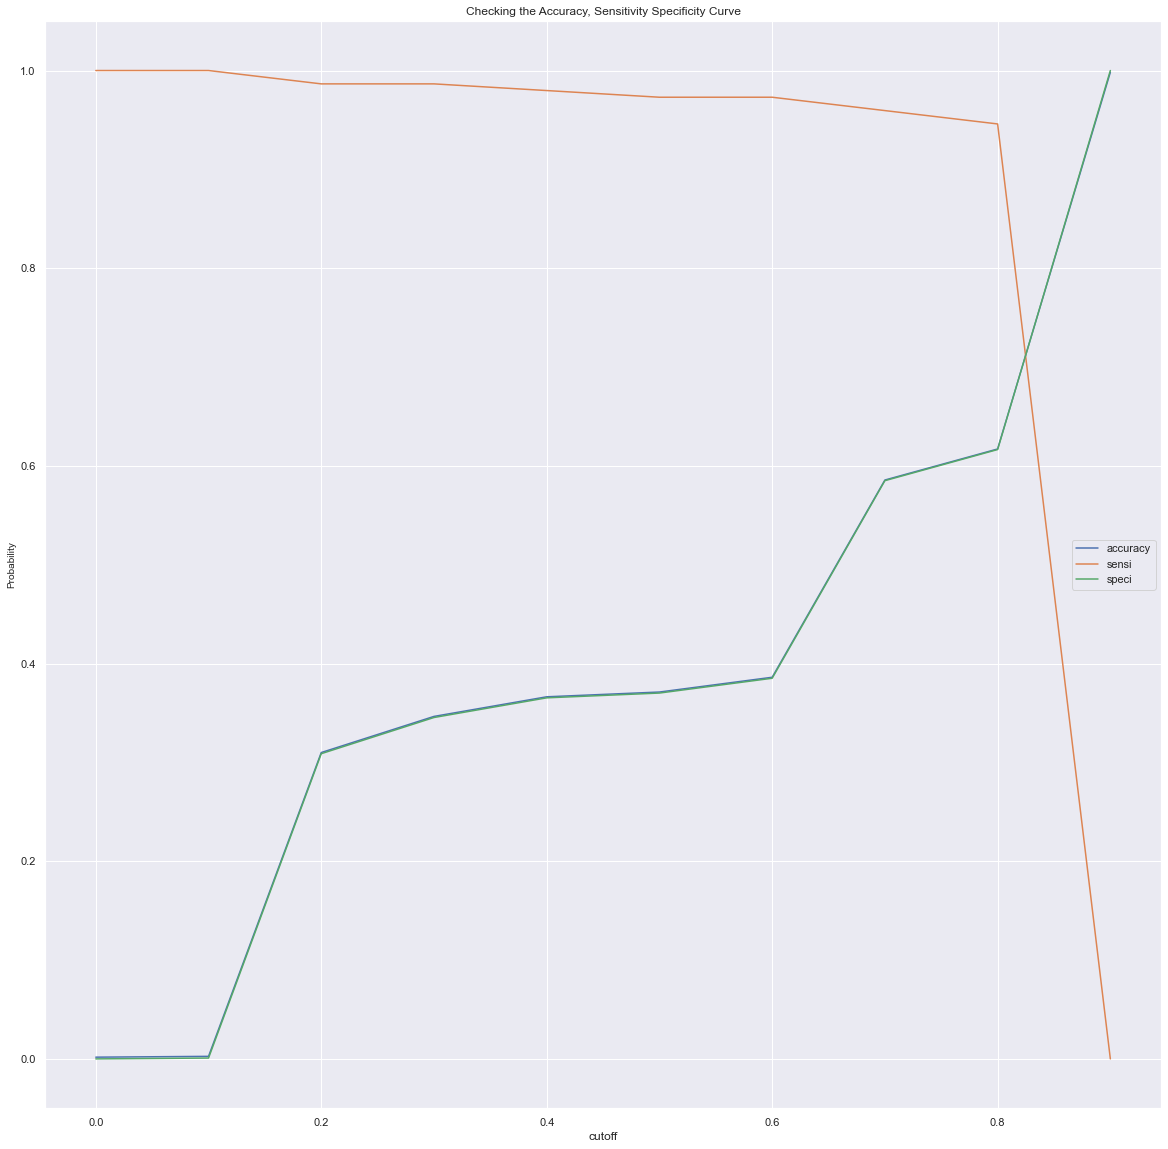

<Figure size 720x576 with 0 Axes>

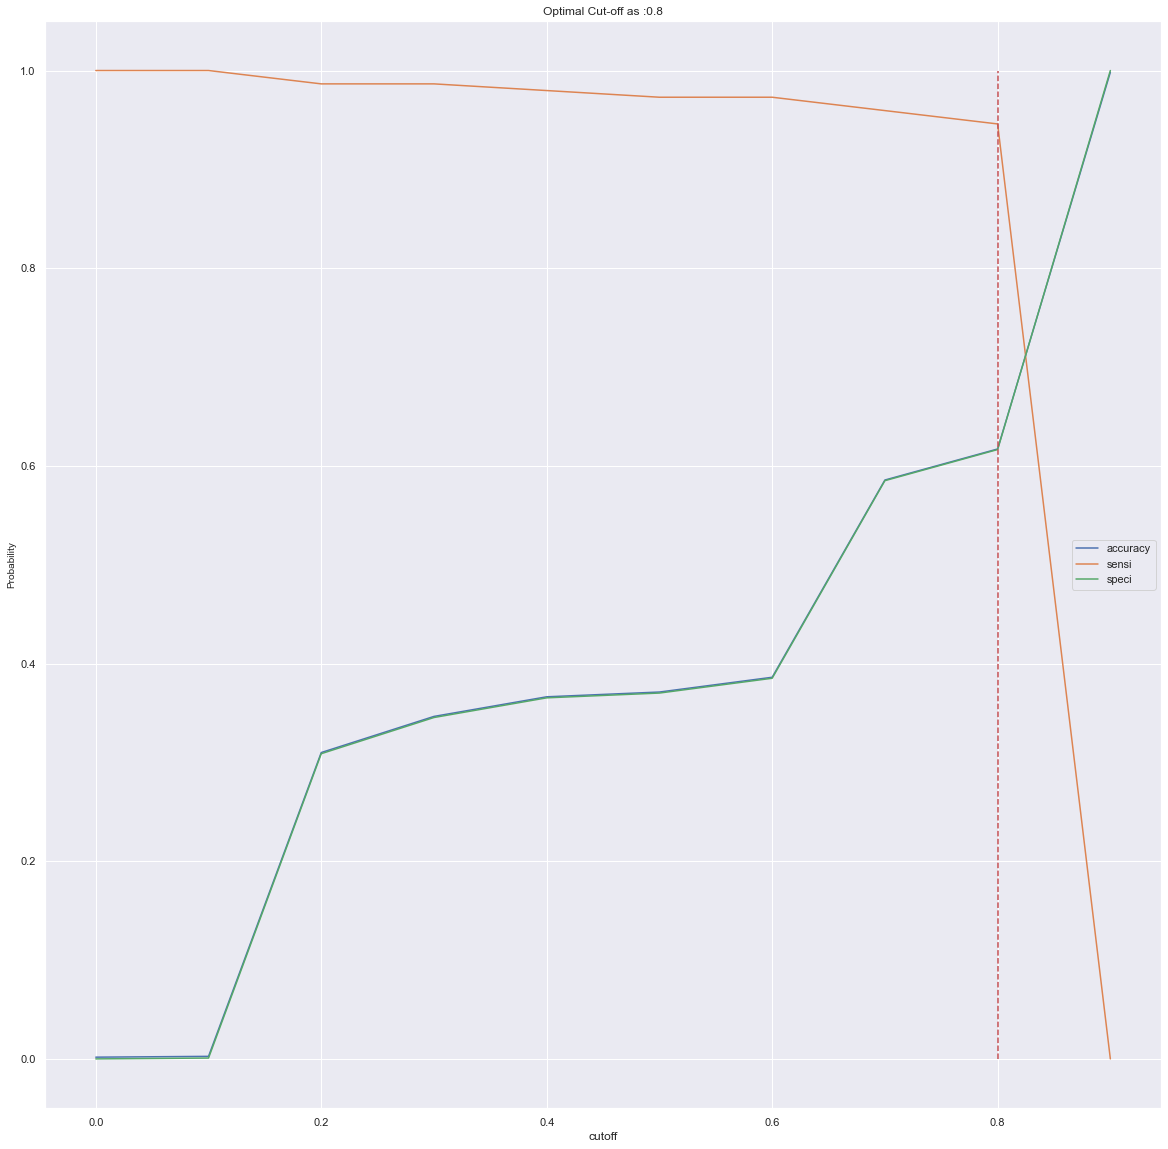

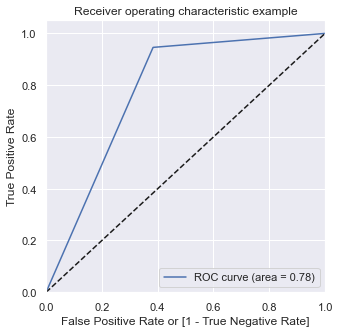





Misclassification Rate: 0.3829219479653102
Negative Predictive Power: 0.6165074154405299
Accuracy: 0.6170780520346898
Precision: 0.00426179604261796
Recall: 0.9459459459459459
Roc Auc Score: 0.781226680693238




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.132990          0    1    1    0    0    0    0    0   
165754       0     0.874100          1    1    1    1    1    1    1    1   
235285       0     0.788104          1    1    1    1    1    1    1    1   
101271       0     0.788104          1    1    1    1    1    1    1    1   
5832         0     0.874100          1    1    1    1    1    1    1    1   
253774       0     0.132990          0    1    1    0    0    0    0    0   
113630       0     0.874100          1    1    1    1    1    1    1    1   
230121       0     0.644517          1    1    1    1    1    1    1    1   
282997       0     0.876789    

In [129]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff_xgboost(xgunder_tune, cut_off_index = 0.8)

### svc model shows best performance with undersampling 

# OVERSAMPLING

## 1.RANDOM OVERSAMPLER

In [130]:
#Check the class distribution before applying balancing methods
print('Before over sampling,Class 0: {0}'.format(sum(y_train == 0)))
print('Before over sampling,Class 1: {0}'.format(sum(y_train == 1)))

Before over sampling,Class 0: 199020
Before over sampling,Class 1: 344


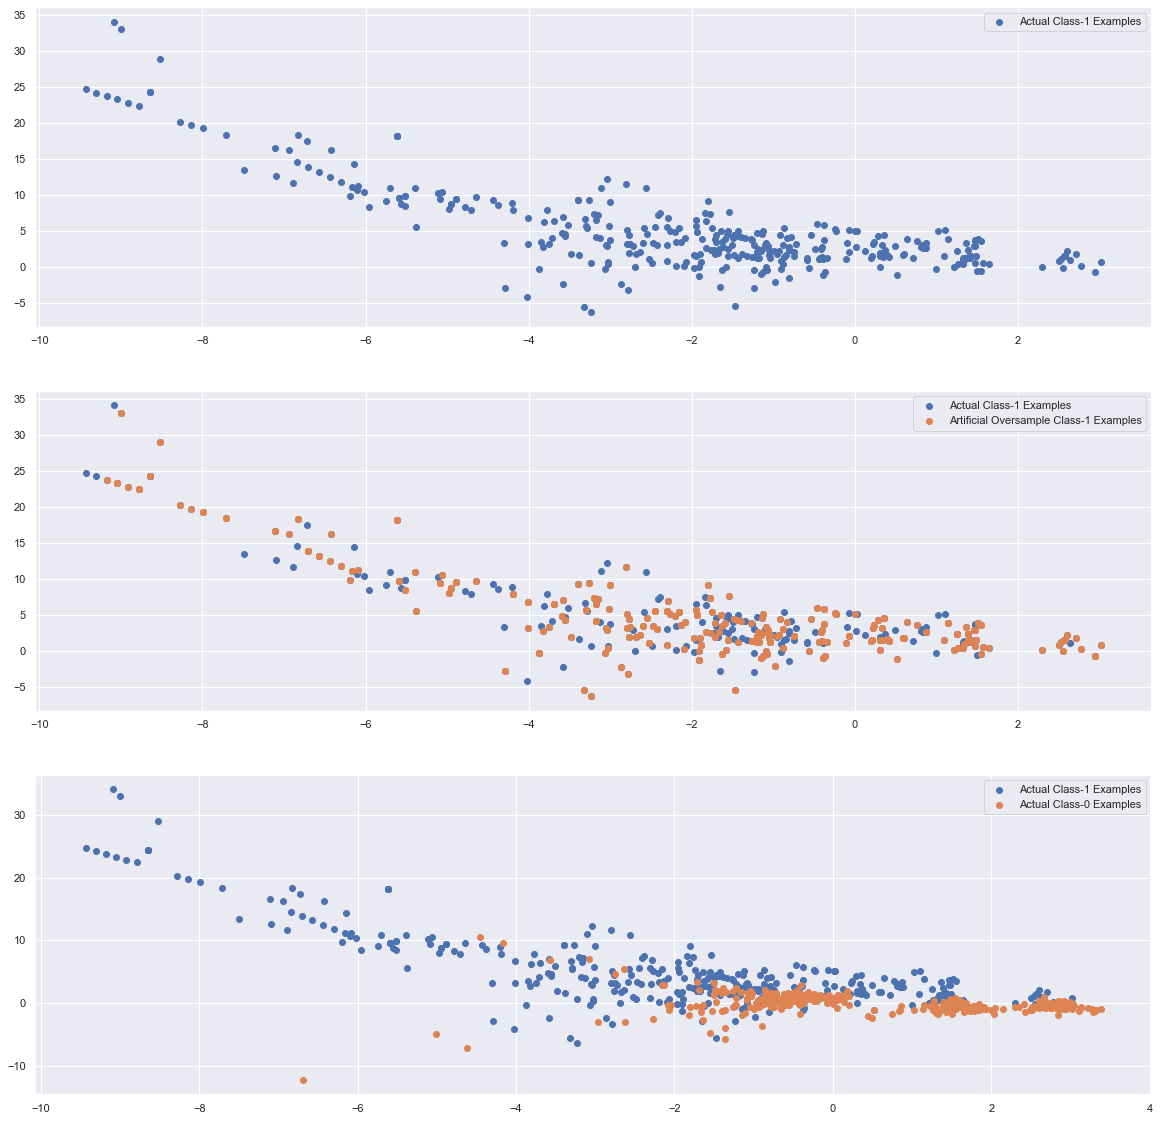

In [131]:
#Plot actual and synthasized data
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler #import oversampler 

oversample = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train_over, y_train_over = X_over, y_over
# Artificial minority samples and corresponding minority labels from oversampling are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from oversampling, we do
X_train_over_1 = X_train_over[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_over_1.iloc[:X_train_1.shape[0], 0], X_train_over_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial Oversample Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [132]:
#from imblearn import over_sampling #- import the packages

print('After Oversampling, Class 0: {0}'.format(sum(y_over == 0)))
print('After Oversampling, Class 1: {0}'.format(sum(y_over == 1)))

After Oversampling, Class 0: 199020
After Oversampling, Class 1: 199020


### logistic regression using RandomOverSampler

In [133]:
#Logistic Regression using RandomOversampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

logreg=LogisticRegression(random_state=42)
pipe = Pipeline([('logreg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'],
         'logreg__solver' : ['liblinear']}

lgmodel = GridSearchCV(estimator = pipe , cv = folds, param_grid = params, scoring  = 'recall')

In [134]:
#train on oversampled dataset
lgmodel.fit(X_over,y_over)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 1, 2],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='recall')

In [135]:
#best score
lgmodel.best_score_

0.9321927444477941

In [136]:
#best parameters
lgmodel.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

In [137]:
# predict churn on test data based on best estimators and values
y_pred = lgmodel.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9760542115796496
Recall/Sensitivity: 0.8783783783783784
Precision: 0.060240963855421686
Roc_Auc_score: 0.9273010363080121


In [139]:
#Logistic regression with best hyperparamter on Oversapled data
logreg = LogisticRegression(random_state=42, C=0.1 , penalty='l1', solver = 'liblinear')
logreg.fit(X_over, y_over)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.001620          0
165754       0     0.082252          0
235285       0     0.126551          0
101271       0     0.021533          0
5832         0     0.080474          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.001620          0    1    0    0    0    0    0    0   
165754       0     0.082252          0    1    0    0    0    0    0    0   
235285       0     0.126551          0    1    1    0    0    0    0    0   
101271       0     0.021533          0    1    0    0    0    0    0    0   
5832         0     0.080474          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

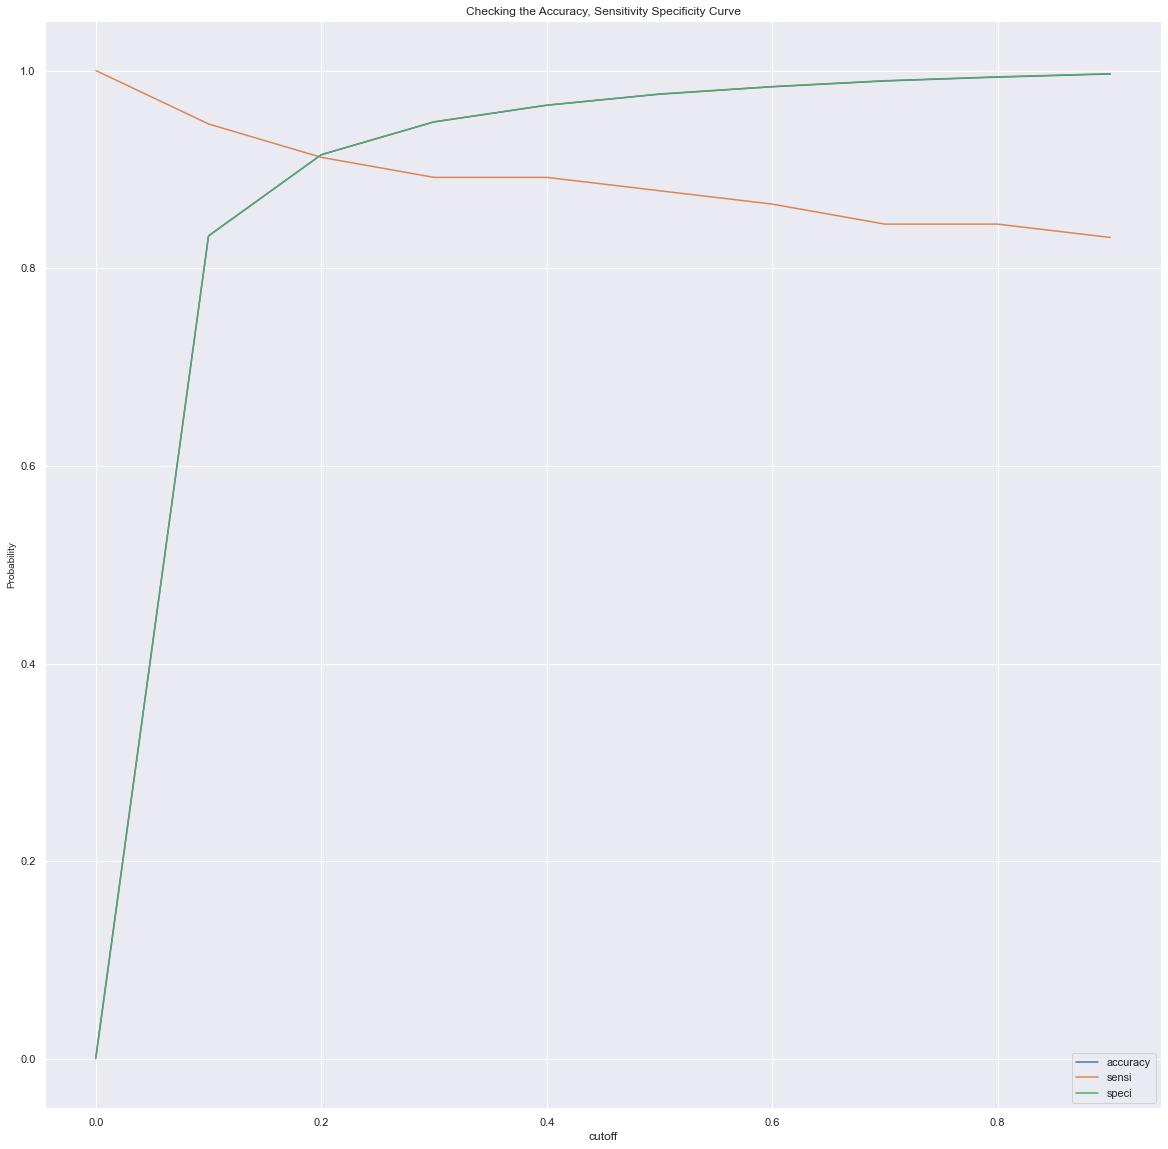

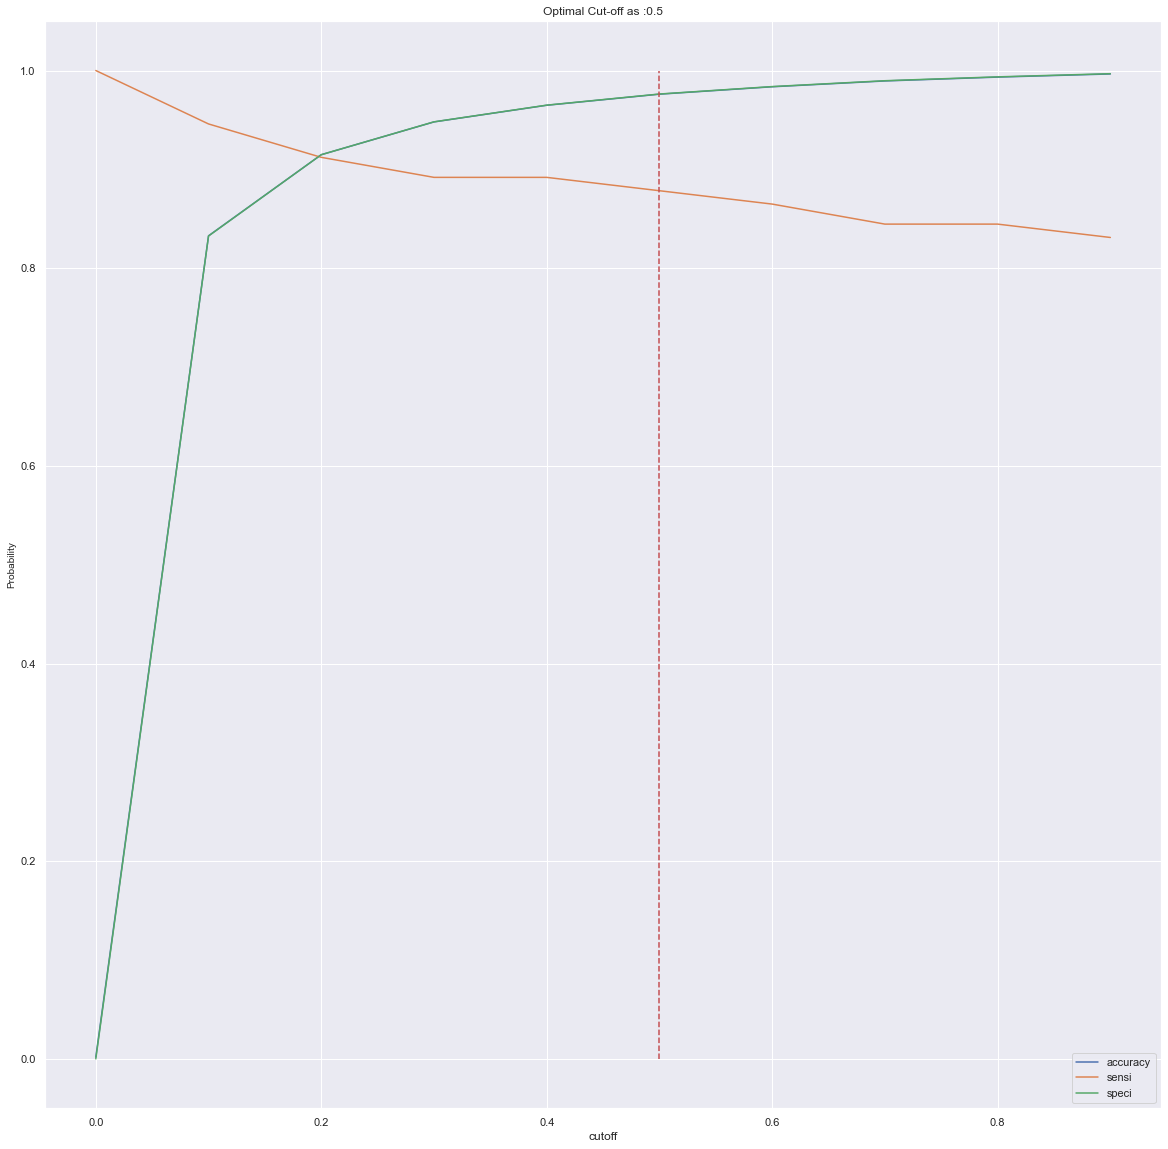

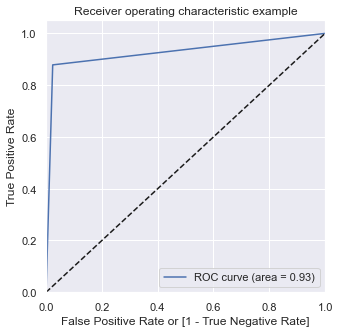





Misclassification Rate: 0.02394578842035041
Negative Predictive Power: 0.9762236942376458
Accuracy: 0.9760542115796496
Precision: 0.060240963855421686
Recall: 0.8783783783783784
Roc Auc Score: 0.9273010363080121




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.001620          0    1    0    0    0    0    0    0   
165754       0     0.082252          0    1    0    0    0    0    0    0   
235285       0     0.126551          0    1    1    0    0    0    0    0   
101271       0     0.021533          0    1    0    0    0    0    0    0   
5832         0     0.080474          0    1    0    0    0    0    0    0   
253774       0     0.003136          0    1    0    0    0    0    0    0   
113630       0     0.145449          0    1    1    0    0    0    0    0   
230121       0     0.014758          0    1    0    0    0    0    0    0   
282997       0     0.005585 

In [141]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(logreg, cut_off_index = 0.5)

# Decision tree model with RandomOverSampler

In [142]:
from sklearn.tree import DecisionTreeClassifier 
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_over, y_over)
y_pred = dt_model1.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9989817773252344
Recall/Sensitivity: 0.668918918918919
Precision: 0.7226277372262774
Roc_Auc_score: 0.8342367031431455


In [143]:
#tune hyperparameters using gridsearchcv
#apply cross validation
dt_class = DecisionTreeClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
from sklearn.model_selection import GridSearchCV
dtmodel_2 = GridSearchCV(estimator = dt_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [144]:
#train on oversampled dataset
dtmodel_2.fit(X_over, y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [145]:
#best score
dtmodel_2.best_score_

0.9786353130338659

In [146]:
dtmodel_2.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [155]:
#Decision tree model with best hyperparamter on Oversapled data

dt_over_tune =DecisionTreeClassifier( criterion = 'gini', max_depth= 6,
                                  min_samples_leaf=1, min_samples_split=6) 
dt_over_tune.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=6, min_samples_split=6)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0          0.0          0
165754       0          0.0          0
235285       0          0.0          0
101271       0          0.0          0
5832         0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

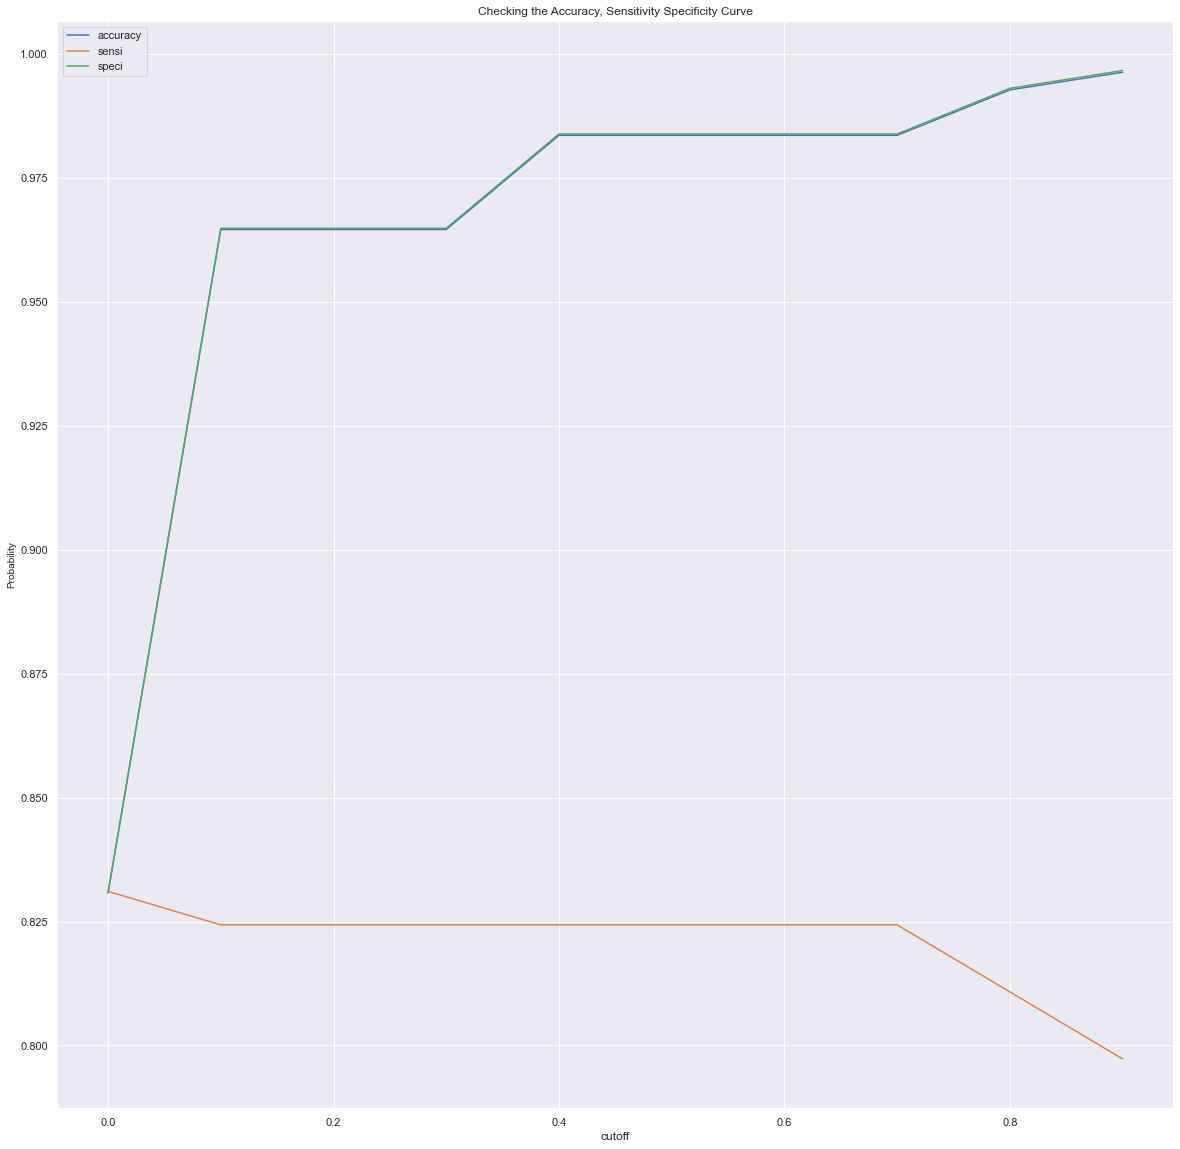

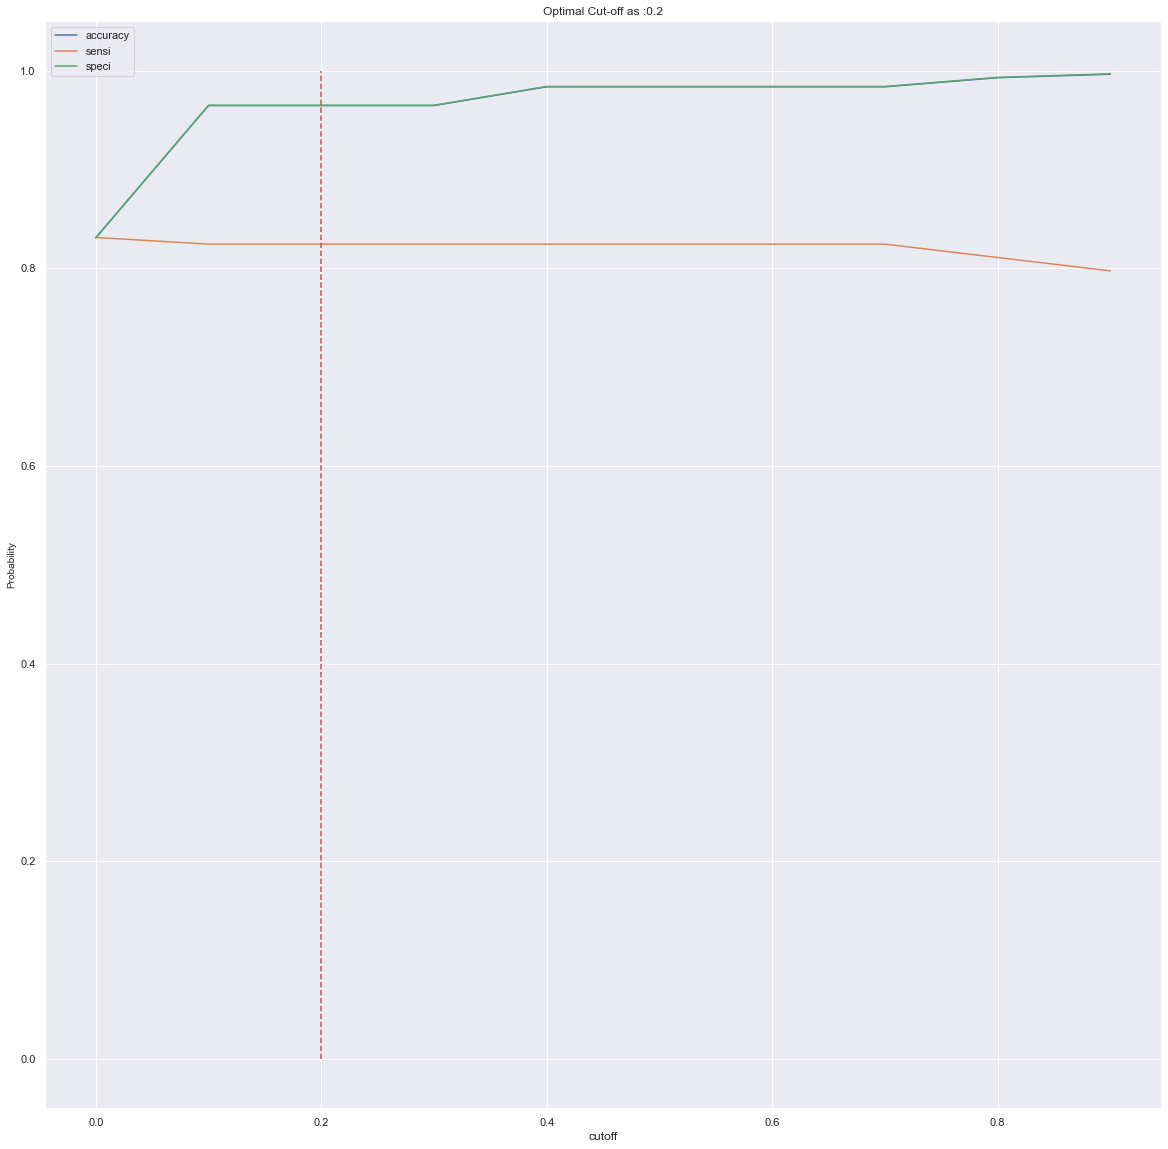

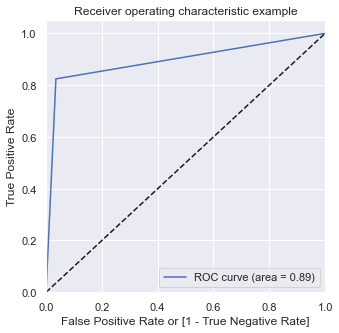





Misclassification Rate: 0.03543883056540618
Negative Predictive Power: 0.9648045020223929
Accuracy: 0.9645611694345938
Precision: 0.03905249679897567
Recall: 0.8243243243243243
Roc Auc Score: 0.8945644131733586




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000000          0    0    0    0    0    0    0    0   
165754       0     0.000000          0    0    0    0    0    0    0    0   
235285       0     0.000000          0    0    0    0    0    0    0    0   
101271       0     0.000000          0    0    0    0    0    0    0    0   
5832         0     0.000000          0    0    0    0    0    0    0    0   
253774       0     0.000000          0    0    0    0    0    0    0    0   
113630       0     0.000000          0    0    0    0    0    0    0    0   
230121       0     0.000000          0    0    0    0    0    0    0    0   
282997       0     0.000000  

In [156]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(dt_over_tune, cut_off_index = 0.2)

# Random Forest model with RandomOverSampler

In [157]:
#Define and build random forest model
from sklearn.ensemble import RandomForestClassifier
# Tune Hyperpaprameter using gridsearch cv
rf_class = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
from sklearn.model_selection import GridSearchCV
rf_over = GridSearchCV(estimator = rf_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [158]:
#train on oversampled dataset
rf_over.fit(X_over, y_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [159]:
#best score
rf_over.best_score_

0.9562657019395037

In [160]:
#best parameters 
rf_over.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [161]:
#predict on test dataset and evaluate
y_pred = rf_over.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9973666654962958
Recall/Sensitivity: 0.8243243243243243
Precision: 0.38006230529595014
Roc_Auc_score: 0.9109956225056758


In [162]:
# Apply random forest model using the best hyper parameter found using gridsearchcv
from sklearn.ensemble import RandomForestClassifier
rf_over_tune = RandomForestClassifier( criterion = 'gini', max_depth= 6,
                                  min_samples_leaf=1, min_samples_split=6,warm_start=True) 
rf_over_tune.fit(X_over, y_over)

RandomForestClassifier(max_depth=6, min_samples_split=6, warm_start=True)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.062179          0
165754       0     0.033891          0
235285       0     0.084294          0
101271       0     0.037695          0
5832         0     0.062535          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.062179          0    1    0    0    0    0    0    0   
165754       0     0.033891          0    1    0    0    0    0    0    0   
235285       0     0.084294          0    1    0    0    0    0    0    0   
101271       0     0.037695          0    1    0    0    0    0    0    0   
5832         0     0.062535          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

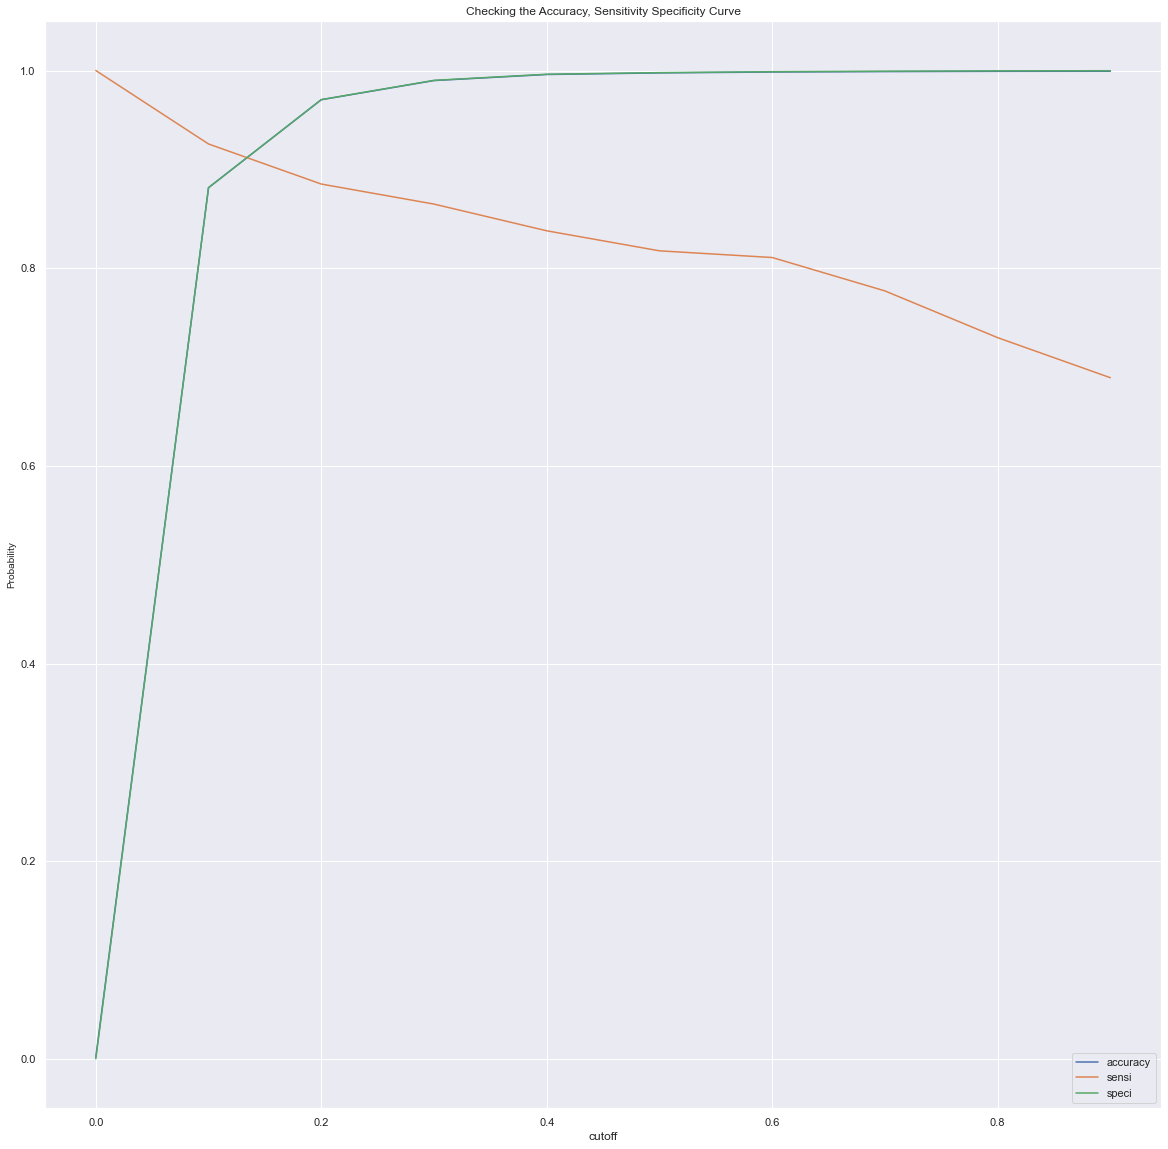

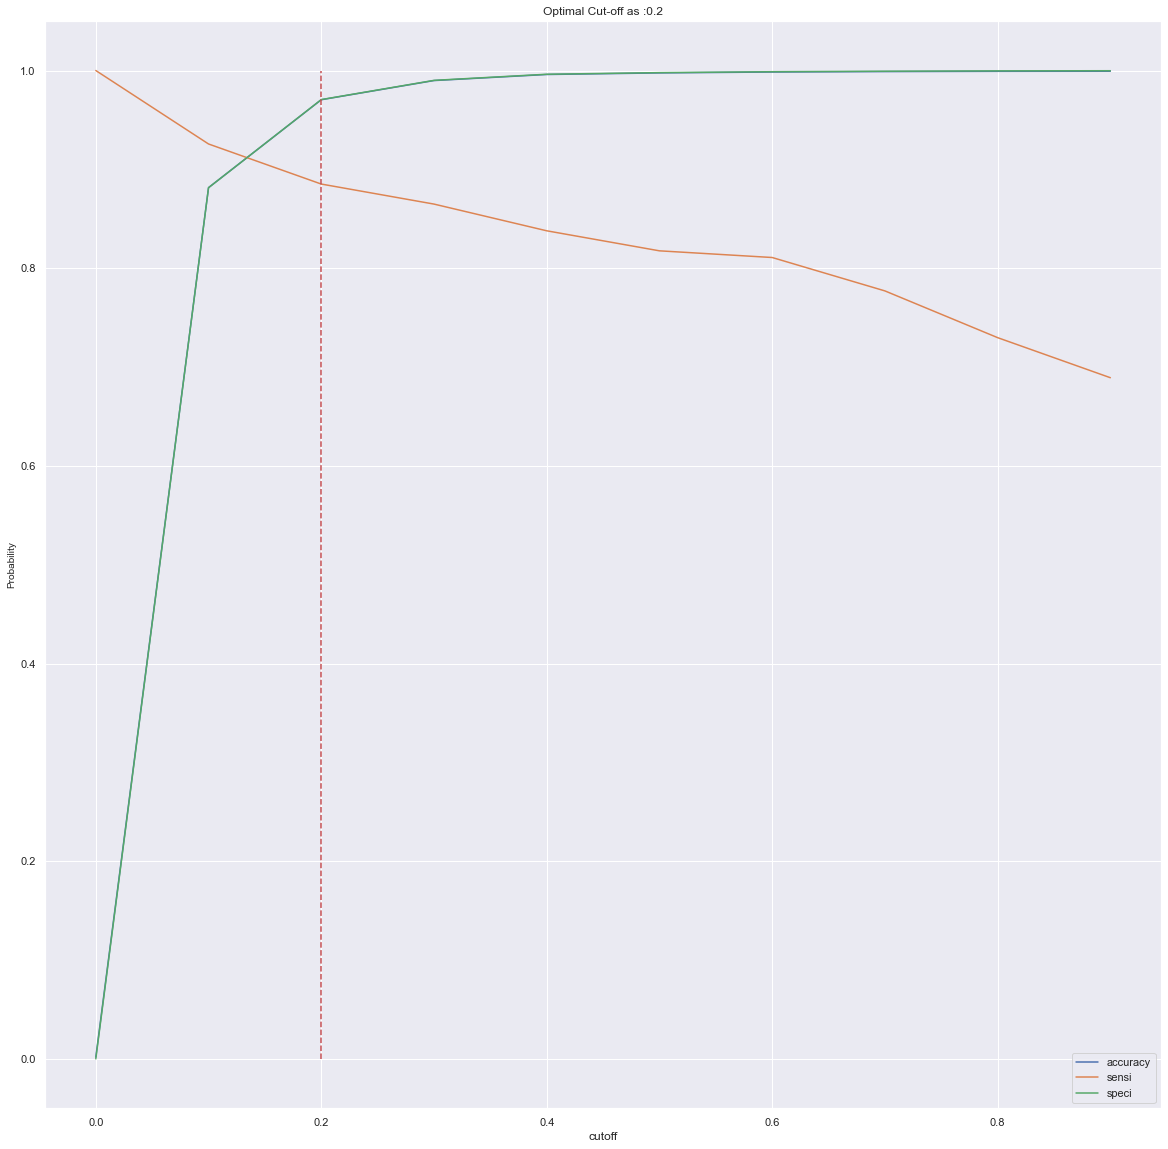

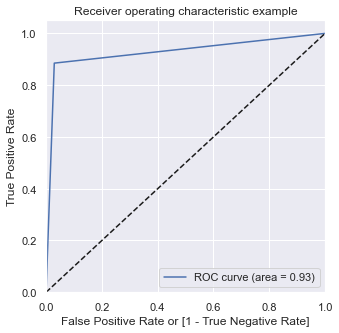





Misclassification Rate: 0.02956356869491942
Negative Predictive Power: 0.9705844422299079
Accuracy: 0.9704364313050806
Precision: 0.04962121212121212
Recall: 0.8851351351351351
Roc Auc Score: 0.9278597886825215




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.062179          0    1    0    0    0    0    0    0   
165754       0     0.033891          0    1    0    0    0    0    0    0   
235285       0     0.084294          0    1    0    0    0    0    0    0   
101271       0     0.037695          0    1    0    0    0    0    0    0   
5832         0     0.062535          0    1    0    0    0    0    0    0   
253774       0     0.027941          0    1    0    0    0    0    0    0   
113630       0     0.066712          0    1    0    0    0    0    0    0   
230121       0     0.031473          0    1    0    0    0    0    0    0   
282997       0     0.069968  

In [163]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(rf_over_tune, cut_off_index = 0.2)

# KNN using RandomOverSampler

In [164]:
#Define and build KNN Classifer model

model_knn = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
from sklearn.model_selection import GridSearchCV
knn_over = GridSearchCV(estimator = model_knn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_over.fit(X_over, y_over)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='recall',
             verbose=1)

In [165]:
#best parameters
knn_over.best_params_

{'n_neighbors': 3}

In [166]:
#best score
knn_over.best_score_

1.0

In [167]:
#predict on test dataset
y_pred = knn_over.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9992977774656788
Recall/Sensitivity: 0.7905405405405406
Precision: 0.8013698630136986
Roc_Auc_score: 0.8951002720288728


In [168]:
#Apply the best parameter and recheck the model 
knn_over_tune = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_over_tune.fit(X_over, y_over)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0          0.0          0
165754       0          0.0          0
235285       0          0.0          0
101271       0          0.0          0
5832         0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

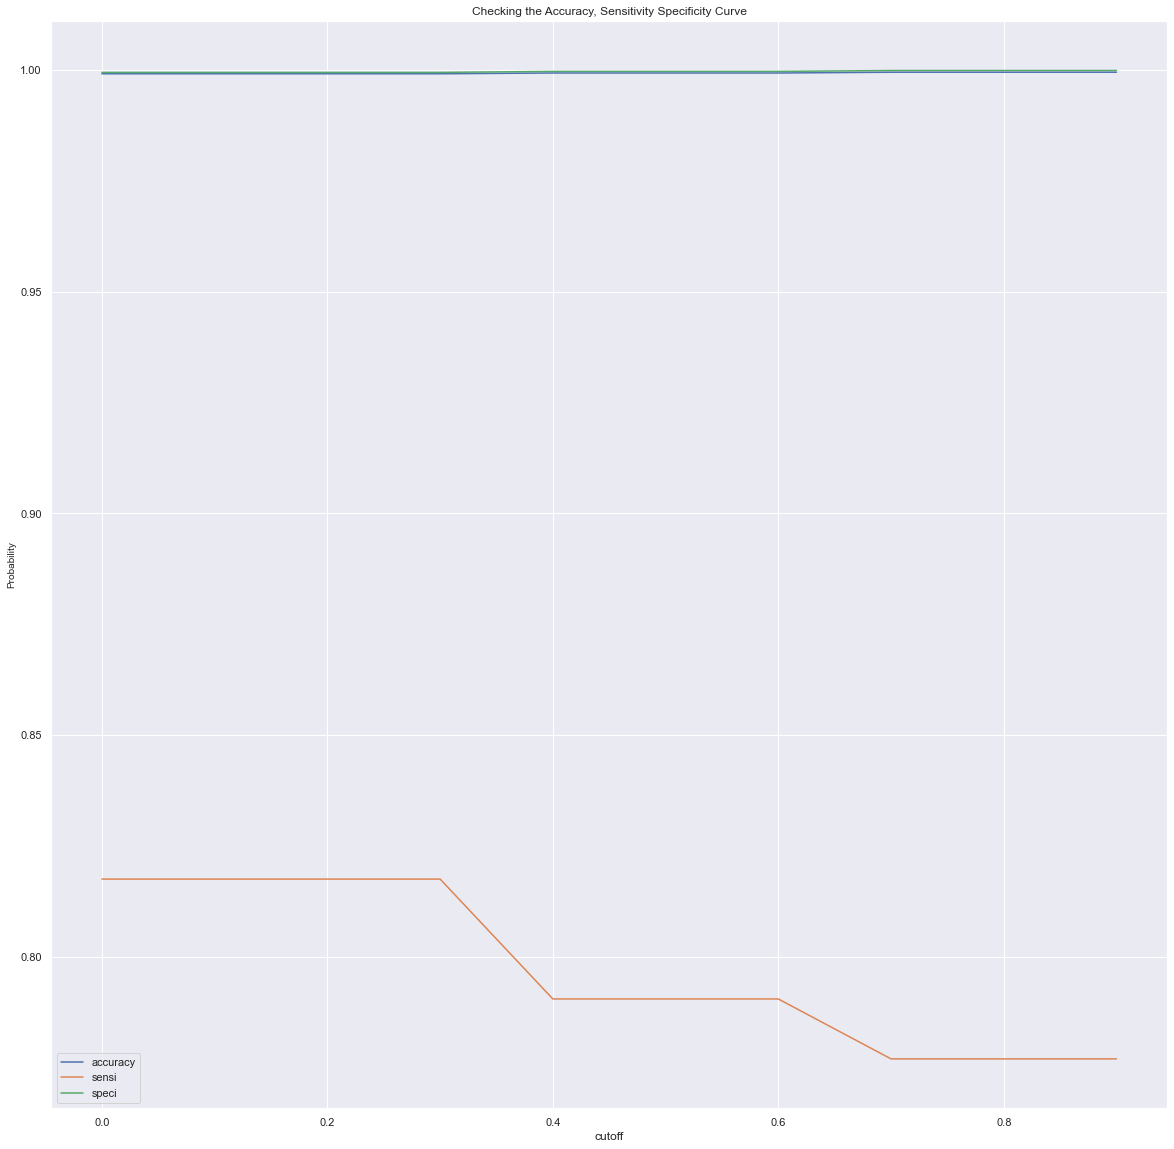

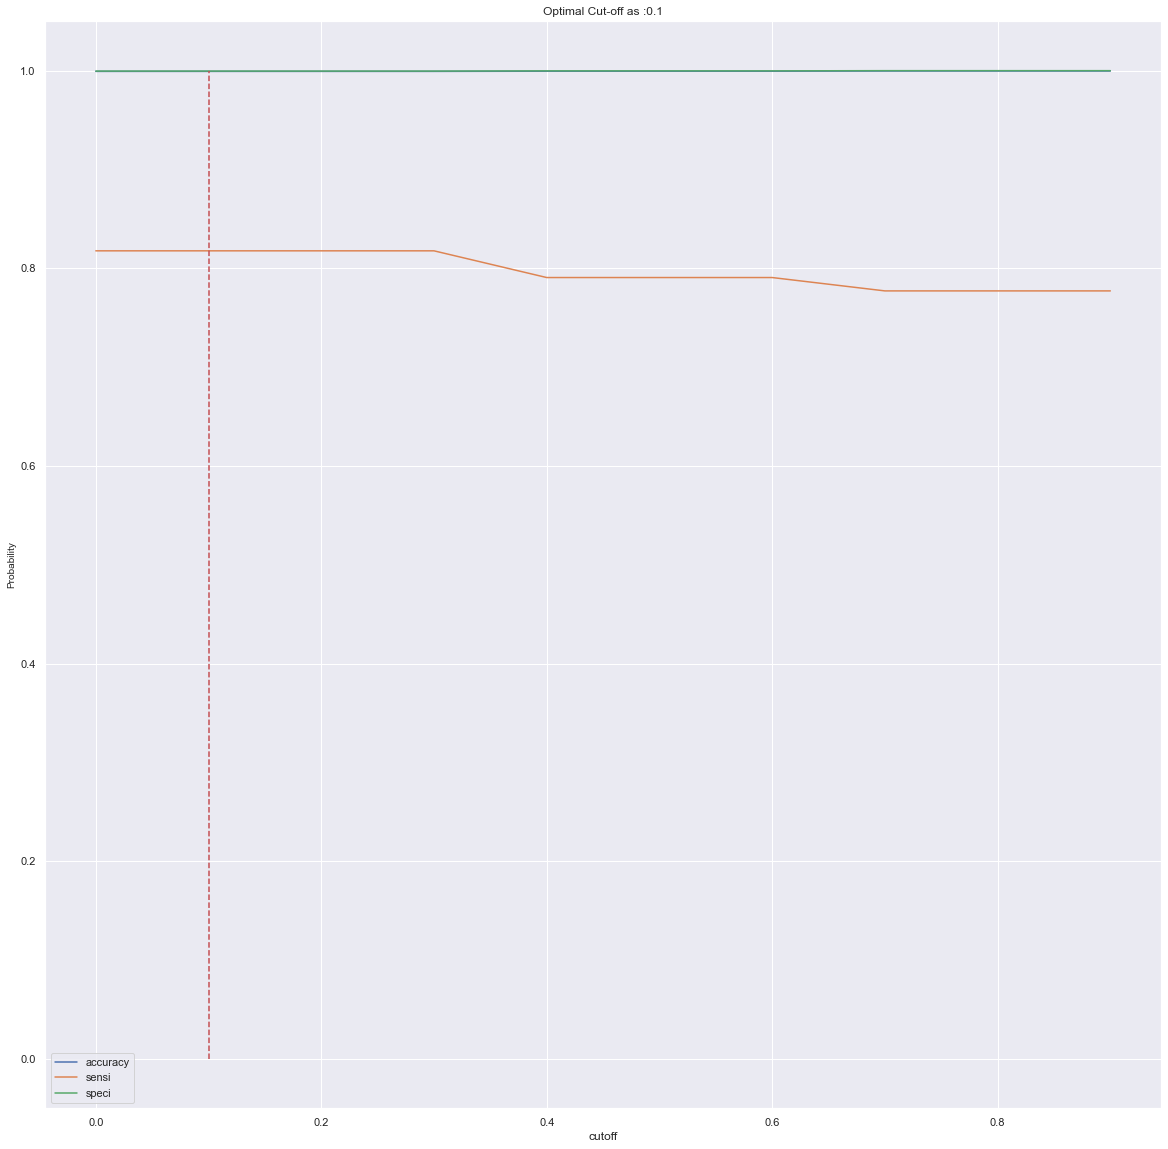

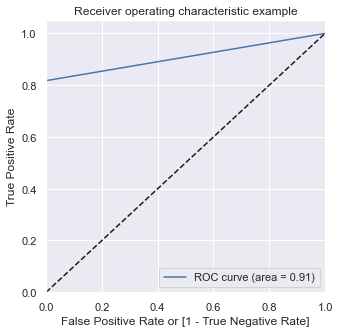





Misclassification Rate: 0.0008777781679014079
Negative Predictive Power: 0.999437247200891
Accuracy: 0.9991222218320986
Precision: 0.7159763313609467
Recall: 0.8175675675675675
Roc Auc Score: 0.9085024073842293




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   
253774       0          0.0          0    0    0    0    0    0    0    0   
113630       0          0.0          0    0    0    0    0    0    0    0   
230121       0          0.0          0    0    0    0    0    0    0    0   
282997       0          0.0  

In [169]:
#Call the function to print and plot confusion matrix and ROC AUC on the model
optimal_cutoff(knn_over_tune, cut_off_index = 0.1)

# XGBOOST using RandomOverSampler

In [170]:
#define xgboost model
# Find Hyperpaprameter using gridsearch cv

xgboost_md = XGBClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {"n_estimators": [50, 250, 450, 650]}
from sklearn.model_selection import GridSearchCV
xgboost_md1 = GridSearchCV(estimator = xgboost_md , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_md1.fit(X_over, y_over)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[16:47:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1, param_grid={'n_estimators': [50, 250, 450, 650]},
             scoring='recall', verbose=1)

In [171]:
#best parameters
xgboost_md1.best_params_

{'n_estimators': 50}

In [172]:
#best score
xgboost_md1.best_score_

1.0

In [173]:
#predict on test dataset and evaluate
y_pred = xgboost_md1.predict(X_test.values)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9994265182636377
Recall/Sensitivity: 0.7972972972972973
Precision: 0.8613138686131386
Roc_Auc_score: 0.8985372704904917


In [174]:
#Tune with best params
xgover_tune = XGBClassifier(randon_state=42,max_depth=5, n_estimators=50)
xgover_tune.fit(X_over, y_over)

[16:48:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "randon_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.000006          0
165754       0     0.000055          0
235285       0     0.003627          0
101271       0     0.000104          0
5832         0     0.000145          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000006          0    1    0    0    0    0    0    0   
165754       0     0.000055          0    1    0    0    0    0    0    0   
235285       0     0.003627          0    1    0    0    0    0    0    0   
101271       0     0.000104          0    1    0    0    0    0    0    0   
5832         0     0.000145          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

<Figure size 720x576 with 0 Axes>

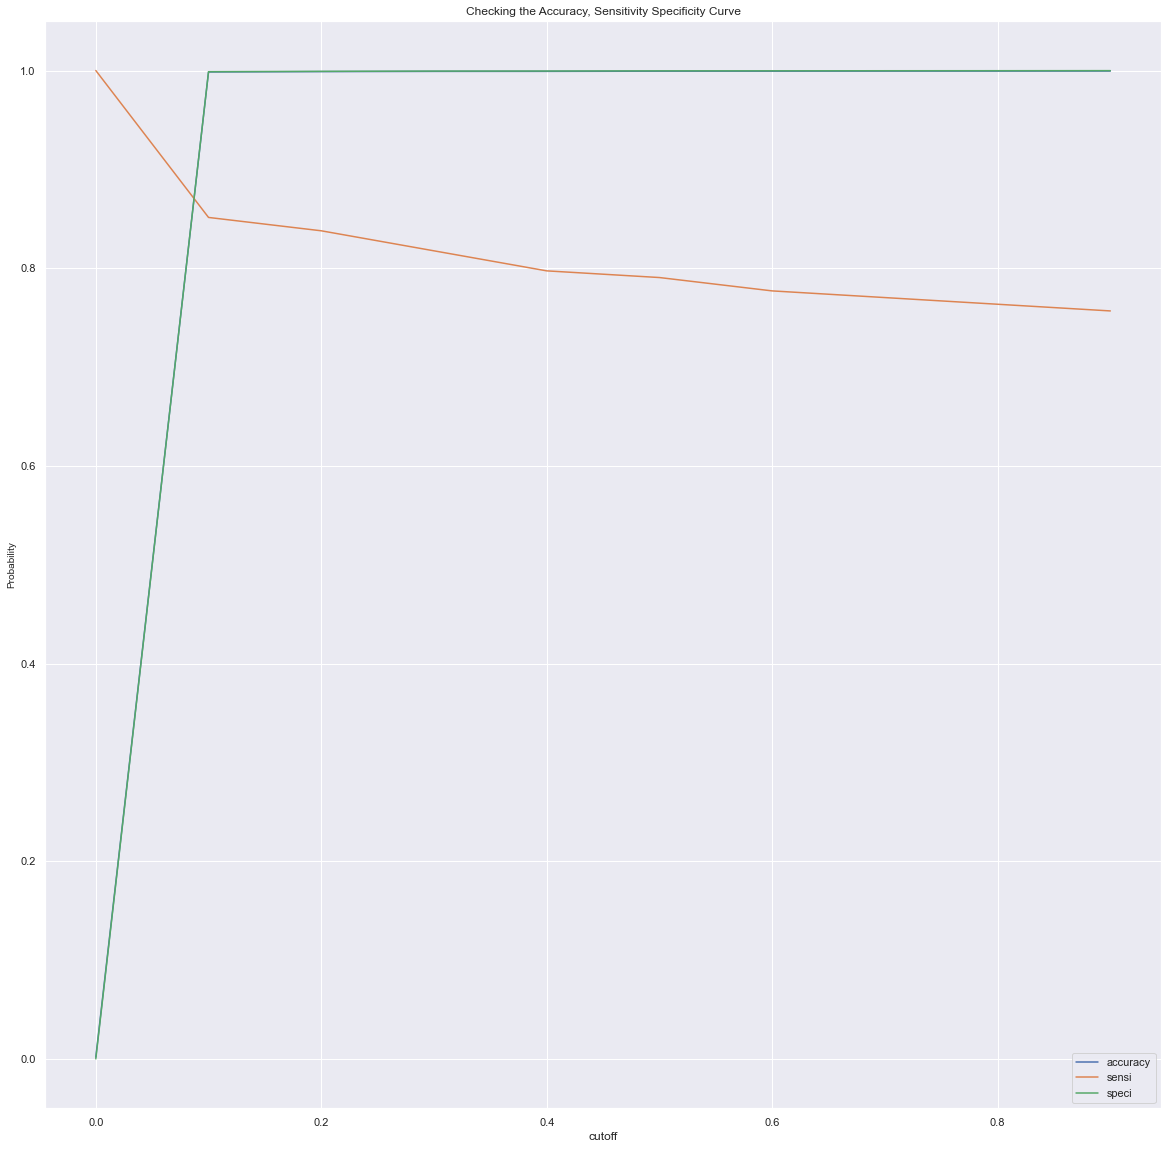

<Figure size 720x576 with 0 Axes>

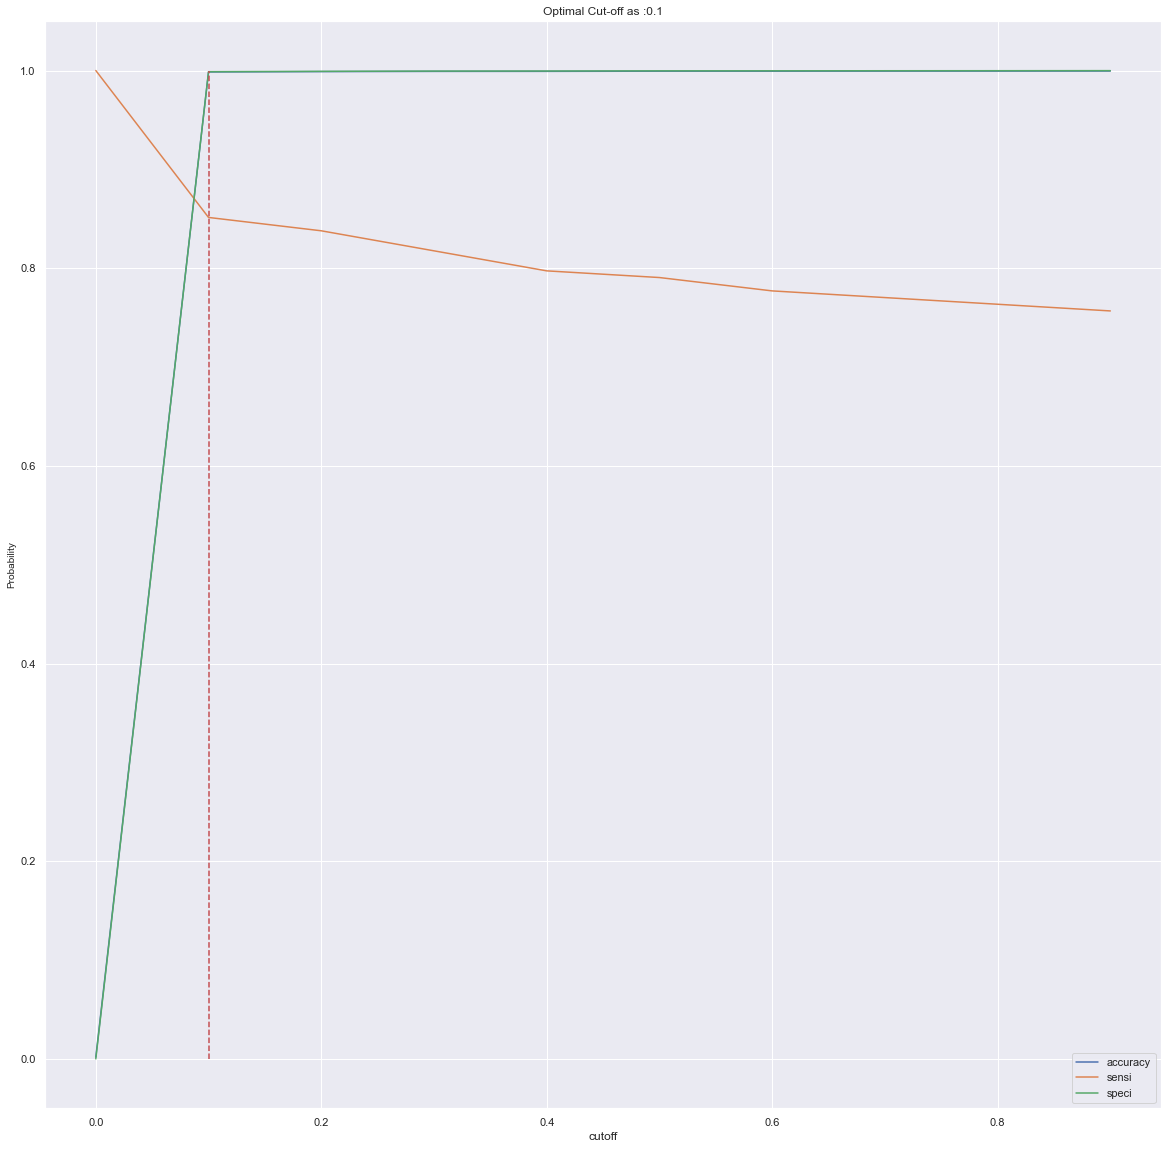

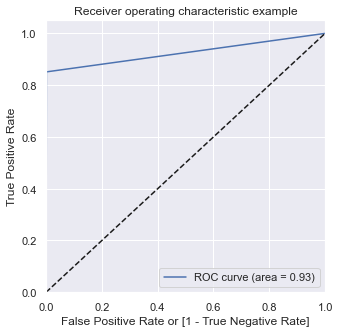





Misclassification Rate: 0.0014629636131690132
Negative Predictive Power: 0.9987924262852453
Accuracy: 0.998537036386831
Precision: 0.5502183406113537
Recall: 0.8513513513513513
Roc Auc Score: 0.9250718888182983




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000006          0    1    0    0    0    0    0    0   
165754       0     0.000055          0    1    0    0    0    0    0    0   
235285       0     0.003627          0    1    0    0    0    0    0    0   
101271       0     0.000104          0    1    0    0    0    0    0    0   
5832         0     0.000145          0    1    0    0    0    0    0    0   
253774       0     0.000038          0    1    0    0    0    0    0    0   
113630       0     0.000019          0    1    0    0    0    0    0    0   
230121       0     0.000078          0    1    0    0    0    0    0    0   
282997       0     0.000512  

In [175]:
#Call the function to print and plot confusion matrix and ROC AUC on the model
optimal_cutoff_xgboost(xgover_tune, cut_off_index = 0.1)

# Create models using SMOTE oversampling technique

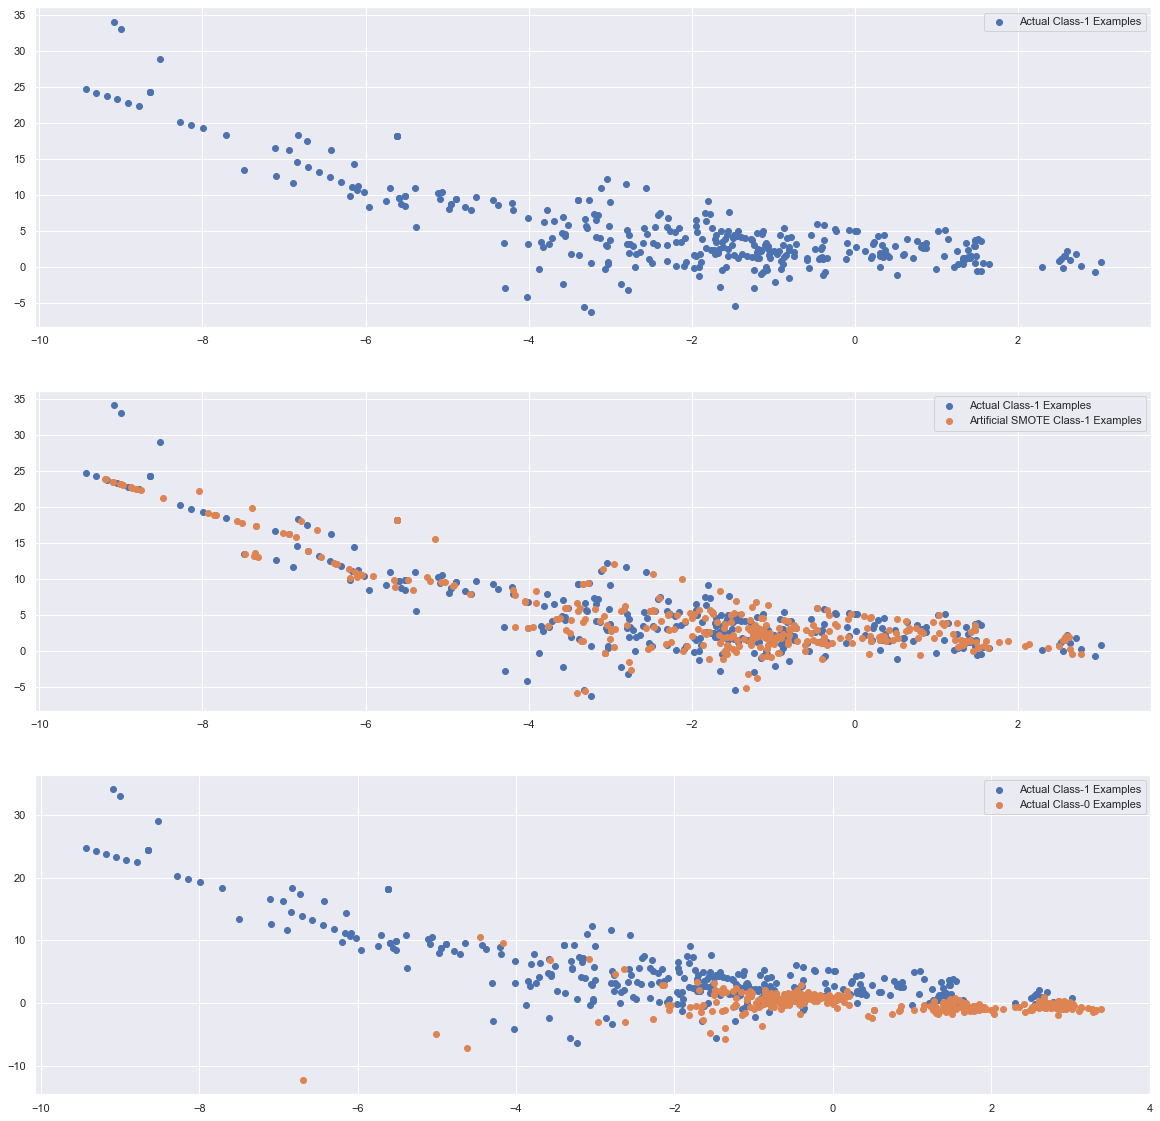

In [178]:
#Plot actual and synthesized data
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority',random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = X_smote, y_smote
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [179]:
print('After SMOTE, Class 0: {0}'.format(sum(y_smote == 0)))
print('After SMOTE, Class 1: {0}'.format(sum(y_smote == 1)))

After SMOTE, Class 0: 199020
After SMOTE, Class 1: 199020


# Logistic Regression using SMOTE

In [180]:
#Build Logistic regression on SMOTE dataset
#apply cross validation
#tune with gridsearchcv
logreg=LogisticRegression(random_state=42)
pipe = Pipeline([('logreg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'],
         'logreg__solver' : ['liblinear']}

lgmodel = GridSearchCV(estimator = pipe , cv = folds, param_grid = params, scoring  = 'recall')

In [181]:
#train on smote dataset
lgmodel.fit(X_smote, y_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 1, 2],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='recall')

In [182]:
#best parameters
lgmodel.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

In [183]:
#best score
lgmodel.best_score_

0.9366696814390514

In [184]:
#predict on test dataset
y_pred = lgmodel.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9746146553842913
Recall/Sensitivity: 0.8716216216216216
Precision: 0.05660377358490566
Roc_Auc_score: 0.9232074929140993


In [185]:
#Logistic regression with best hyperparamter on SMOTE data
logreg = LogisticRegression(random_state=42, C=1 , penalty='l2', solver = 'liblinear')
logreg.fit(X_smote, y_smote)

LogisticRegression(C=1, random_state=42, solver='liblinear')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.001227          0
165754       0     0.083803          0
235285       0     0.098117          0
101271       0     0.030545          0
5832         0     0.057247          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.001227          0    1    0    0    0    0    0    0   
165754       0     0.083803          0    1    0    0    0    0    0    0   
235285       0     0.098117          0    1    0    0    0    0    0    0   
101271       0     0.030545          0    1    0    0    0    0    0    0   
5832         0     0.057247          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

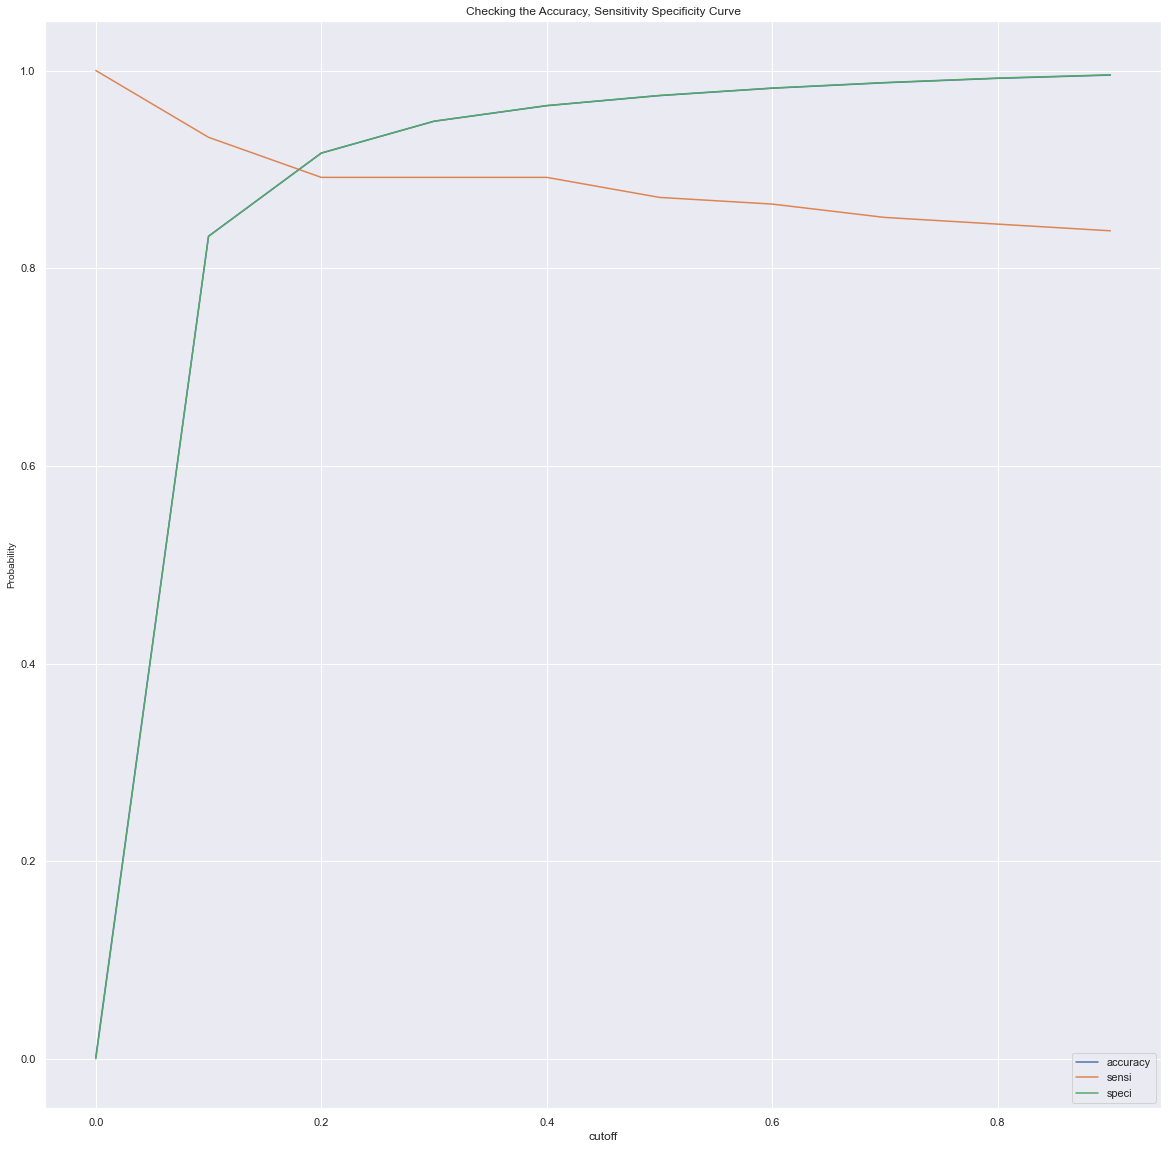

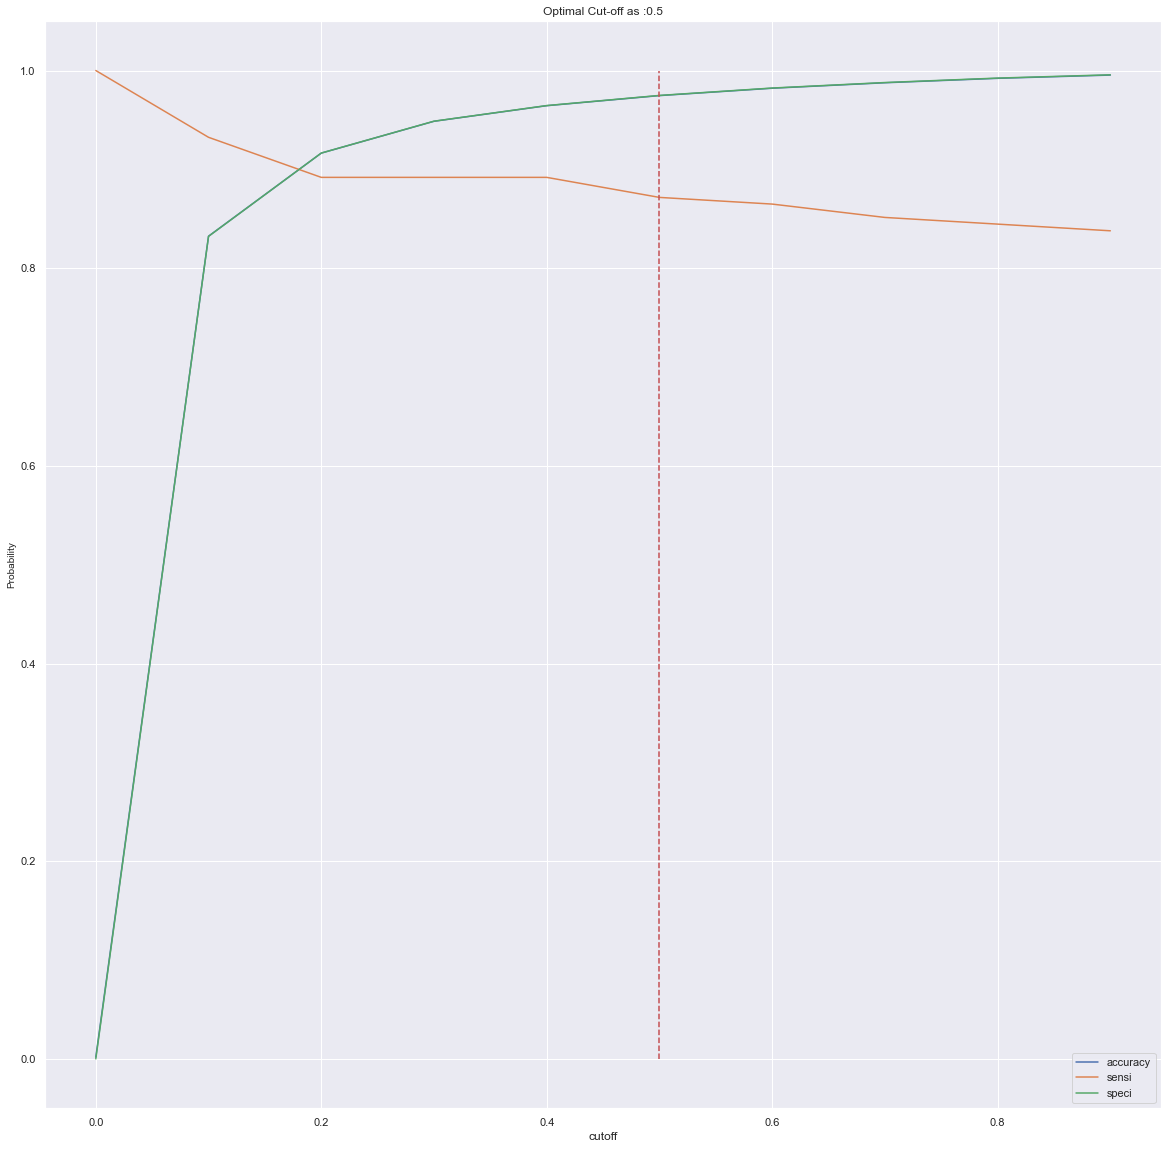

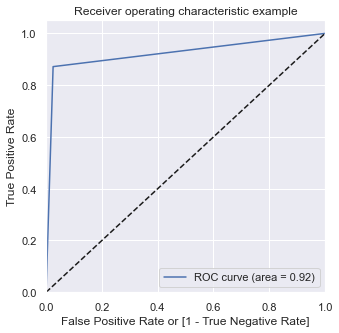





Misclassification Rate: 0.025385344615708717
Negative Predictive Power: 0.9747933642065771
Accuracy: 0.9746146553842913
Precision: 0.05660377358490566
Recall: 0.8716216216216216
Roc Auc Score: 0.9232074929140993




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.001227          0    1    0    0    0    0    0    0   
165754       0     0.083803          0    1    0    0    0    0    0    0   
235285       0     0.098117          0    1    0    0    0    0    0    0   
101271       0     0.030545          0    1    0    0    0    0    0    0   
5832         0     0.057247          0    1    0    0    0    0    0    0   
253774       0     0.001324          0    1    0    0    0    0    0    0   
113630       0     0.154405          0    1    1    0    0    0    0    0   
230121       0     0.010315          0    1    0    0    0    0    0    0   
282997       0     0.004853 

In [187]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(logreg, cut_off_index = 0.5)

# Random Forest using SMOTE

In [188]:
#define decisionTreeClassifier model 
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_smote, y_smote)
y_pred = dt_model1.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9972964432428637
Recall/Sensitivity: 0.7432432432432432
Precision: 0.36303630363036304
Roc_Auc_score: 0.8704902540150796


In [189]:
dt_class = DecisionTreeClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
dtmodel_2 = GridSearchCV(estimator = dt_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [191]:
dtmodel_2.fit(X_smote, y_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [192]:
#best parameters
dtmodel_2.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [193]:
#best score
dtmodel_2.best_score_

0.9571299366897799

In [194]:
#predict on test dataset
y_pred = dtmodel_2.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9789216202614609
Recall/Sensitivity: 0.8175675675675675
Precision: 0.06385224274406333
Roc_Auc_score: 0.8983845810169159


In [197]:
# Apply decision tree  model using the best hyper parameter found using gridsearchcv

dt_smote_tune =  DecisionTreeClassifier( criterion = 'gini', max_depth= 6,
                                  min_samples_leaf=1, min_samples_split=6) 
dt_smote_tune.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=6, min_samples_split=6)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.000265          0
165754       0     0.008260          0
235285       0     0.047263          0
101271       0     0.008260          0
5832         0     0.047263          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000265          0    1    0    0    0    0    0    0   
165754       0     0.008260          0    1    0    0    0    0    0    0   
235285       0     0.047263          0    1    0    0    0    0    0    0   
101271       0     0.008260          0    1    0    0    0    0    0    0   
5832         0     0.047263          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

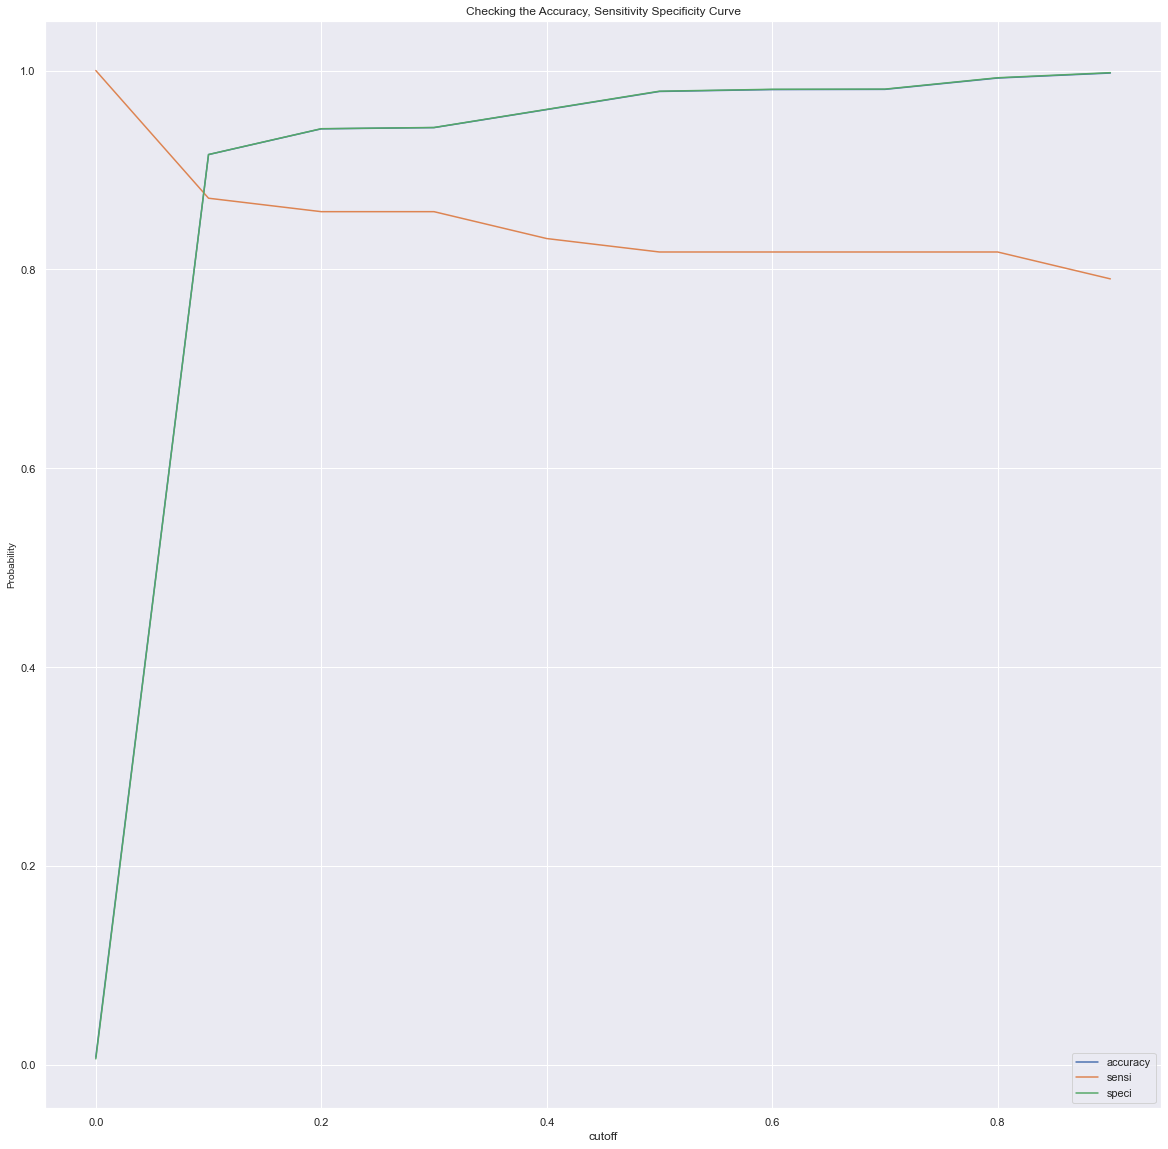

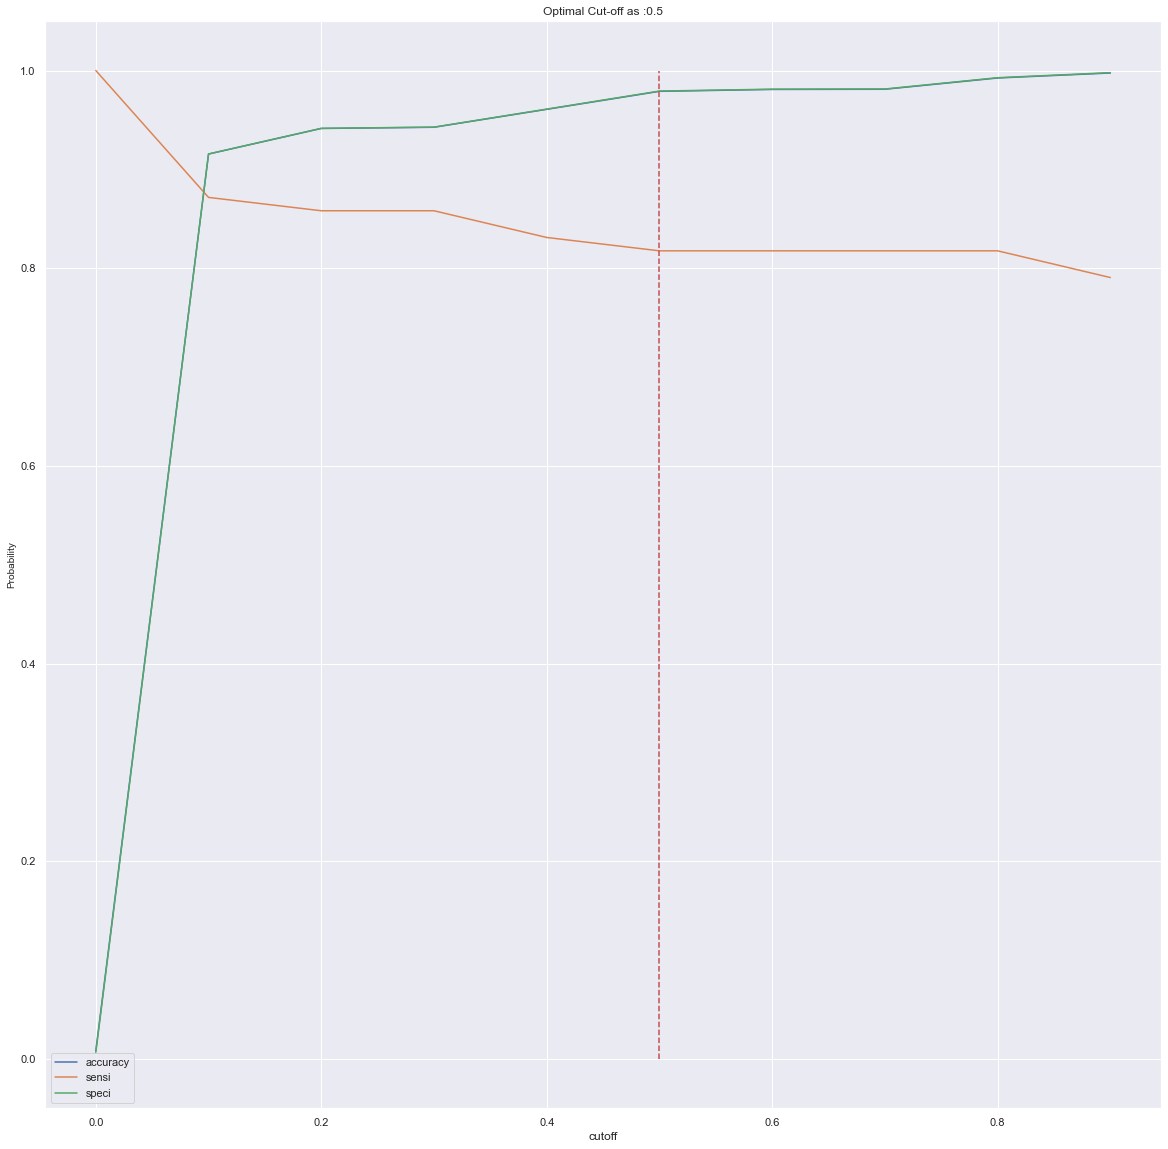

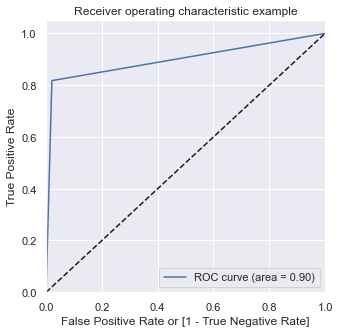





Misclassification Rate: 0.02106667602963379
Negative Predictive Power: 0.9792133184829123
Accuracy: 0.9789333239703663
Precision: 0.06388595564941922
Recall: 0.8175675675675675
Roc Auc Score: 0.8983904430252398




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.000265          0    1    0    0    0    0    0    0   
165754       0     0.008260          0    1    0    0    0    0    0    0   
235285       0     0.047263          0    1    0    0    0    0    0    0   
101271       0     0.008260          0    1    0    0    0    0    0    0   
5832         0     0.047263          0    1    0    0    0    0    0    0   
253774       0     0.000265          0    1    0    0    0    0    0    0   
113630       0     0.047263          0    1    0    0    0    0    0    0   
230121       0     0.030862          0    1    0    0    0    0    0    0   
282997       0     0.015963  

In [199]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(dt_smote_tune, cut_off_index = 0.5)

# Random Forest using SMOTE

In [200]:
#Define and build random forest model
# Tune Hyperpaprameter using gridsearch cv
#apply cross validation

rf_class = RandomForestClassifier(random_state=42,warm_start=True)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [4,6],
          'min_samples_split' : [6, 10]
          }
from sklearn.model_selection import GridSearchCV
rf_smote = GridSearchCV(estimator = rf_class , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [201]:
#train on smote dataset
rf_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [6, 10]},
             scoring='recall', verbose=1)

In [202]:
#best score
rf_smote.best_score_

0.9267912772585671

In [203]:
#best parameters
rf_smote.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6}

In [204]:
#predict on test dataset and evaluate
y_pred = rf_smote.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9961728871879498
Recall/Sensitivity: 0.8378378378378378
Precision: 0.2903981264637002
Roc_Auc_score: 0.9171427303967311


In [206]:
# Apply random forest model using the best hyper parameter found using gridsearchcv
rf_smote_tune = RandomForestClassifier( class_weight = {0 : 1, 1:5} , criterion = 'entropy', max_depth= 6,
                                  min_samples_split=6, min_samples_leaf = 10 )
rf_smote_tune.fit(X_smote, y_smote)

RandomForestClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, min_samples_split=6)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.162208          0
165754       0     0.240095          0
235285       0     0.356324          0
101271       0     0.281190          0
5832         0     0.257717          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.162208          0    1    1    0    0    0    0    0   
165754       0     0.240095          0    1    1    1    0    0    0    0   
235285       0     0.356324          0    1    1    1    1    0    0    0   
101271       0     0.281190          0    1    1    1    0    0    0    0   
5832         0     0.257717          0    1    1    1    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

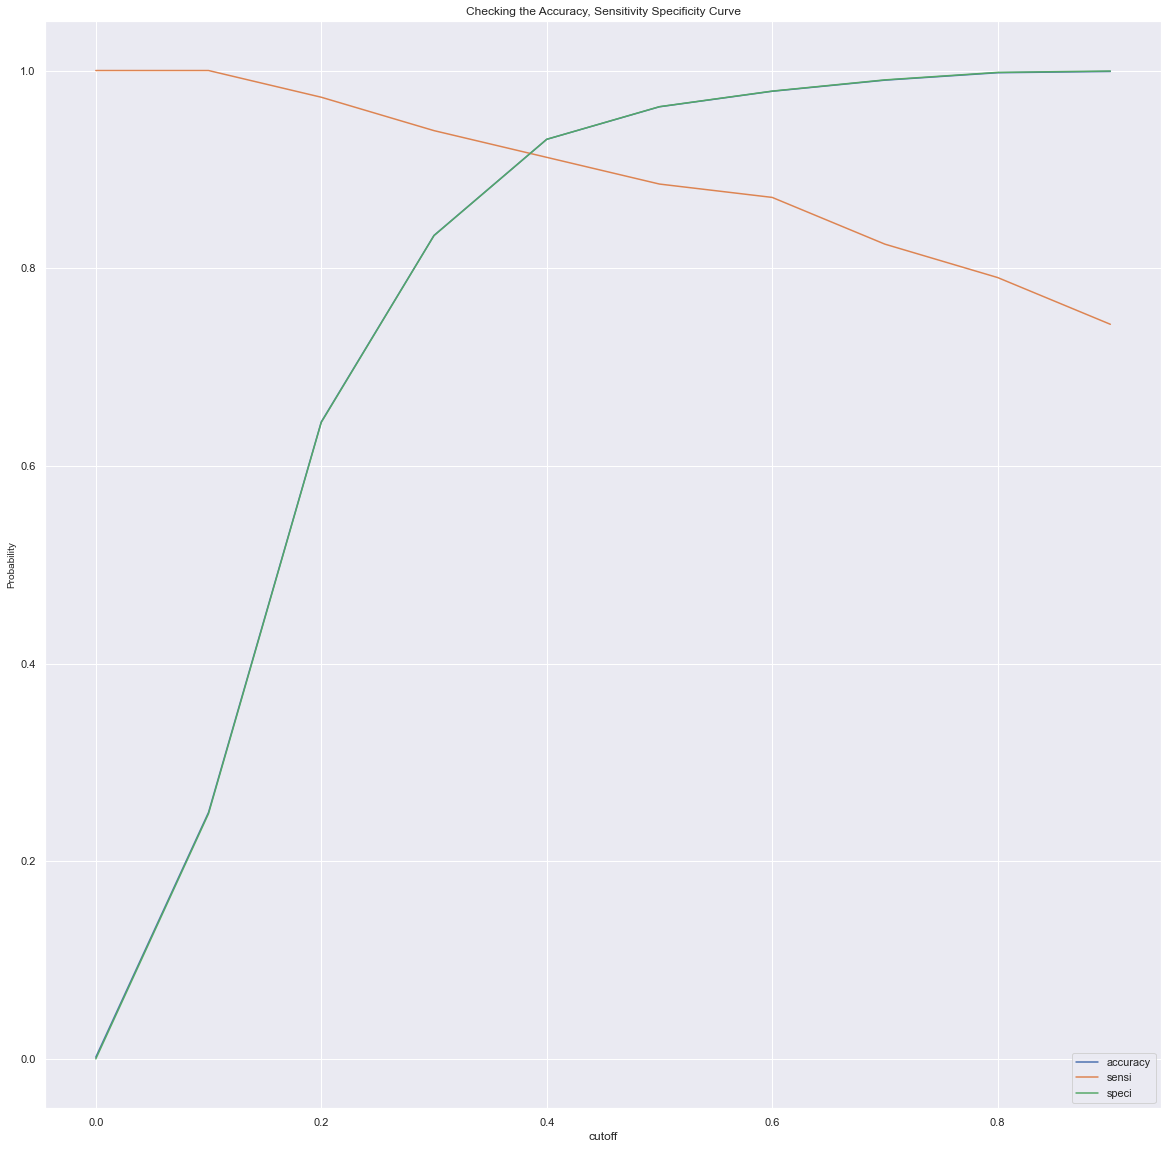

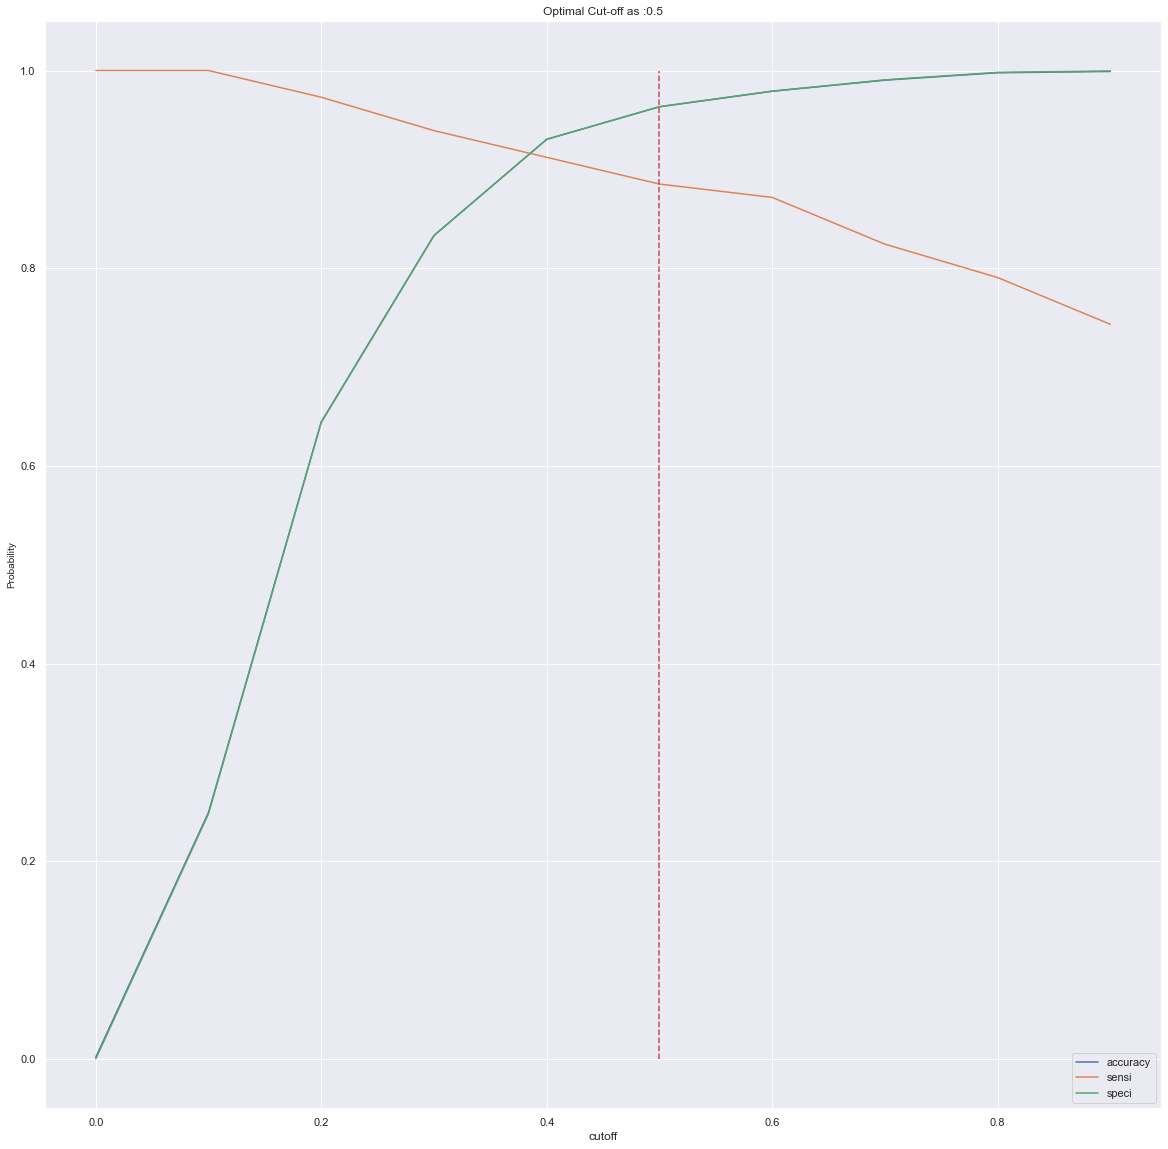

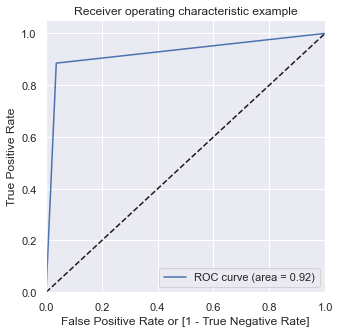





Misclassification Rate: 0.036702831127184206
Negative Predictive Power: 0.9634327920745648
Accuracy: 0.9632971688728158
Precision: 0.04030769230769231
Recall: 0.8851351351351351
Roc Auc Score: 0.92428396360485




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.162208          0    1    1    0    0    0    0    0   
165754       0     0.240095          0    1    1    1    0    0    0    0   
235285       0     0.356324          0    1    1    1    1    0    0    0   
101271       0     0.281190          0    1    1    1    0    0    0    0   
5832         0     0.257717          0    1    1    1    0    0    0    0   
253774       0     0.037095          0    1    0    0    0    0    0    0   
113630       0     0.285350          0    1    1    1    0    0    0    0   
230121       0     0.146782          0    1    1    0    0    0    0    0   
282997       0     0.147624   

In [207]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(rf_smote_tune, cut_off_index = 0.5)

# KNN using SMOTE

In [208]:
#Define and build KNN Classifer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
model_knn = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
from sklearn.model_selection import GridSearchCV
knn_smote = GridSearchCV(estimator = model_knn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
knn_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='recall',
             verbose=1)

In [209]:
#best parameters
knn_smote.best_params_

{'n_neighbors': 3}

In [210]:
#predict on test dataset and evaluate
y_pred = knn_smote.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9987008883115059
Recall/Sensitivity: 0.8175675675675675
Precision: 0.5902439024390244
Roc_Auc_score: 0.9082913750845635


In [211]:
#Tune model using best paramter
knn_smote_tune = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
knn_smote_tune.fit(X_smote, y_smote)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0          0.0          0
165754       0          0.0          0
235285       0          0.0          0
101271       0          0.0          0
5832         0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

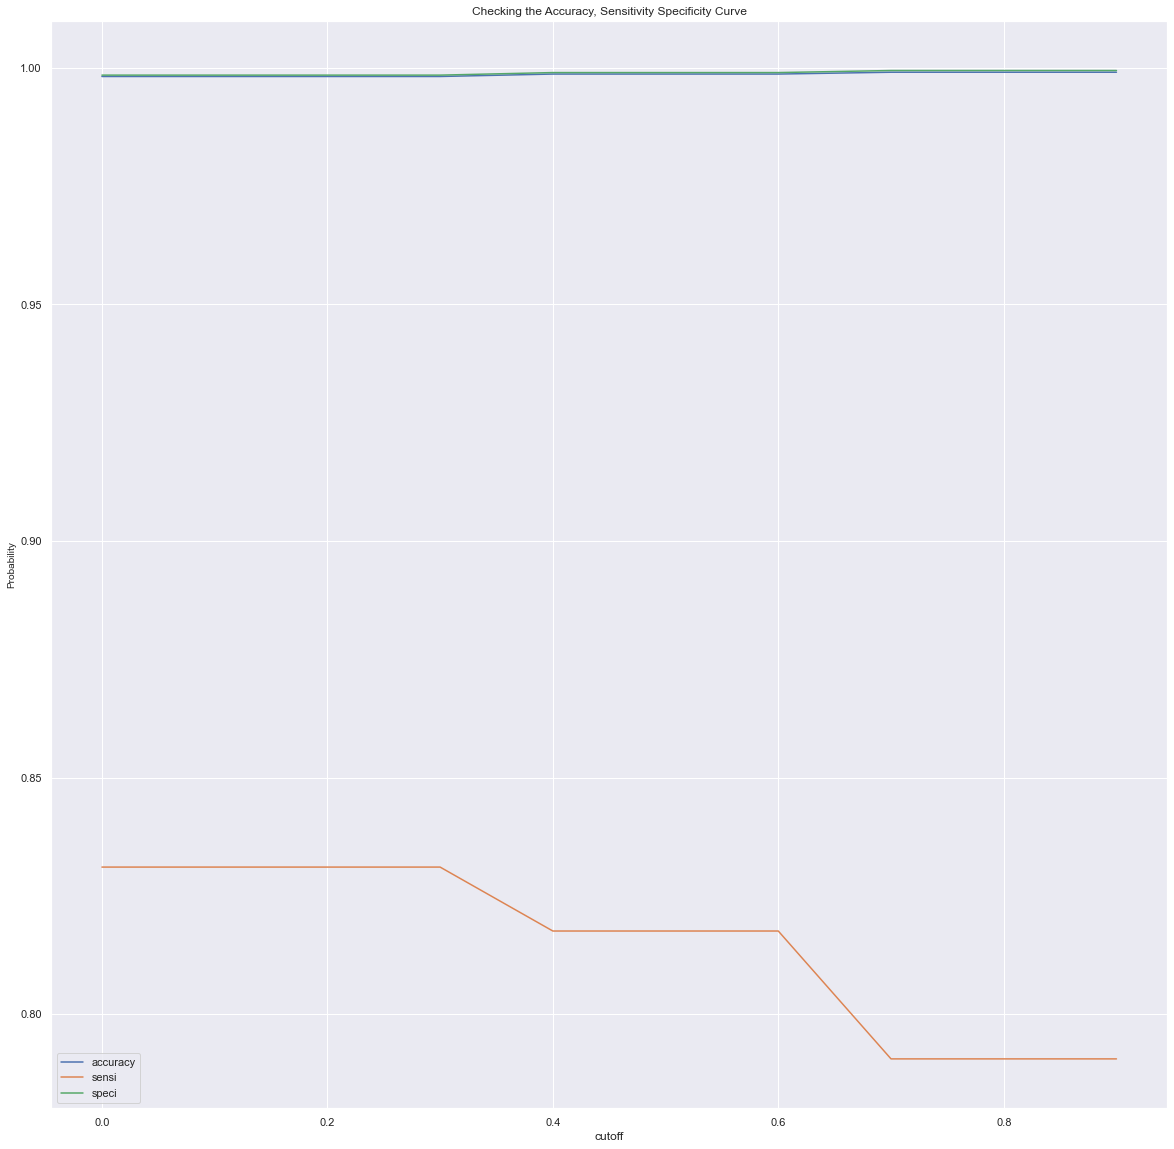

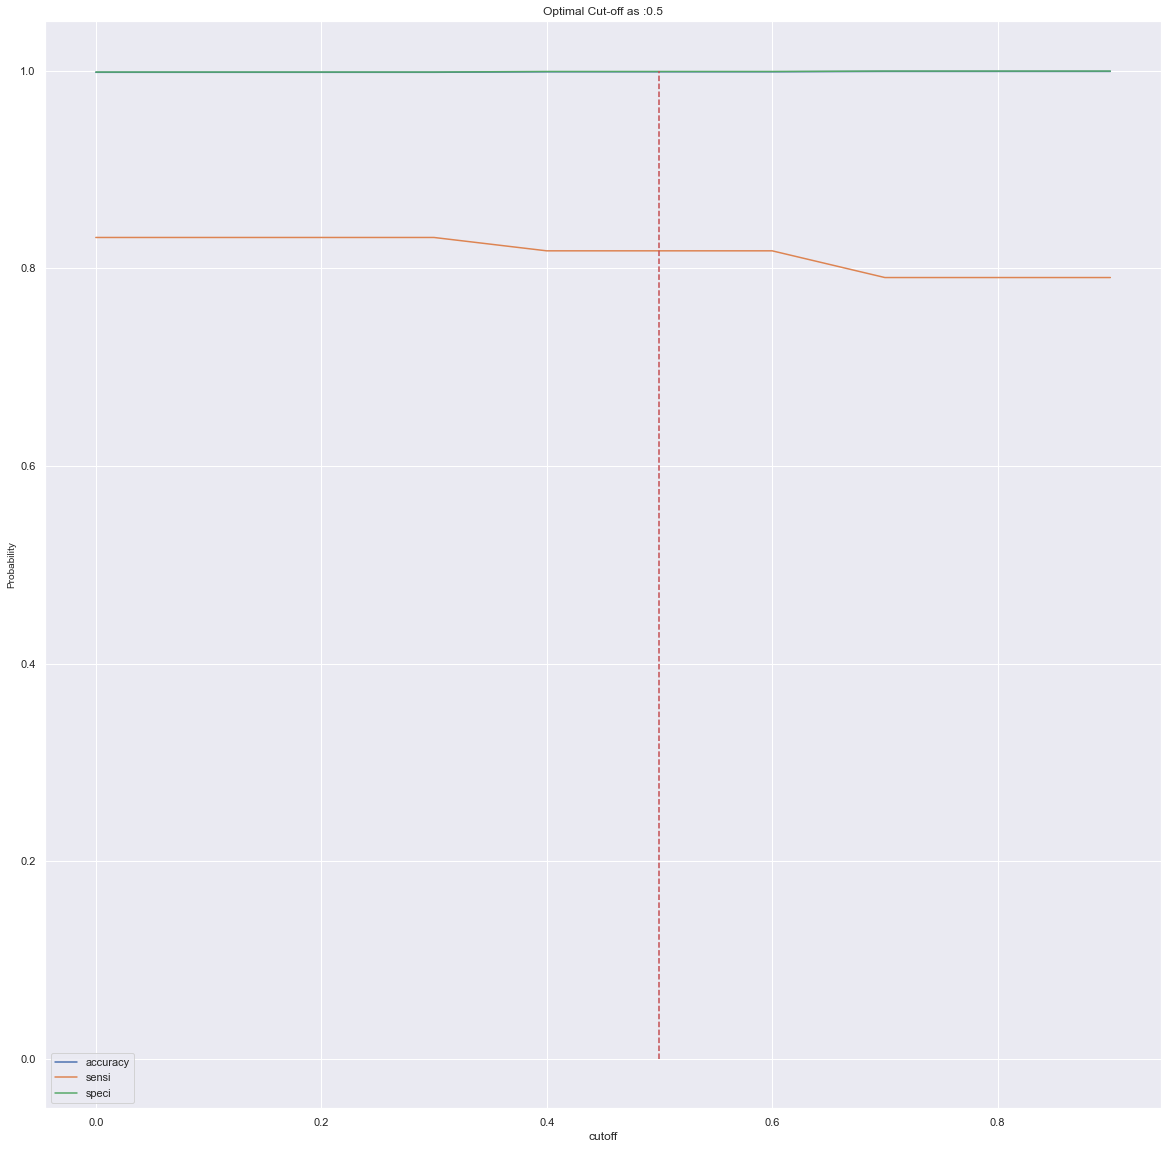

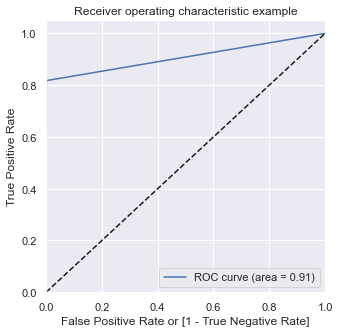





Misclassification Rate: 0.0012991116884940837
Negative Predictive Power: 0.9990151826015593
Accuracy: 0.9987008883115059
Precision: 0.5902439024390244
Recall: 0.8175675675675675
Roc Auc Score: 0.9082913750845635




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   
253774       0          0.0          0    0    0    0    0    0    0    0   
113630       0          0.0          0    0    0    0    0    0    0    0   
230121       0          0.0          0    0    0    0    0    0    0    0   
282997       0          0.0 

In [212]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(knn_smote_tune, cut_off_index = 0.5)

# XGBoost using SMOTE

In [213]:
# Find Hyperpaprameter using gridsearch cv
#define xgboost model
#apply cross validation

xgboost_smote = XGBClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {"n_estimators": [50, 250, 450, 650]}
from sklearn.model_selection import GridSearchCV
xgboost_smote1 = GridSearchCV(estimator = xgboost_smote , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_smote1.fit(X_smote, y_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[19:15:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1, param_grid={'n_estimators': [50, 250, 450, 650]},
             scoring='recall', verbose=1)

In [214]:
#best parameters
xgboost_smote1.best_params_

{'n_estimators': 250}

In [215]:
#predict on test dataset
y_pred = xgboost_smote1.predict(X_test.values)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9994265182636377
Recall/Sensitivity: 0.831081081081081
Precision: 0.8367346938775511
Roc_Auc_score: 0.9153998523407633


In [216]:
#Tune model with best params found for XgBoost
xgsmote_tune = XGBClassifier(random_state=42,max_depth=5, n_estimators=250)
xgsmote_tune.fit(X_smote, y_smote)
y_pred = xgsmote_tune.predict(X_test.values)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

[19:18:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9993914071369217
Recall/Sensitivity: 0.8243243243243243
Precision: 0.8243243243243243
Roc_Auc_score: 0.9120097499457368


Using the default Threshold Cutoff as 0.5
        Actual   Probability  Predicted
186882       0  5.258742e-10          0
165754       0  1.770243e-09          0
235285       0  4.748250e-05          0
101271       0  7.467882e-06          0
5832         0  2.950972e-05          0




Probability at Different Thereshold
        Actual   Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0  5.258742e-10          0    1    0    0    0    0    0    0   
165754       0  1.770243e-09          0    1    0    0    0    0    0    0   
235285       0  4.748250e-05          0    1    0    0    0    0    0    0   
101271       0  7.467882e-06          0    1    0    0    0    0    0    0   
5832         0  2.950972e-05          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for differ

<Figure size 720x576 with 0 Axes>

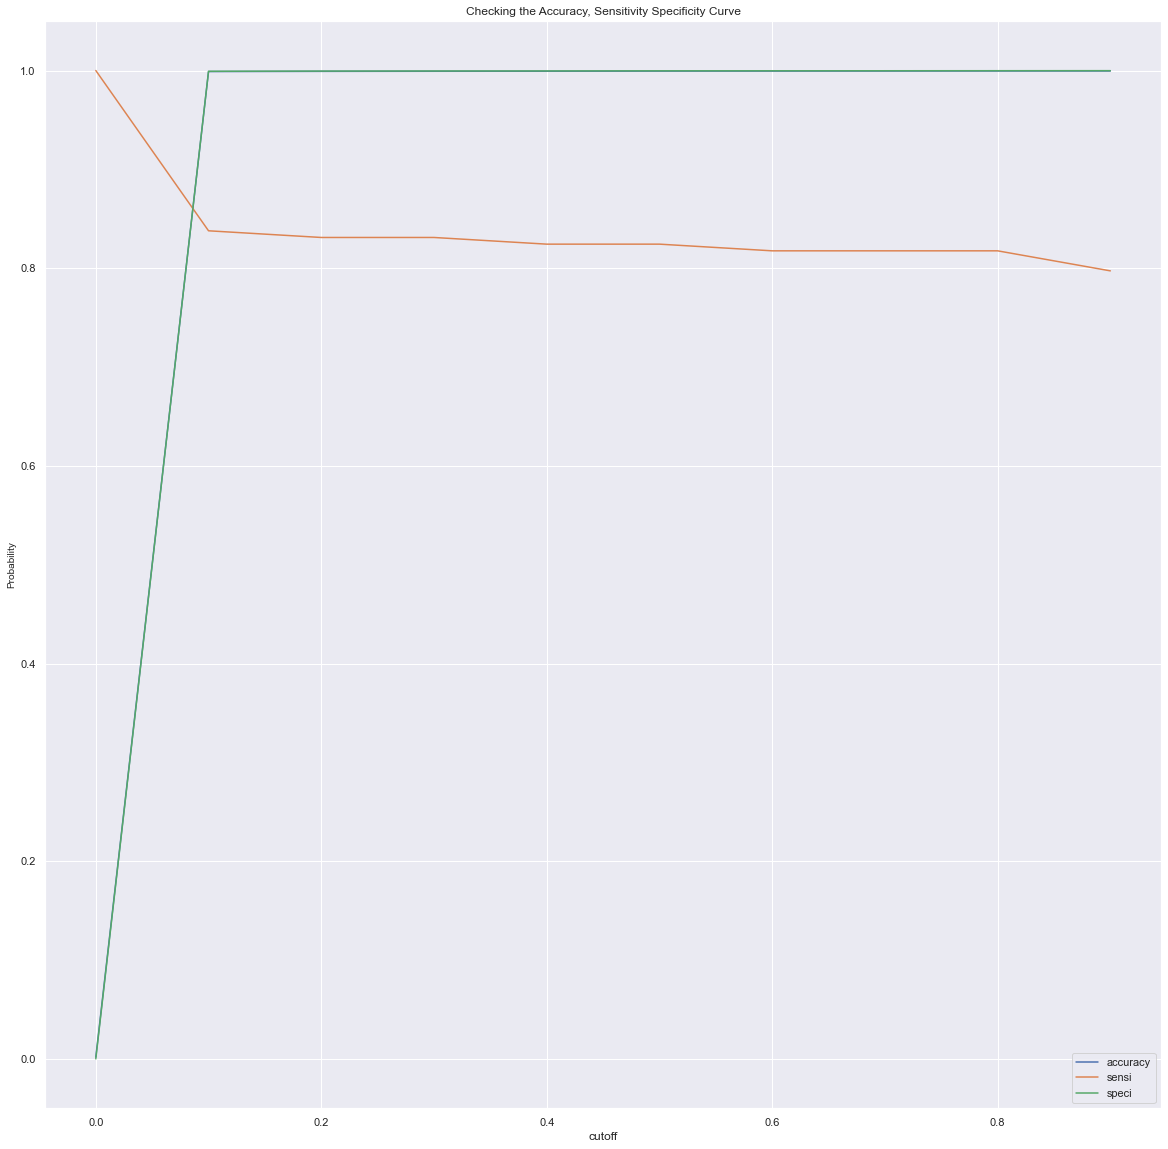

<Figure size 720x576 with 0 Axes>

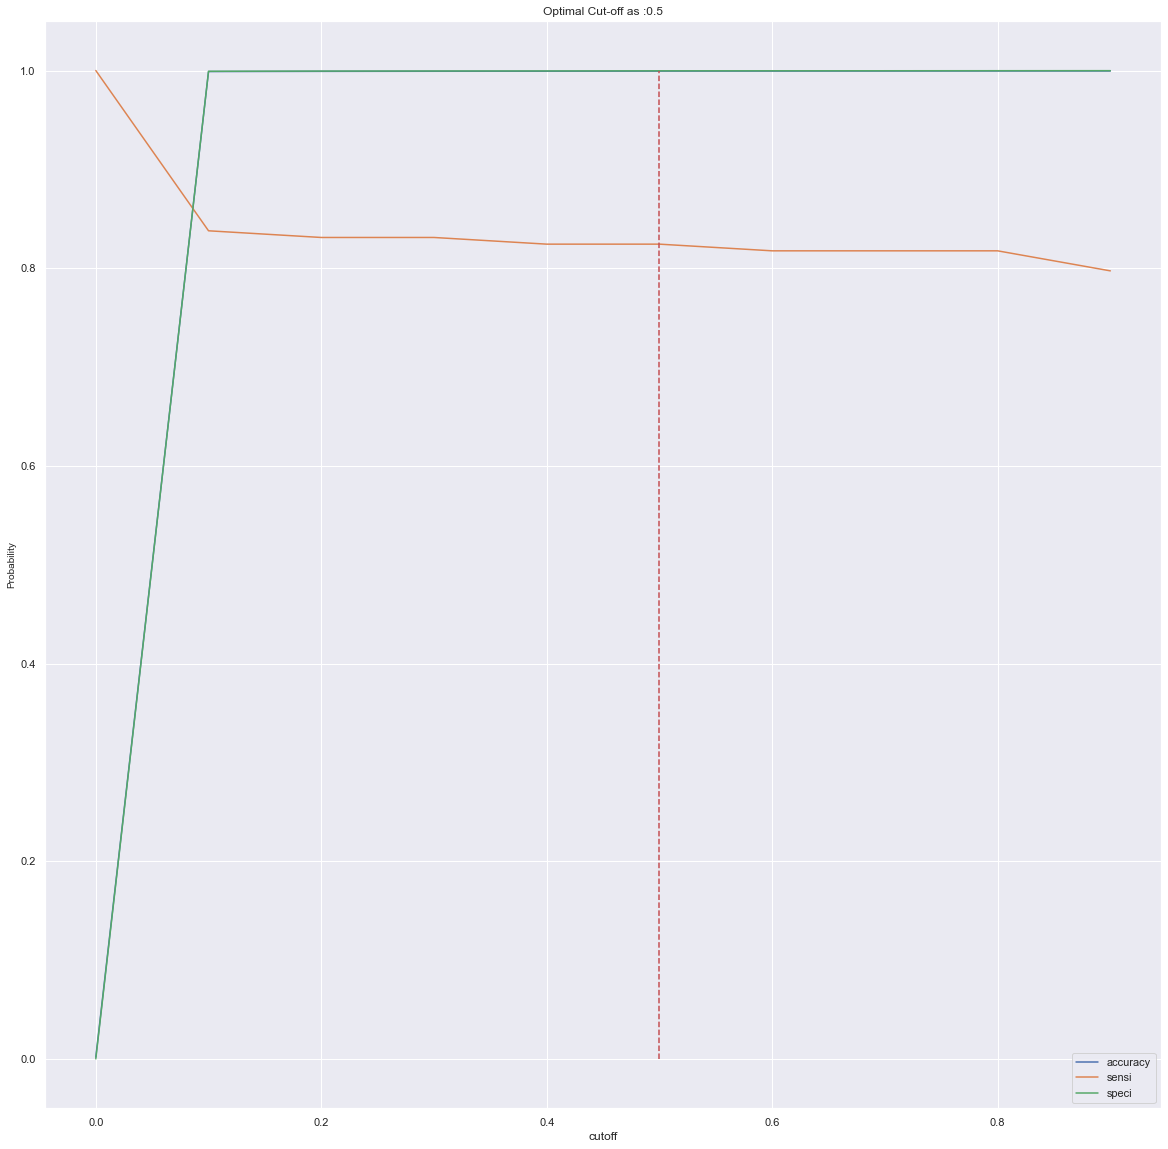

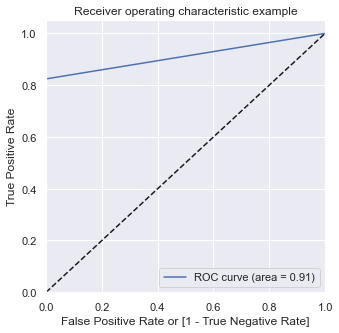





Misclassification Rate: 0.0006085928630783095
Negative Predictive Power: 0.9996951755671493
Accuracy: 0.9993914071369217
Precision: 0.8243243243243243
Recall: 0.8243243243243243
Roc Auc Score: 0.9120097499457368




Final predicted dataset using the optimal cutoff threshold
        Actual   Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0  5.258742e-10          0    1    0    0    0    0    0    0   
165754       0  1.770243e-09          0    1    0    0    0    0    0    0   
235285       0  4.748250e-05          0    1    0    0    0    0    0    0   
101271       0  7.467882e-06          0    1    0    0    0    0    0    0   
5832         0  2.950972e-05          0    1    0    0    0    0    0    0   
253774       0  1.032629e-08          0    1    0    0    0    0    0    0   
113630       0  2.937767e-08          0    1    0    0    0    0    0    0   
230121       0  3.607834e-07          0    1    0    0    0    0    0    0   
282997       0  6.4

In [217]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff_xgboost(xgsmote_tune, cut_off_index = 0.5)

# Creating models Using Adasyn technique for class balancing

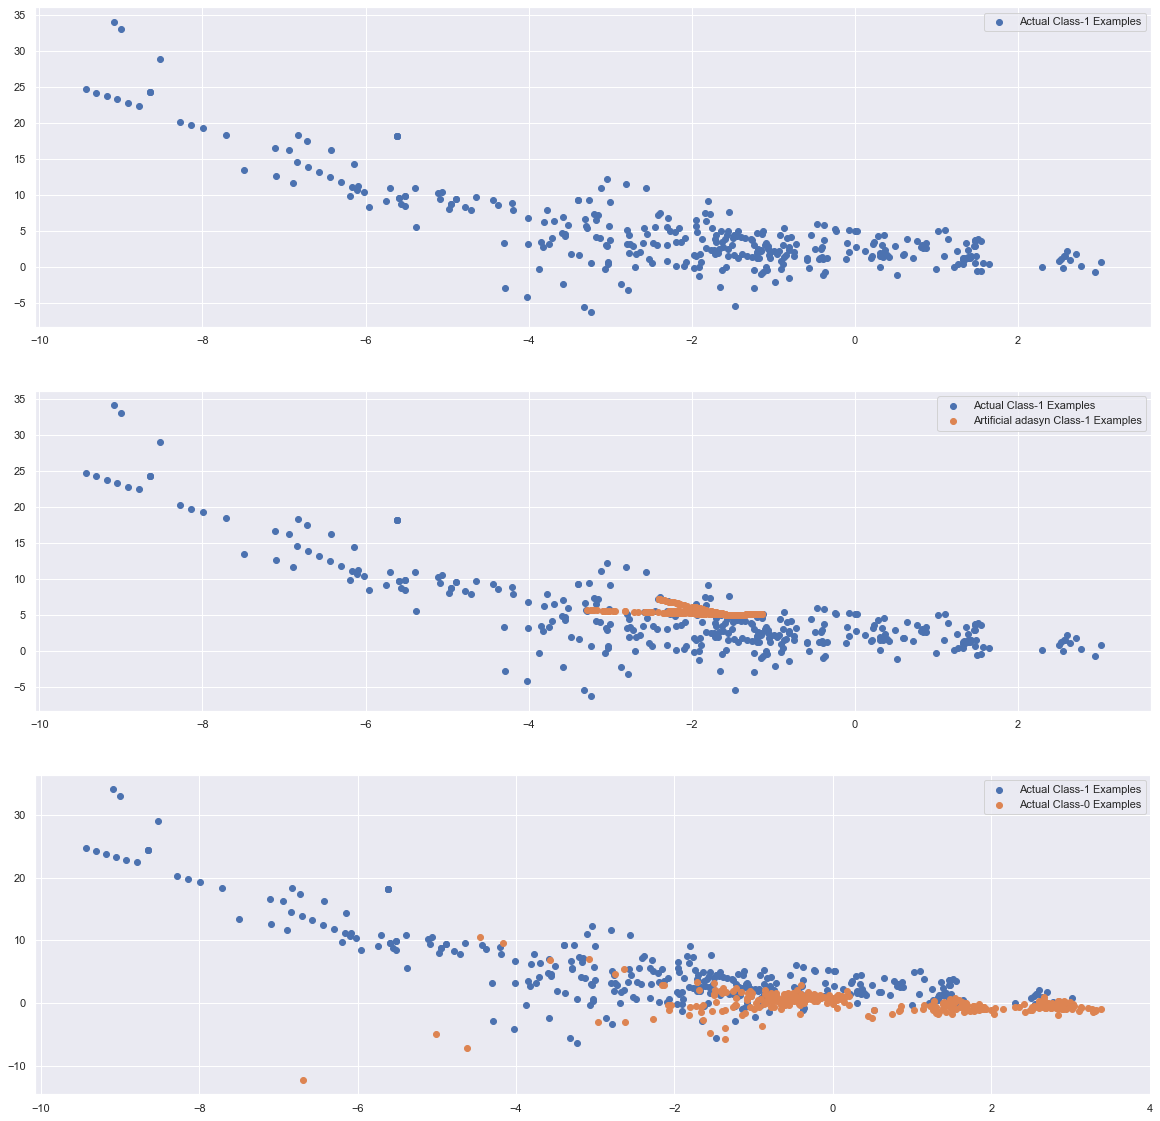

In [218]:
#Plot actual and synthesized data	
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority',random_state=42)
X_adasyn, y_adasyn = ada.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = X_adasyn, y_adasyn
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]

fig = plt.figure()


plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial adasyn Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [219]:
#Print the class distribution using ADASYN
print('After ADASYN, Class 0: {0}'.format(sum(y_adasyn == 0)))
print('After ADASYN, Class 1: {0}'.format(sum(y_adasyn == 1)))

After ADASYN, Class 0: 199020
After ADASYN, Class 1: 199004


# Logistic Regression with ADASYN

In [220]:
#Define and build Logistic regression model on Adasyn data
logreg=LogisticRegression(random_state=42)
pipe = Pipeline([('logreg' , LogisticRegression(random_state=42))])
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'logreg__C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6,1,2], 'logreg__penalty':['l1','l2'],
         'logreg__solver' : ['liblinear']}

lgmodel = GridSearchCV(estimator = pipe , cv = folds, param_grid = params, scoring  = 'recall')

In [221]:
#train on adasyn dataset
lgmodel.fit(X_adasyn, y_adasyn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 1, 2],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear']},
             scoring='recall')

In [222]:
#best parameters
lgmodel.best_params_

{'logreg__C': 2, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

In [223]:
#best score
lgmodel.best_score_

0.8867711114048673

In [224]:
#predict on test dataset
y_pred = lgmodel.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9191741862996383
Recall/Sensitivity: 0.9054054054054054
Precision: 0.019072018218047253
Roc_Auc_score: 0.9123017413333374


In [225]:
#Logistic regression with best hyperparamter on Adasyn data
logreg = LogisticRegression(random_state=42, C=2 , penalty='l2', solver = 'liblinear')
logreg.fit(X_adasyn, y_adasyn)

LogisticRegression(C=2, random_state=42, solver='liblinear')

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.001589          0
165754       0     0.255027          0
235285       0     0.172475          0
101271       0     0.089020          0
5832         0     0.159784          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.001589          0    1    0    0    0    0    0    0   
165754       0     0.255027          0    1    1    1    0    0    0    0   
235285       0     0.172475          0    1    1    0    0    0    0    0   
101271       0     0.089020          0    1    0    0    0    0    0    0   
5832         0     0.159784          0    1    1    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

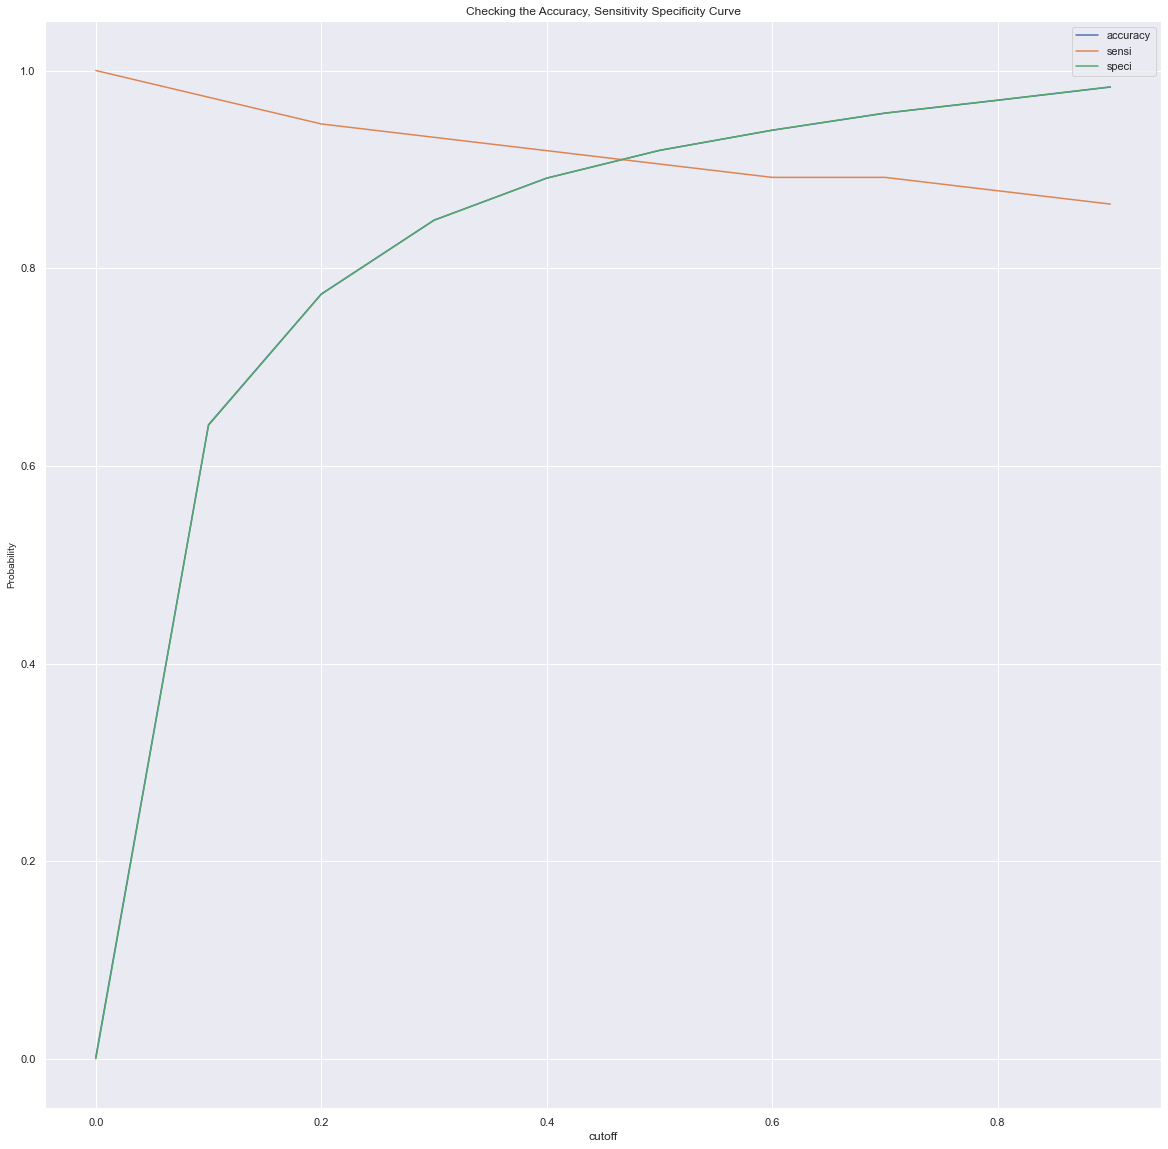

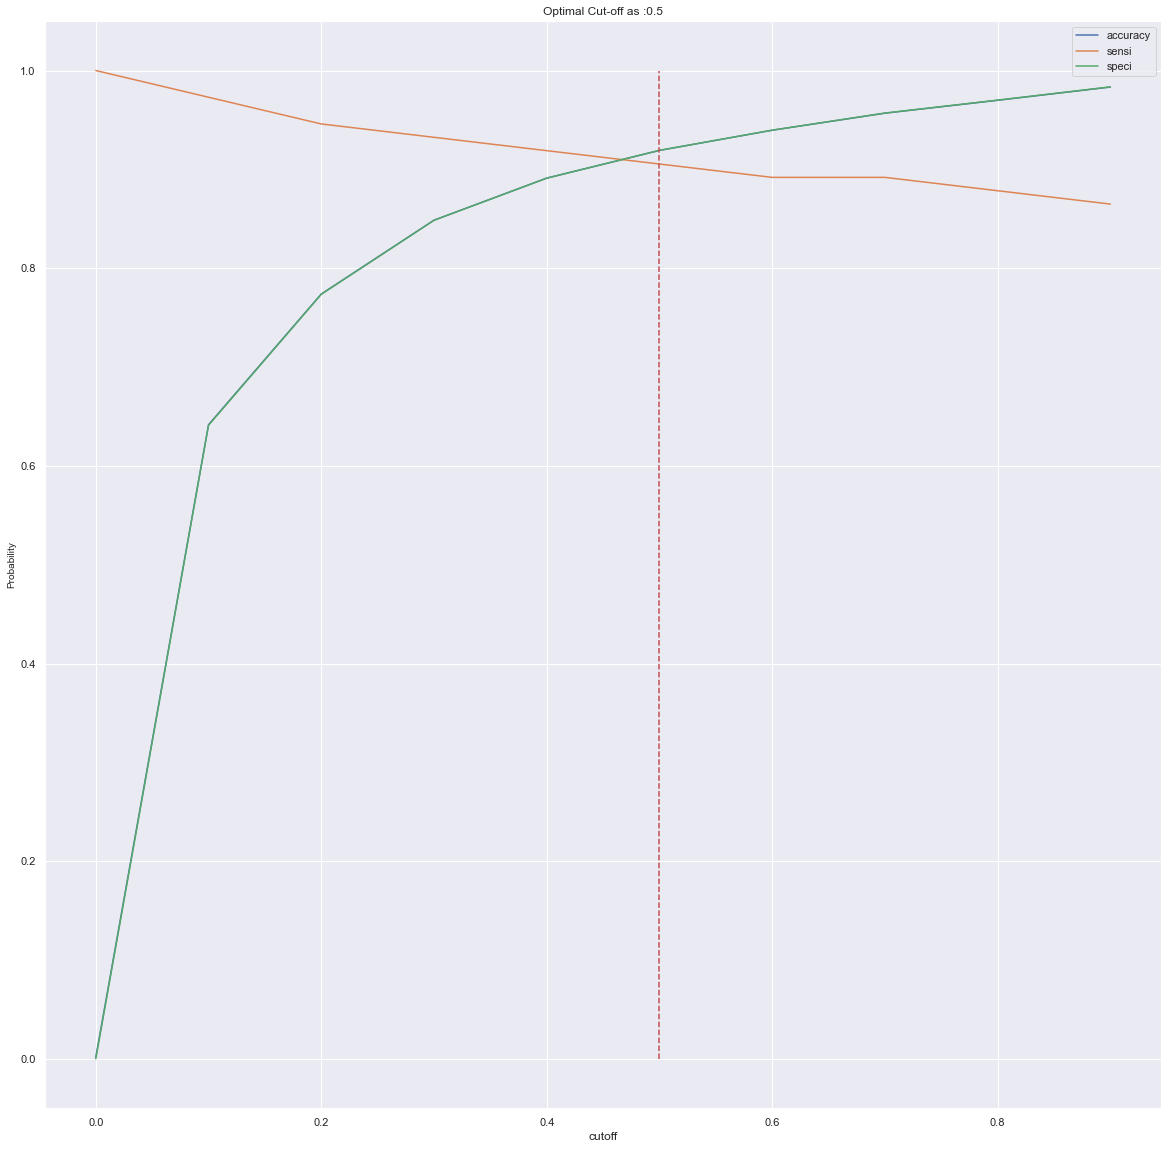

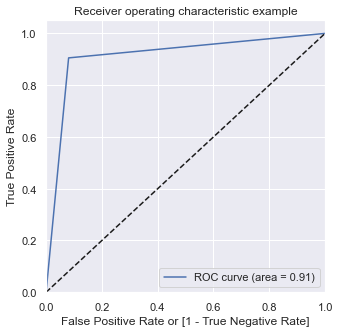





Misclassification Rate: 0.08082581370036164
Negative Predictive Power: 0.9191980772612697
Accuracy: 0.9191741862996383
Precision: 0.019072018218047253
Recall: 0.9054054054054054
Roc Auc Score: 0.9123017413333374




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.001589          0    1    0    0    0    0    0    0   
165754       0     0.255027          0    1    1    1    0    0    0    0   
235285       0     0.172475          0    1    1    0    0    0    0    0   
101271       0     0.089020          0    1    0    0    0    0    0    0   
5832         0     0.159784          0    1    1    0    0    0    0    0   
253774       0     0.002322          0    1    0    0    0    0    0    0   
113630       0     0.260799          0    1    1    1    0    0    0    0   
230121       0     0.043938          0    1    0    0    0    0    0    0   
282997       0     0.012204 

In [226]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(logreg, cut_off_index = 0.5)

# Random Forest with ADASYN

In [227]:
#Define and build random forest model
# Tune Hyperpaprameter using gridsearch cv
#apply cross validation
#train on adasyn dataset

rf_ada = RandomForestClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'criterion' : ['gini', 'entropy'],  'max_depth' : [2,4],
          'min_samples_split' : [10,12], 'max_features' : [10,12]
          }
from sklearn.model_selection import GridSearchCV
rf_adasyn = GridSearchCV(estimator = rf_ada , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)

In [228]:
#train on adasyn dataset
rf_adasyn.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': [10, 12],
                         'min_samples_split': [10, 12]},
             scoring='recall', verbose=1)

In [229]:
#best score
rf_adasyn.best_score_

0.9067305078948674

In [230]:
#best parameters
rf_adasyn.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 12,
 'min_samples_split': 10}

In [231]:
#predict on test dataset
y_pred = rf_adasyn.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9411420479149842
Recall/Sensitivity: 0.8851351351351351
Precision: 0.025471514680147772
Roc_Auc_score: 0.9131871818474199


In [232]:
# Apply random forest model using the best hyper parameter found using gridsearchcv
rf_adasyn_tune = RandomForestClassifier( criterion = 'gini', max_depth= 4,
                                  min_samples_leaf=10, min_samples_split=10,max_features=12)
rf_adasyn_tune.fit(X_adasyn, y_adasyn)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_leaf=10,
                       min_samples_split=10)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0     0.085073          0
165754       0     0.167256          0
235285       0     0.343952          0
101271       0     0.183352          0
5832         0     0.402471          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.085073          0    1    0    0    0    0    0    0   
165754       0     0.167256          0    1    1    0    0    0    0    0   
235285       0     0.343952          0    1    1    1    1    0    0    0   
101271       0     0.183352          0    1    1    0    0    0    0    0   
5832         0     0.402471          0    1    1    1    1    1    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

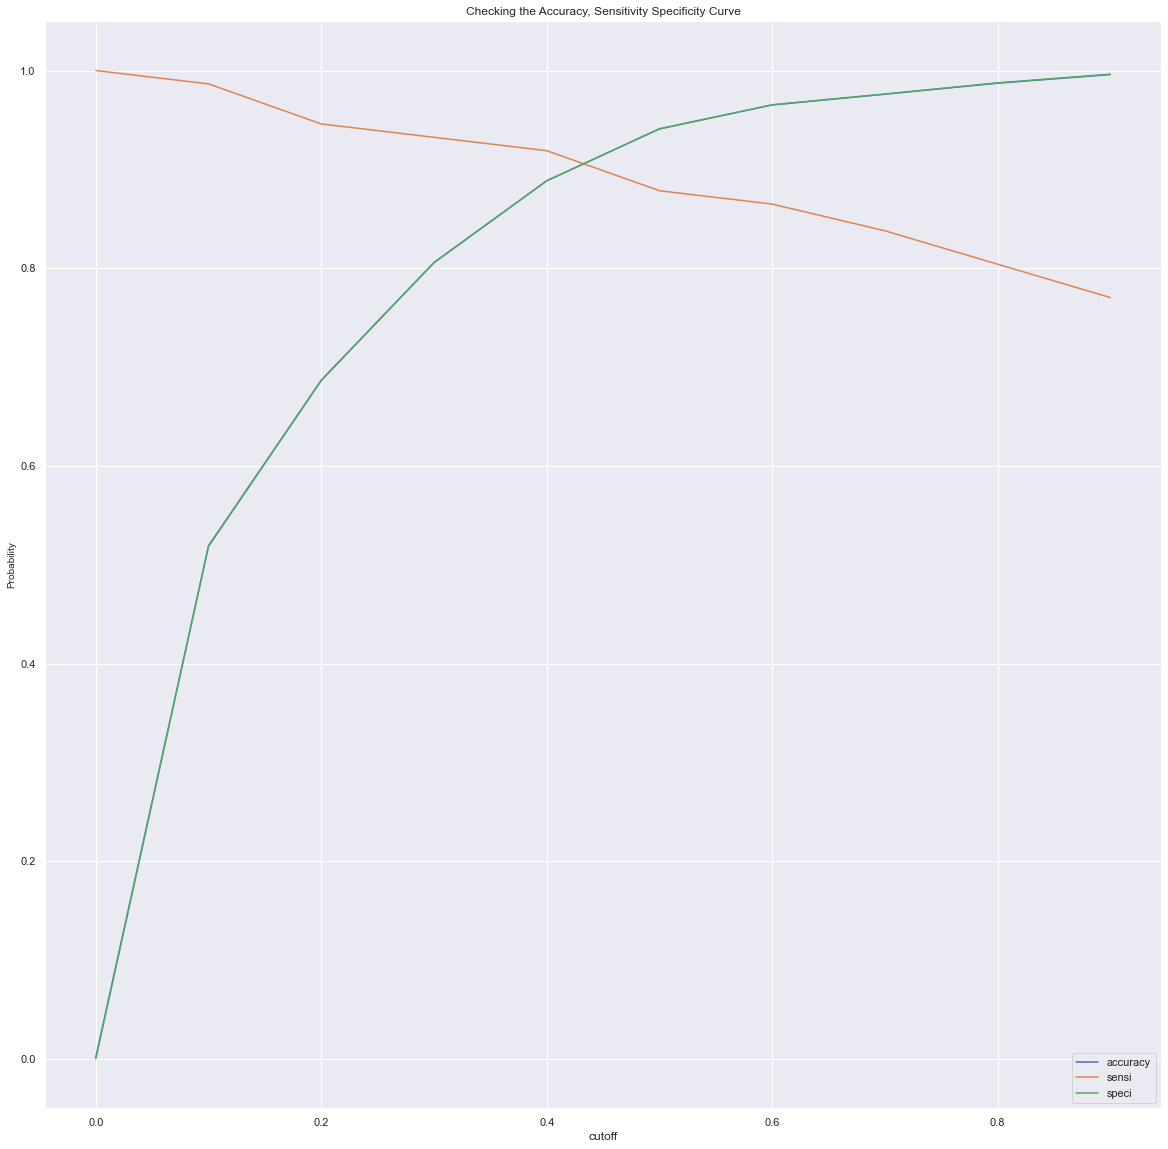

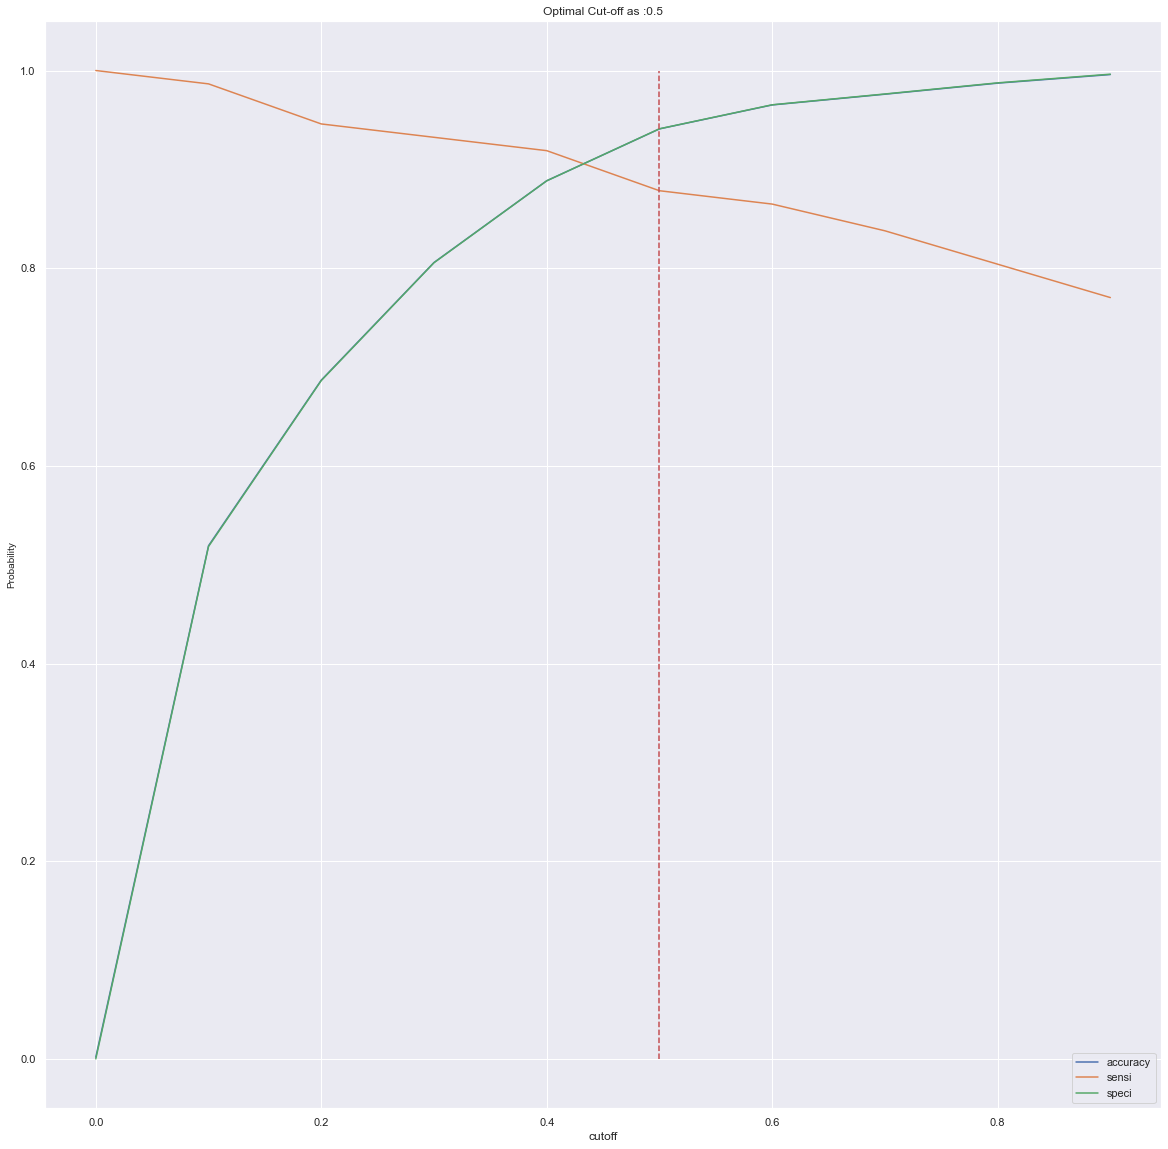

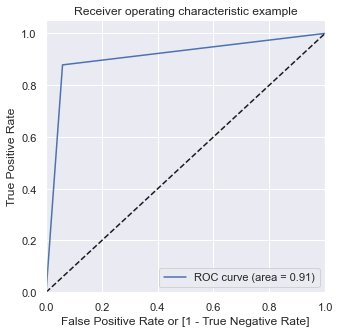





Misclassification Rate: 0.05906861884531208
Negative Predictive Power: 0.9410399202766868
Accuracy: 0.9409313811546879
Precision: 0.025198681915099826
Recall: 0.8783783783783784
Roc Auc Score: 0.9097091493275327




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0     0.085073          0    1    0    0    0    0    0    0   
165754       0     0.167256          0    1    1    0    0    0    0    0   
235285       0     0.343952          0    1    1    1    1    0    0    0   
101271       0     0.183352          0    1    1    0    0    0    0    0   
5832         0     0.402471          0    1    1    1    1    1    0    0   
253774       0     0.036793          0    1    0    0    0    0    0    0   
113630       0     0.394047          0    1    1    1    1    0    0    0   
230121       0     0.076806          0    1    0    0    0    0    0    0   
282997       0     0.145472 

In [233]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(rf_adasyn_tune, cut_off_index = 0.5)

# KNN with ADASYN

In [234]:
#Define and build KNN Classifer
#Find Hyperpaprameter using gridsearch cv
#apply cross validation
#train on adasyn dataset 
from sklearn.neighbors import KNeighborsClassifier
model_knn_ada = KNeighborsClassifier(n_jobs=-1)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
params = {'n_neighbors' : [3,5,7]}
from sklearn.model_selection import GridSearchCV
model_knn_adasyn = GridSearchCV(estimator = model_knn_ada , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
model_knn_adasyn.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='recall',
             verbose=1)

In [235]:
# best parameters
model_knn_adasyn.best_params_

{'n_neighbors': 3}

In [236]:
#predict on test dataset
y_pred = model_knn_adasyn.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9986774808936952
Recall/Sensitivity: 0.8108108108108109
Precision: 0.5853658536585366
Roc_Auc_score: 0.9049071346978611


In [237]:
#Apply the best parameter and recheck the model ROC 
model_knn_tune_adasyn = KNeighborsClassifier(n_jobs=-1,n_neighbors= 3)
model_knn_tune_adasyn.fit(X_adasyn, y_adasyn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

Using the default Threshold Cutoff as 0.5
        Actual  Probability  Predicted
186882       0          0.0          0
165754       0          0.0          0
235285       0          0.0          0
101271       0          0.0          0
5832         0          0.0          0




Probability at Different Thereshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for different Threshol

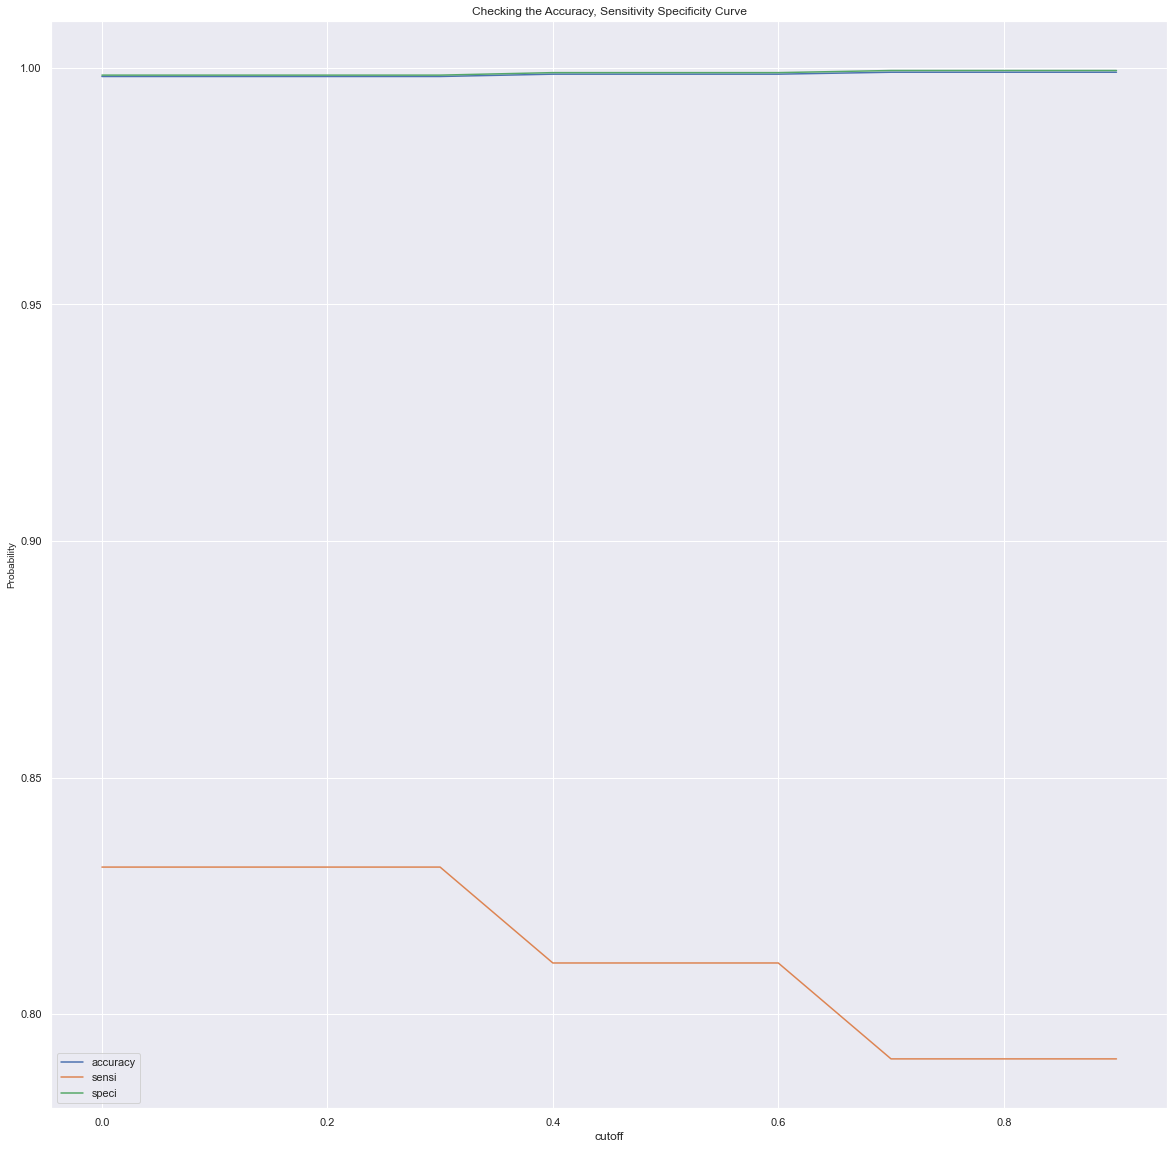

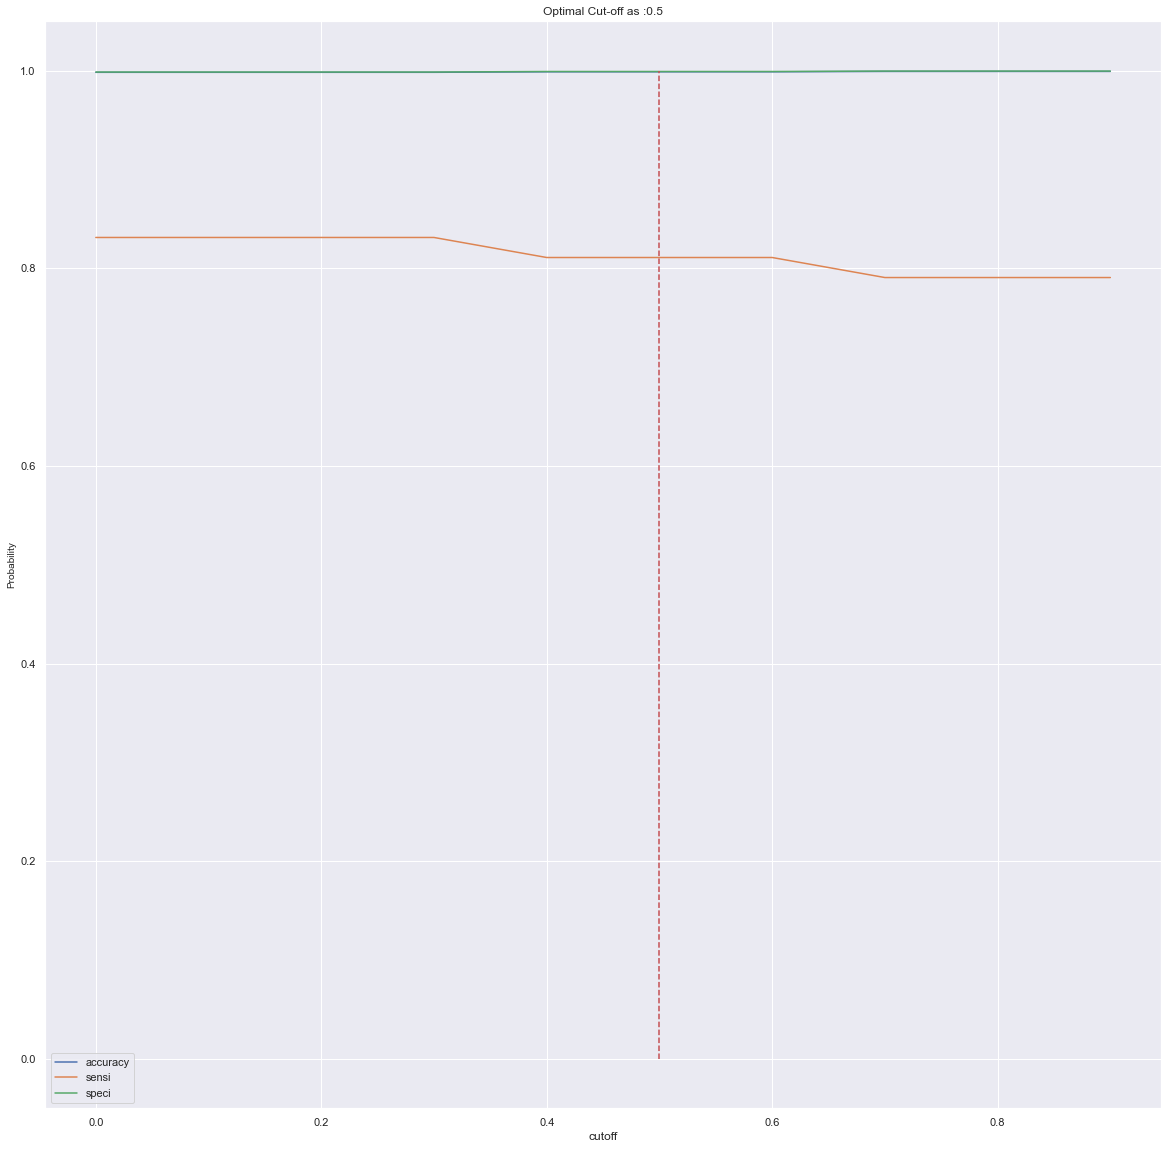

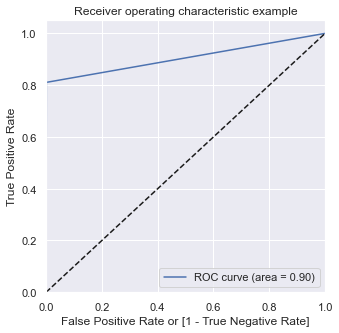





Misclassification Rate: 0.001322519106304788
Negative Predictive Power: 0.9990034585849112
Accuracy: 0.9986774808936952
Precision: 0.5853658536585366
Recall: 0.8108108108108109
Roc Auc Score: 0.9049071346978611




Final predicted dataset using the optimal cutoff threshold
        Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0          0.0          0    0    0    0    0    0    0    0   
165754       0          0.0          0    0    0    0    0    0    0    0   
235285       0          0.0          0    0    0    0    0    0    0    0   
101271       0          0.0          0    0    0    0    0    0    0    0   
5832         0          0.0          0    0    0    0    0    0    0    0   
253774       0          0.0          0    0    0    0    0    0    0    0   
113630       0          0.0          0    0    0    0    0    0    0    0   
230121       0          0.0          0    0    0    0    0    0    0    0   
282997       0          0.0  

In [238]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff(model_knn_tune_adasyn, cut_off_index = 0.5)

# Xgboost with Adasyn

In [239]:
#define xgboost model 
# Find Hyperpaprameter using gridsearch cv
#apply cross validation
#train on adasyn dataset

xgboost_adasyn = XGBClassifier(random_state=42)
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

params = {"n_estimators": [50, 250, 450, 650]}
from sklearn.model_selection import GridSearchCV
xgboost_ada = GridSearchCV(estimator = xgboost_adasyn , cv = folds, param_grid = params, scoring  = 'recall',n_jobs=-1, verbose=1)
xgboost_ada.fit(X_adasyn, y_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[21:46:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1, param_grid={'n_estimators': [50, 250, 450, 650]},
             scoring='recall', verbose=1)

In [240]:
#best parameters
xgboost_ada.best_params_

{'n_estimators': 250}

In [241]:
#predict on test dataset
y_pred = xgboost_ada.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))
print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
print("Roc_Auc_score: {0}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.9993445923013002
Recall/Sensitivity: 0.8040540540540541
Precision: 0.815068493150685
Roc_Auc_score: 0.9018687528022776


In [242]:
#tune xgboost with best params 
xgbadasyn_tune = XGBClassifier(randon_state=42, max_depth=5, n_estimators=250)
xgbadasyn_tune.fit(X_adasyn, y_adasyn)

[21:51:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "randon_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:51:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Using the default Threshold Cutoff as 0.5
        Actual   Probability  Predicted
186882       0  1.224964e-11          0
165754       0  1.138538e-09          0
235285       0  1.199760e-07          0
101271       0  1.925259e-06          0
5832         0  1.456609e-05          0




Probability at Different Thereshold
        Actual   Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0  1.224964e-11          0    1    0    0    0    0    0    0   
165754       0  1.138538e-09          0    1    0    0    0    0    0    0   
235285       0  1.199760e-07          0    1    0    0    0    0    0    0   
101271       0  1.925259e-06          0    1    0    0    0    0    0    0   
5832         0  1.456609e-05          0    1    0    0    0    0    0    0   

        0.7  0.8  0.9  
186882    0    0    0  
165754    0    0    0  
235285    0    0    0  
101271    0    0    0  
5832      0    0    0  




Checking the Accuracy, Sensitivity and Specificity for differ

<Figure size 720x576 with 0 Axes>

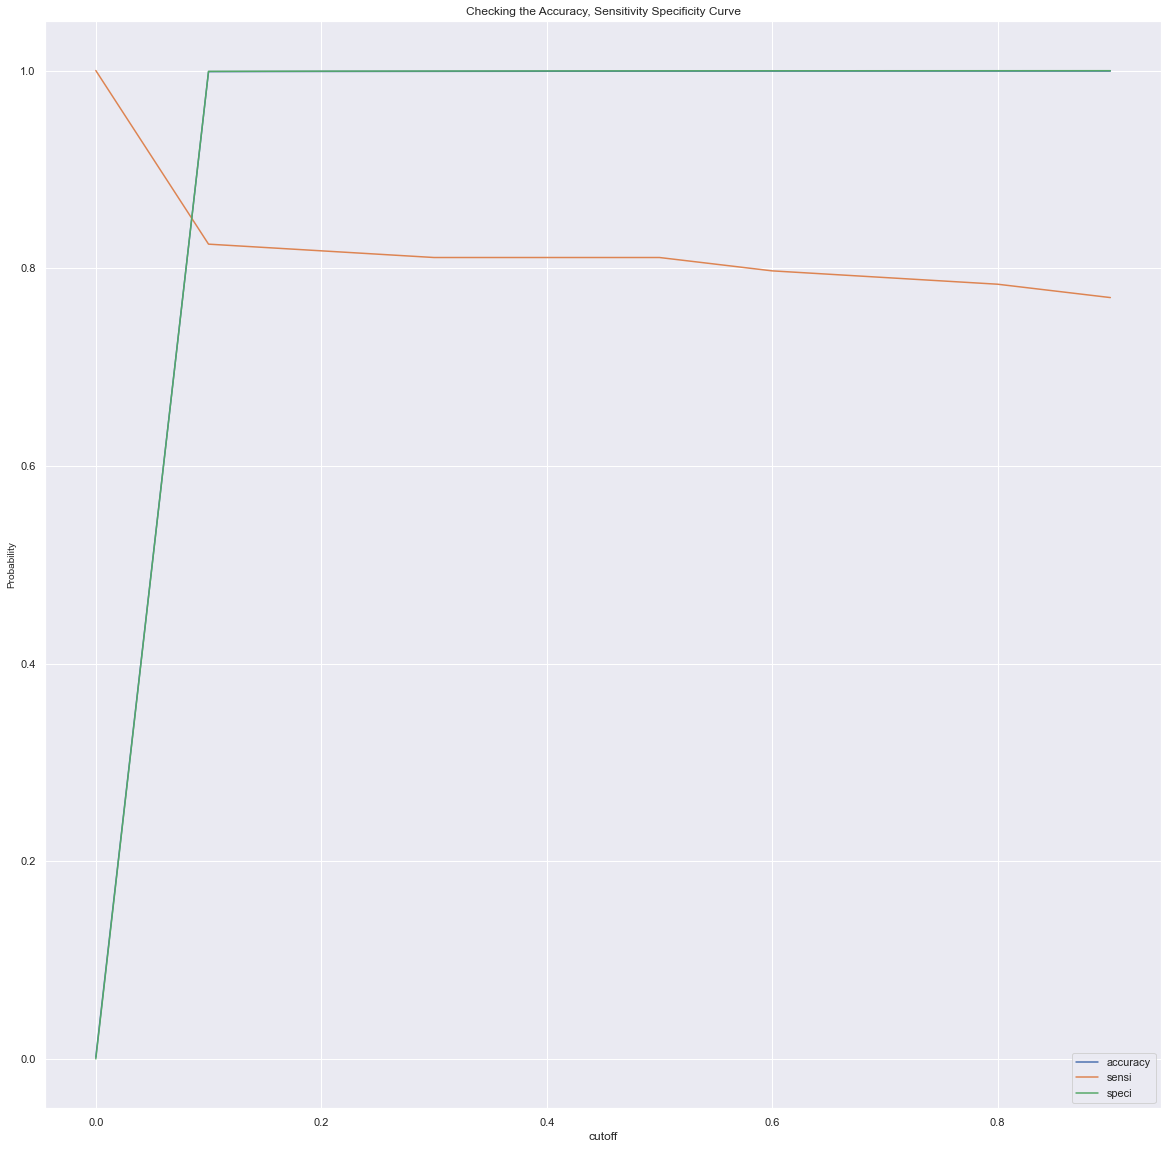

<Figure size 720x576 with 0 Axes>

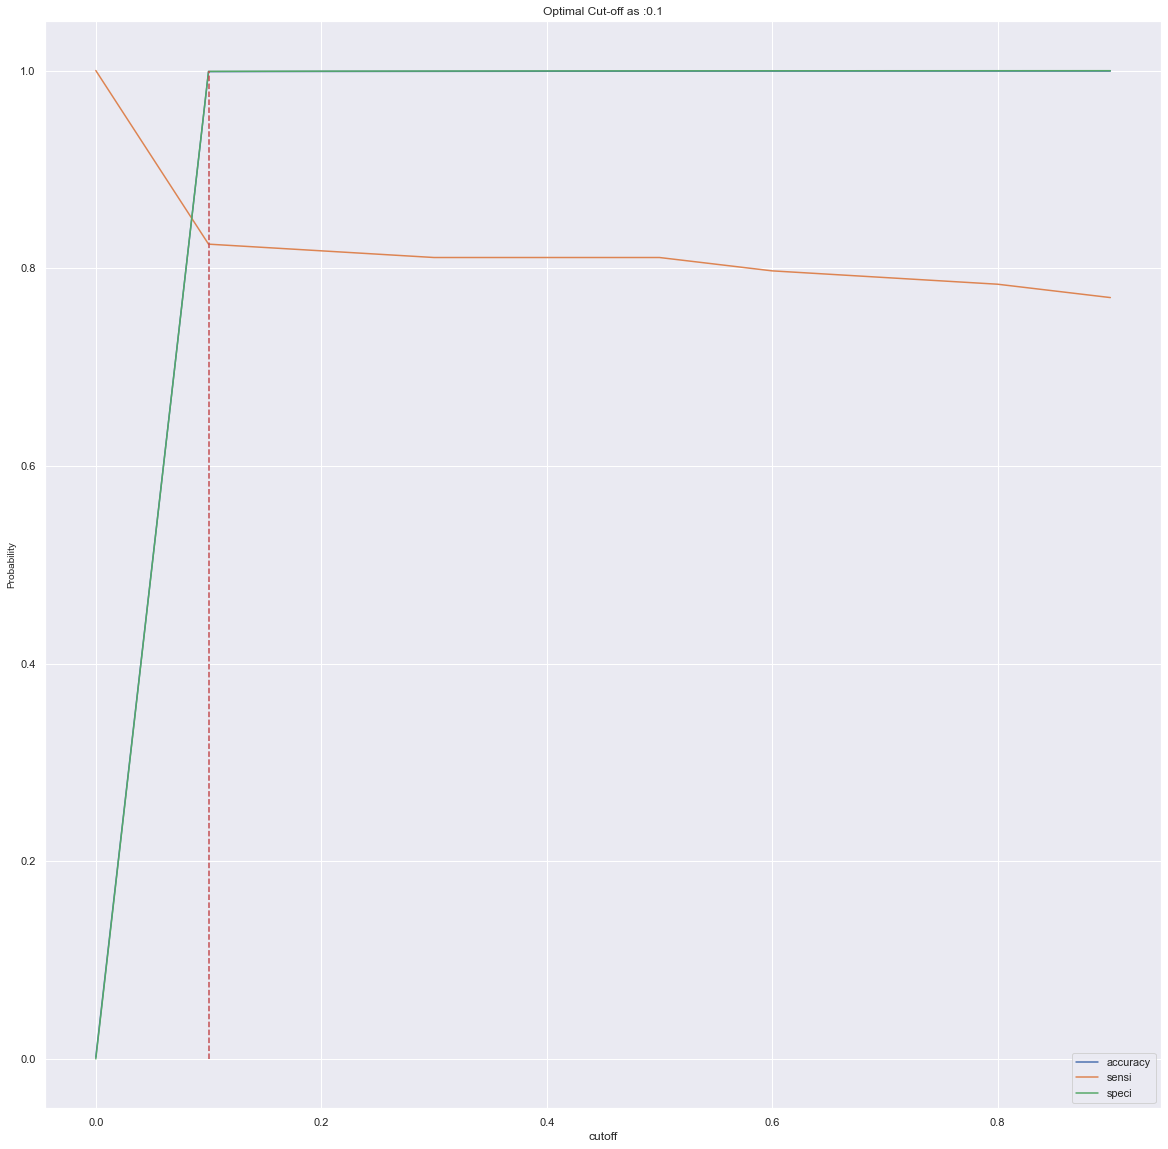

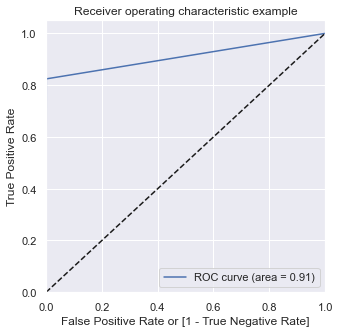





Misclassification Rate: 0.0011469634727245064
Negative Predictive Power: 0.9991558708013365
Accuracy: 0.9988530365272755
Precision: 0.6288659793814433
Recall: 0.8243243243243243
Roc Auc Score: 0.9117400975628305




Final predicted dataset using the optimal cutoff threshold
        Actual   Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
186882       0  1.224964e-11          0    1    0    0    0    0    0    0   
165754       0  1.138538e-09          0    1    0    0    0    0    0    0   
235285       0  1.199760e-07          0    1    0    0    0    0    0    0   
101271       0  1.925259e-06          0    1    0    0    0    0    0    0   
5832         0  1.456609e-05          0    1    0    0    0    0    0    0   
253774       0  4.380816e-09          0    1    0    0    0    0    0    0   
113630       0  8.286732e-09          0    1    0    0    0    0    0    0   
230121       0  1.527157e-07          0    1    0    0    0    0    0    0   
282997       0  7.3

In [243]:
#Plot Confusion matrix and ROC curve to get the optimal threshold value for prediction
optimal_cutoff_xgboost(xgbadasyn_tune, cut_off_index = 0.1)

# Best Model is  XGBOOST WITH SMOTE MODEL

### Xgboost with smote model Metrics

Misclassification Rate: 0.0006085928630783095

Negative Predictive Power: 0.9996951755671493

Accuracy: 0.9993914071369217

Precision: 0.8243243243243243

Recall: 0.8243243243243243

Roc Auc Score: 0.9120097499457368


# Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


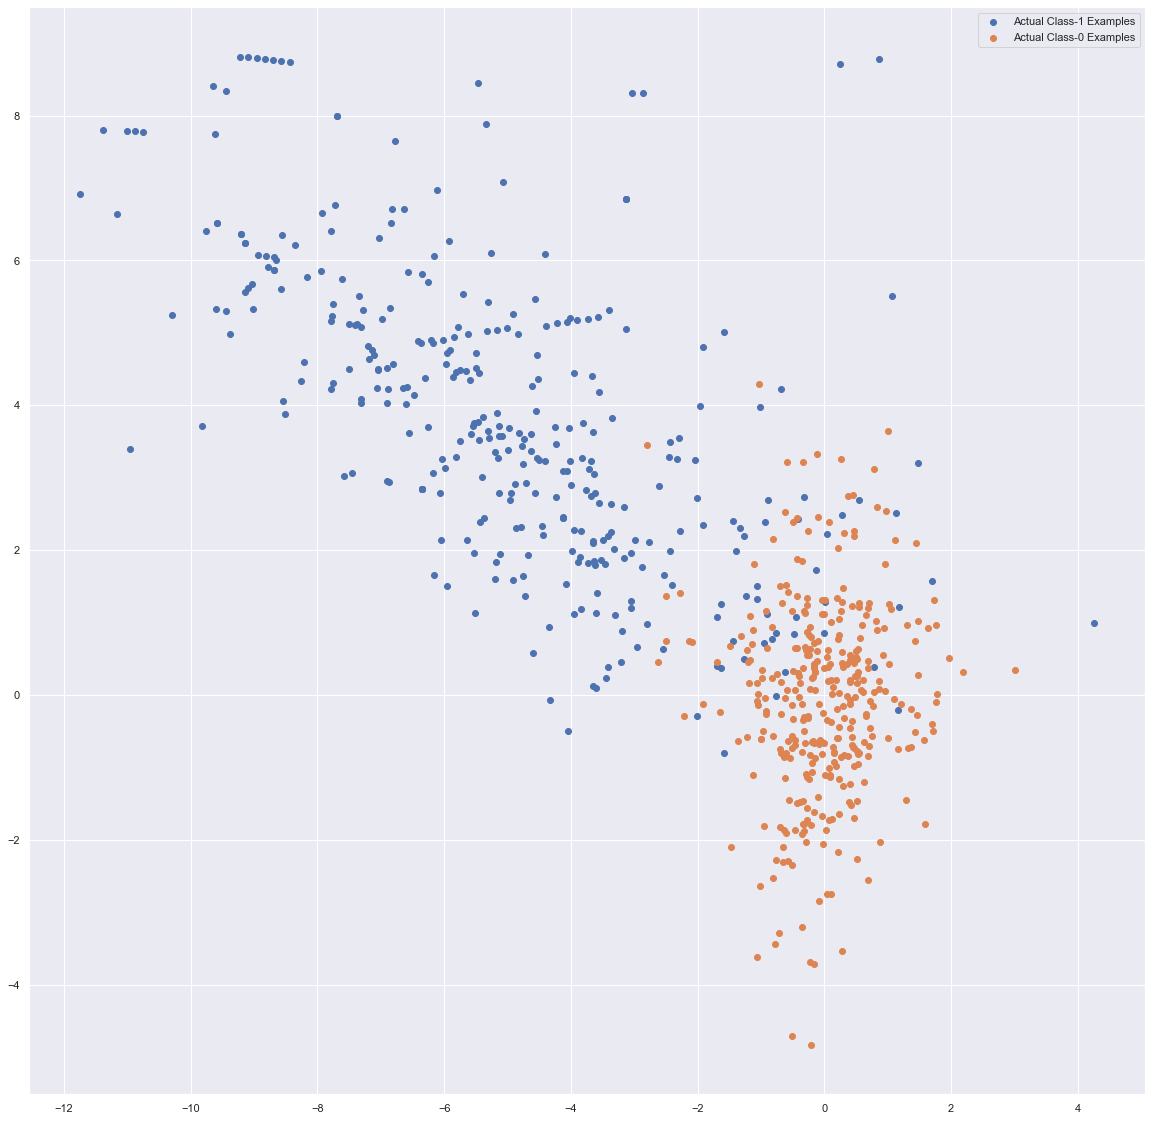

In [245]:
#Xgboost with smote model is the best model
#print important features of this model
var_imp = []
for i in xgsmote_tune.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgsmote_tune.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgsmote_tune.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgsmote_tune.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgsmote_tune.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgsmote_tune.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()